# Customer and Marketing Analytics

Raisa Nurlatifah

**Outline**

1. Business Understanding
2. Business Process
3. Create Model
4. Metrics for Simulation
5. Simulation
6. Evaluate the Simulation - Metrics
7. Evaluate the Simulation - Variable

---

##  **<font color='blue'>Preliminary</font>**

### **Data Description**

This machine learning project concerns an Edutech company that provides e-learning streaming and physical products. There are two problems to solve: 
1. Customer churn
2. Finding potential leads
   
Each problem has its own datasets that will be used in the project. 

#### **Customer Churn Dataset**

- `customer_id` : Unique identifier for each customer.
- `name`: Name of the customer.
- `age`: Age of the customer.
- `gender`: Gender of the customer.
- `security_no`: Confidential identification number.
- `region_category`: Classification of the customer’s region.
- `membership_category`: Type of membership the customer holds.
- `joining date`: Date when the customer joined the service.
- `joined_through_referral`: Indicates whether the customer joined through a referral.
- `referral_id`: Identifier of the referring customer.
- `preferred_offer_types`: Types of offers preferred by the customer
- `medium_of_operation`: Gadget used by the customer to interact with the service.
- `internet_option`: Preferred internet connection type for accessing the service.
- `last_visit_time`: Timestamp of the customer's last recorded visit.
- `days_since_last_login`: Number of days since the customer last logged into their account.
- `avg_time_spent`: Average time (in minutes) spent by the customer per session.
- `avg_transaction_value`: Average value of transactions made by the customer.
- `avg_frequency_login_days`: Average number of days between customer logins.
- `points_in_wallet`: Loyalty or reward points available in the customer's wallet.
- `used_special_discount`: Indicates if the customer has used special discounts
- `user_application_preference`: Indicates if the user prefers using the application as the service's platform.
- `past_complaint`: Indicates if the customer has ever submitted a complaint.
- `complaint_status`: Status of the complaint.
- `feedback`: Customers' feedback on service quality.
- `churn_risk_score`: Score indicating the likelihood of the customer churning.

#### **Edutech Leads Dataset**

- `Prospect ID`: A unique ID with which the customer is identified.
- `Lead Number`: A lead number assigned to each lead procured.
- `Lead Origin`: The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
- `Lead Source`: The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
- `Do Not Email`: An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
- `Do Not Call`: An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
- `Converted`: The target variable. Indicates whether a lead has been successfully converted or not.
- `Total Visits`: The total number of visits made by the customer on the website.
- `Total Time Spent on Website`: The total time spent by the customer on the website.
- `Page Views Per Visit`: Average number of pages on the website viewed during the visits.
- `Last Activity`: Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
- `Country`: The country of the customer.
- `Specialization`: The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.
- `How did you hear about X Education`: The source from which the customer heard about X Education.
- `What is your current occupation`: Indicates whether the customer is a student, umemployed or employed.
- `What matters most to you in choosing this course`: An option selected by the customer indicating what is their main motto behind doing this course.
- `Search`: Indicating whether the customer had searched X Education or seen the ad while searching in the browser.
- `Magazine`: Indicating whether the customer had seen the ad in magazine.
- `Newspaper Article`: Indicating whether the customer had seen the ad in newspaper article.
- `X Education Forums`: Indicating whether the customer had known from the X education forum.
- `Newspaper`: Indicating whether the customer had seen the ad in newspaper.
- `Digital Advertisement`: Indicating whether the customer had seen the ad in any digital advertisement.
- `Through Recommendations`: Indicates whether the customer came in through recommendations.
- `Receive More Updates About Our Courses`: Indicates whether the customer chose to receive more updates about the courses.
- `Tags`: Tags assigned to customers indicating the current status of the lead.
- `Lead Quality`: Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
- `Update me on Supply Chain Content`: Indicates whether the customer wants updates on the Supply Chain Content.
- `Get updates on DM Content`: Indicates whether the customer wants updates on the DM Content.
- `Lead Profile`: A lead level assigned to each customer based on their profile.
- `City`: The city of the customer.
- `Asymmetrique Activity Index`: An index assigned to each customer based on their activity.
- `Asymmetrique Profile Index`: An index assigned to each customer based on their profile.
- `Asymmetrique Activity Score`: A score assigned to each customer based on their activity.
- `Asymmetrique Profile Score`: A score assigned to each customer based on their profile.
- `I agree to pay the amount through cheque`: Indicates whether the customer has agreed to pay the amount through cheque or not.
- `a free copy of Mastering The Interview`: Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.
- `Last Notable Activity`: The last notable acitivity performed by the student.

### **Import Data**

Load essential libraries

In [12]:
# Load data manipulation package
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
pd.set_option('display.max_columns', None)

Import all data

In [15]:
# Create a read dataset function 
def read_data(path):
    """
    Reads a CSV file, removes duplicates, and returns a DataFrame.

    Parameters
    ----------
    path : str
        Path to the CSV file.

    Returns
    -------
    pandas.DataFrame
        DataFrame without duplicates.
    """
    
    # 1. Read data
    data = pd.read_csv(path,
                       index_col = 0,
                       low_memory = False) # Disable automatic type inference for memory efficiency

    # 2. Drop duplicates
    data = data.drop_duplicates()

    return data


Assesing data quality

In [17]:
# Read data
churn_train = read_data(path = 'train.csv')
print('Churn train data shape :',churn_train.shape)

churn_test = read_data(path = 'test.csv')
print('Churn test data shape  :',churn_test.shape)

leads_edu = read_data(path = 'Leads X Education.csv')
print('Leads data shape       :',leads_edu.shape)

Churn train data shape : (36992, 24)
Churn test data shape  : (19919, 23)
Leads data shape       : (9240, 36)


In [18]:
# check data duplicate

print('Churn train data duplicates :',churn_train.duplicated().sum())
print('Churn test data duplicates  :',churn_test.duplicated().sum())
print('Leads data duplicates       :',leads_edu.duplicated().sum())

Churn train data duplicates : 0
Churn test data duplicates  : 0
Leads data duplicates       : 0


In [19]:
# display data
churn_train.head()

Name  age gender  \
customer_id                                                          
fffe4300490044003600300030003800       Pattie Morrisey   18      F   
fffe43004900440032003100300035003700       Traci Peery   32      F   
fffe4300490044003100390032003600       Merideth Mcmeen   44      F   
fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
fffe43004900440031003900350030003600      Meghan Kosak   31      F   

                                     security_no region_category  \
customer_id                                                        
fffe4300490044003600300030003800         XW0DQ7H         Village   
fffe43004900440032003100300035003700     5K0N3X1            City   
fffe4300490044003100390032003600         1F2TCL3            Town   
fffe43004900440036003000330031003600     VJGJ33N            City   
fffe43004900440031003900350030003600     SVZXCWB            City   

                                      membership_category joining_date  \
customer_id                                                              
fffe4300490044003600300030003800      Platinum Membership   2017-08-17   
fffe43004900440032003100300035003700   Premium Membership   2017-08-28   
fffe4300490044003100390032003600            No Membership   2016-11-11   
fffe43004900440036003000330031003600        No Membership   2016-10-29   
fffe43004900440031003900350030003600        No Membership   2017-09-12   

                                     joined_through_referral referral_id  \
customer_id                                                                
fffe4300490044003600300030003800                          No    xxxxxxxx   
fffe43004900440032003100300035003700                       ?    CID21329   
fffe4300490044003100390032003600                         Yes    CID12313   
fffe43004900440036003000330031003600                     Yes     CID3793   
fffe43004900440031003900350030003600                      No    xxxxxxxx   

                                         preferred_offer_types  \
customer_id                                                      
fffe4300490044003600300030003800         Gift Vouchers/Coupons   
fffe43004900440032003100300035003700     Gift Vouchers/Coupons   
fffe4300490044003100390032003600         Gift Vouchers/Coupons   
fffe43004900440036003000330031003600     Gift Vouchers/Coupons   
fffe43004900440031003900350030003600  Credit/Debit Card Offers   

                                     medium_of_operation internet_option  \
customer_id                                                                
fffe4300490044003600300030003800                       ?           Wi-Fi   
fffe43004900440032003100300035003700             Desktop     Mobile_Data   
fffe4300490044003100390032003600                 Desktop           Wi-Fi   
fffe43004900440036003000330031003600             Desktop     Mobile_Data   
fffe43004900440031003900350030003600          Smartphone     Mobile_Data   

                                     last_visit_time  days_since_last_login  \
customer_id                                                                   
fffe4300490044003600300030003800            16:08:02                     17   
fffe43004900440032003100300035003700        12:38:13                     16   
fffe4300490044003100390032003600            22:53:21                     14   
fffe43004900440036003000330031003600        15:57:50                     11   
fffe43004900440031003900350030003600        15:46:44                     20   

                                      avg_time_spent  avg_transaction_value  \
customer_id                                                                   
fffe4300490044003600300030003800              300.63               53005.25   
fffe43004900440032003100300035003700          306.34               12838.38   
fffe4300490044003100390032003600              516.16               21027.00   
fffe43004900440036003000330031003600           53.27               25239.56   
fffe43

In [20]:
# check data type
churn_train.dtypes

Name                             object
age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
dtype: object

In [21]:
# display data
churn_test.head()

Name  age gender  \
customer_id                                                          
fffe43004900440031003700300030003400    Alethia Meints   50      F   
fffe43004900440031003900370037003300        Ming Lopez   41      M   
fffe43004900440034003800360037003000  Carina Flannigan   31      F   
fffe43004900440036003200370033003400      Kyung Wanner   64      M   
fffe43004900440035003000370031003900       Enola Gatto   16      F   

                                     security_no region_category  \
customer_id                                                        
fffe43004900440031003700300030003400     OQJ1XAY         Village   
fffe43004900440031003900370037003300     OUQRPKO         Village   
fffe43004900440034003800360037003000     02J2RE7            Town   
fffe43004900440036003200370033003400     5YEQIF1            Town   
fffe43004900440035003000370031003900     100RYB5            Town   

                                     membership_category joining_date  \
customer_id                                                             
fffe43004900440031003700300030003400  Premium Membership   2015-11-02   
fffe43004900440031003900370037003300     Gold Membership   2016-03-01   
fffe43004900440034003800360037003000   Silver Membership   2017-03-03   
fffe43004900440036003200370033003400   Silver Membership   2017-08-18   
fffe43004900440035003000370031003900       No Membership   2015-05-05   

                                     joined_through_referral referral_id  \
customer_id                                                                
fffe43004900440031003700300030003400                      No    xxxxxxxx   
fffe43004900440031003900370037003300                      No    xxxxxxxx   
fffe43004900440034003800360037003000                      No    xxxxxxxx   
fffe43004900440036003200370033003400                     Yes     CID8941   
fffe43004900440035003000370031003900                     Yes     CID5690   

                                         preferred_offer_types  \
customer_id                                                      
fffe43004900440031003700300030003400            Without Offers   
fffe43004900440031003900370037003300            Without Offers   
fffe43004900440034003800360037003000     Gift Vouchers/Coupons   
fffe43004900440036003200370033003400  Credit/Debit Card Offers   
fffe43004900440035003000370031003900            Without Offers   

                                     medium_of_operation internet_option  \
customer_id                                                                
fffe43004900440031003700300030003400          Smartphone           Wi-Fi   
fffe43004900440031003900370037003300             Desktop     Fiber_Optic   
fffe43004900440034003800360037003000                Both     Mobile_Data   
fffe43004900440036003200370033003400                   ?     Fiber_Optic   
fffe43004900440035003000370031003900          Smartphone     Mobile_Data   

                                     last_visit_time  days_since_last_login  \
customer_id                                                                   
fffe43004900440031003700300030003400        07:19:30                     12   
fffe43004900440031003900370037003300        22:21:16                     11   
fffe43004900440034003800360037003000        16:40:39                     18   
fffe43004900440036003200370033003400        14:56:17                   -999   
fffe43004900440035003000370031003900        02:57:53                      6   

                                      avg_time_spent  avg_transaction_value  \
customer_id                                                                   
fffe43004900440031003700300030003400          386.26               40721.44   
fffe43004900440031003900370037003300           37.80                9644.40   
fffe43004900440034003800360037003000          215.36                3693.25   
fffe43004900440036003200370033003400           44.57               36809.56   
fffe430049004

In [22]:
# check data type
churn_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19919 entries, fffe43004900440031003700300030003400 to fffe43004900440036003200340030003100
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          19919 non-null  object 
 1   age                           19919 non-null  int64  
 2   gender                        19919 non-null  object 
 3   security_no                   19919 non-null  object 
 4   region_category               16971 non-null  object 
 5   membership_category           19919 non-null  object 
 6   joining_date                  19919 non-null  object 
 7   joined_through_referral       19919 non-null  object 
 8   referral_id                   19919 non-null  object 
 9   preferred_offer_types         19760 non-null  object 
 10  medium_of_operation           19919 non-null  object 
 11  internet_option               19919 non-null  object 
 12 

In [23]:
# display data
leads_edu.head()

Lead Number              Lead Origin  \
Prospect ID                                                                  
7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

                                         Lead Source Do Not Email Do Not Call  \
Prospect ID                                                                     
7927b2df-8bba-4d29-b9a2-b6e0beafe620      Olark Chat           No          No   
2a272436-5132-4136-86fa-dcc88c88f482  Organic Search           No          No   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Direct Traffic           No          No   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Direct Traffic           No          No   
3256f628-e534-4826-9d63-4a8b88782852          Google           No          No   

                                      Converted  TotalVisits  \
Prospect ID                                                    
7927b2df-8bba-4d29-b9a2-b6e0beafe620          0          0.0   
2a272436-5132-4136-86fa-dcc88c88f482          0          5.0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a          1          2.0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc          0          1.0   
3256f628-e534-4826-9d63-4a8b88782852          1          2.0   

                                      Total Time Spent on Website  \
Prospect ID                                                         
7927b2df-8bba-4d29-b9a2-b6e0beafe620                            0   
2a272436-5132-4136-86fa-dcc88c88f482                          674   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                         1532   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                          305   
3256f628-e534-4826-9d63-4a8b88782852                         1428   

                                      Page Views Per Visit  \
Prospect ID                                                  
7927b2df-8bba-4d29-b9a2-b6e0beafe620                   0.0   
2a272436-5132-4136-86fa-dcc88c88f482                   2.5   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                   2.0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                   1.0   
3256f628-e534-4826-9d63-4a8b88782852                   1.0   

                                                Last Activity Country  \
Prospect ID                                                             
7927b2df-8bba-4d29-b9a2-b6e0beafe620  Page Visited on Website     NaN   
2a272436-5132-4136-86fa-dcc88c88f482             Email Opened   India   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a             Email Opened   India   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc              Unreachable   India   
3256f628-e534-4826-9d63-4a8b88782852        Converted to Lead   India   

                                               Specialization  \
Prospect ID                                                     
7927b2df-8bba-4d29-b9a2-b6e0beafe620                   Select   
2a272436-5132-4136-86fa-dcc88c88f482                   Select   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Business Administration   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc    Media and Advertising   
3256f628-e534-4826-9d63-4a8b88782852                   Select   

                                     How did you hear about X Education  \
Prospect ID                                                               
7927b2df-8bba-4d29-b9a2-b6e0beafe620                             Select   
2a272436-5132-4136-86fa-dcc88c88f482                             Select   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                             Select   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                      Word Of Mouth   
3256f628-e534-4826-9d63-4a8b88782852                              Other   

                                     What is your current occ

In [24]:
# check data type
leads_edu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 7927b2df-8bba-4d29-b9a2-b6e0beafe620 to 571b5c8e-a5b2-4d57-8574-f2ffb06fdeff
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   flo

In `Churn dataset`, several attributes such as `joining_date` and `last_visit_time` need to be converted into the appropriate data type. On the displayed data, some values represented in characters like `?` and `NaN` are probably marked for missing values.

While in `Lead Edutech dataset`, some ordinal values are required to be encoded properly. 

Hence, data cleansing is required. 

---

##  **<font color='blue'>Task 1: Business Process</font>**

### **Flowchart**

This flowchart outlines a simple customers journey map from the first they become leads until they churn. The term `churn` is associated with customers who have converted (made a purchase) but no longer doing so. 

![flowchart.png](https://i.ibb.co.com/7xGRkWNW/image.png)

1. `Social media marketing`: According to the Edutech Lead [dataset description](https://www.kaggle.com/datasets/lakshmikalyan/lead-scoring-x-online-education?select=Leads+X+Education+Data+Dictionary.xlsx), the leads are generated from social media marketing. 
2. `Website visit`: Based on the Edutech Lead dataset attributes, the initial pool is when they visit the website.
3. `Nurturing`: Once customer interact with the content, maybe like asking for inquiry through chat or email, or signing for free copies.
4. `Conversion`: The time when customer sign up and made payment for a course.
5. `Usage`: This is when the customers using the Edutech products or services, which is customers doing the course.
6. `Churn`: Happens if the customers never finished the course or not repurchase another course after completing one.

### **Possible Analytics Solution**

**Lead generation** <br>
Track `Click-Through Rate` and conversion rate to understand effectiveness of different social media channels. Pragmatically it can be monitored through visualization by comparing CTR of the channels to the conversion rate. Use machine learning model to effectively leveraging the platfrom. 

**Lead acquisition** <br>
Conduct `funnel analysis` using BI tools to track customers movement through the website from the landing page to the conversion. 

**Lead nurturing** <br>
Do `content performance analysis` with BI tools to identify which content is highly engaged, determine which content leads to conversion, and how to generate high performance content. Use machine learning to create personalized recommendation system. 

**Conversion** <br>
Use `machine learning models` based on initial interactions to predict which customers are likely to convert and which are not.

**Engagement & Usage** <br>
Monitor `customer retention metrics` such as satisfaction score or promoter score to understand customers experiences and apply personalized offer.

**Churn** <br>
Use `machine learning models` to identify and predict customers churn risk based on customers behavior data to prevent customer churn and increase retention rate.

---

##  **<font color='blue'>Task 2: Descriptive Analysis: Customer Churn Data</font>**

Before analyzing the data, firstly it is required to convert the `joining_date` and `last_visit_item` into the approproate datetime format. 

### **1. `Churn Risk Score = -1`**

Referring to the [dataset description](https://www.kaggle.com/datasets/dskagglemt/hackerearth-predict-the-churn-risk-rate?select=train.csv), the `churn_risk_score` is the score that estimates customers' likelihood of churning. The score is ranging from 1 to 5, where 1 represents low risk and 5 represents high risk. This score is only assigned to users who have at least one conversion.

The `churn_risk_score = -1` lands outside the traditional 1-5 range. This can indicate that `churn_risk_score = -1` most likely is the customer who never made a conversion, new user, or is regarded as a missing value. Validating the data is necessary to conclude what the `churn_risk_score = -1` means. 

Validation can be done through checking the `purchase history` of users with `churn_risk_score = -1` and compare with other customers to see if they eventually receive a certain score upon conversion

#### **Validate the `churn_risk_score = -1` data**

In [40]:
churn_train.head()

Name  age gender  \
customer_id                                                          
fffe4300490044003600300030003800       Pattie Morrisey   18      F   
fffe43004900440032003100300035003700       Traci Peery   32      F   
fffe4300490044003100390032003600       Merideth Mcmeen   44      F   
fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
fffe43004900440031003900350030003600      Meghan Kosak   31      F   

                                     security_no region_category  \
customer_id                                                        
fffe4300490044003600300030003800         XW0DQ7H         Village   
fffe43004900440032003100300035003700     5K0N3X1            City   
fffe4300490044003100390032003600         1F2TCL3            Town   
fffe43004900440036003000330031003600     VJGJ33N            City   
fffe43004900440031003900350030003600     SVZXCWB            City   

                                      membership_category joining_date  \
customer_id                                                              
fffe4300490044003600300030003800      Platinum Membership   2017-08-17   
fffe43004900440032003100300035003700   Premium Membership   2017-08-28   
fffe4300490044003100390032003600            No Membership   2016-11-11   
fffe43004900440036003000330031003600        No Membership   2016-10-29   
fffe43004900440031003900350030003600        No Membership   2017-09-12   

                                     joined_through_referral referral_id  \
customer_id                                                                
fffe4300490044003600300030003800                          No    xxxxxxxx   
fffe43004900440032003100300035003700                       ?    CID21329   
fffe4300490044003100390032003600                         Yes    CID12313   
fffe43004900440036003000330031003600                     Yes     CID3793   
fffe43004900440031003900350030003600                      No    xxxxxxxx   

                                         preferred_offer_types  \
customer_id                                                      
fffe4300490044003600300030003800         Gift Vouchers/Coupons   
fffe43004900440032003100300035003700     Gift Vouchers/Coupons   
fffe4300490044003100390032003600         Gift Vouchers/Coupons   
fffe43004900440036003000330031003600     Gift Vouchers/Coupons   
fffe43004900440031003900350030003600  Credit/Debit Card Offers   

                                     medium_of_operation internet_option  \
customer_id                                                                
fffe4300490044003600300030003800                       ?           Wi-Fi   
fffe43004900440032003100300035003700             Desktop     Mobile_Data   
fffe4300490044003100390032003600                 Desktop           Wi-Fi   
fffe43004900440036003000330031003600             Desktop     Mobile_Data   
fffe43004900440031003900350030003600          Smartphone     Mobile_Data   

                                     last_visit_time  days_since_last_login  \
customer_id                                                                   
fffe4300490044003600300030003800            16:08:02                     17   
fffe43004900440032003100300035003700        12:38:13                     16   
fffe4300490044003100390032003600            22:53:21                     14   
fffe43004900440036003000330031003600        15:57:50                     11   
fffe43004900440031003900350030003600        15:46:44                     20   

                                      avg_time_spent  avg_transaction_value  \
customer_id                                                                   
fffe4300490044003600300030003800              300.63               53005.25   
fffe43004900440032003100300035003700          306.34               12838.38   
fffe4300490044003100390032003600              516.16               21027.00   
fffe43004900440036003000330031003600           53.27               25239.56   
fffe43

C:\Users\ASUS\AppData\Local\Temp\ipykernel_42328\3709387269.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_train['churn_risk_score'].value_counts().index,


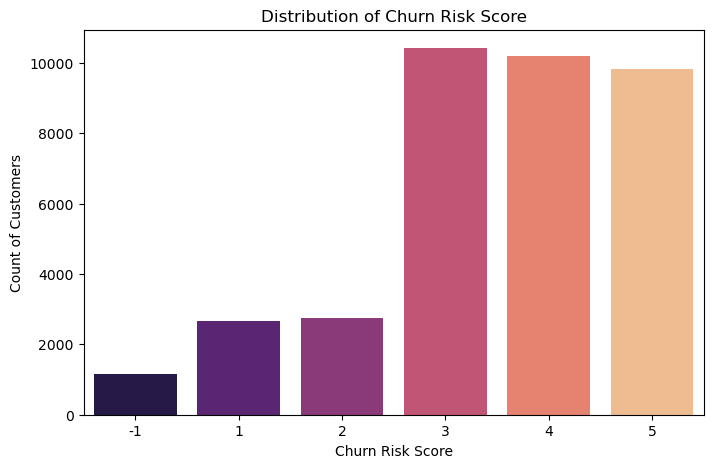

churn_risk_score
 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: count, dtype: int64

In [41]:
# Set figure size
plt.figure(figsize=(8,5))

# Plot churn risk score distribution
sns.barplot(x=churn_train['churn_risk_score'].value_counts().index, 
            y=churn_train['churn_risk_score'].value_counts().values, 
            palette='magma')

# Add labels and title
plt.xlabel('Churn Risk Score')
plt.ylabel('Count of Customers')
plt.title('Distribution of Churn Risk Score')
plt.show()

# Count unique values in churn_risk_score
churn_train['churn_risk_score'].value_counts()

From the distribution of the churn score, `churn_risk_score = -1` shares the least portion of 1163. 

In [43]:
# Filter records where churn_risk_score = -1
churn_negative = churn_train[churn_train['churn_risk_score'] == -1]

# Display if the user has made some transaction
churn_negative.describe()

age  days_since_last_login  avg_time_spent  \
count  1163.000000            1163.000000     1163.000000   
mean     37.053310             -34.881341      246.506069   
std      15.937234             214.963315      413.696001   
min      10.000000            -999.000000    -1621.281883   
25%      23.000000               8.000000       66.340000   
50%      37.000000              13.000000      167.690000   
75%      51.000000              17.000000      361.330000   
max      64.000000              26.000000     2766.750000   

       avg_transaction_value  points_in_wallet  churn_risk_score  
count            1163.000000       1061.000000            1163.0  
mean            28252.137678        687.891670              -1.0  
std             18155.697939        177.792796               0.0  
min               941.740000        -56.222644              -1.0  
25%             13771.290000        619.890000              -1.0  
50%             26853.870000        693.370000              -1.0  
75%             40452.505000        761.560000              -1.0  
max             99455.790000       1551.854854              -1.0

In [44]:
#Check if there is any missing value in the features
churn_negative.isna().sum()

Name                              0
age                               0
gender                            0
security_no                       0
region_category                 165
membership_category               0
joining_date                      0
joined_through_referral           0
referral_id                       0
preferred_offer_types            12
medium_of_operation               0
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                102
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
churn_risk_score                  0
dtype: int64

In [45]:
#compare to the users who receive a valid churn score (1-5)
churn_positive = churn_train[churn_train['churn_risk_score'] != -1]

# Display if the user has made some transaction
churn_positive.describe()

age  days_since_last_login  avg_time_spent  \
count  35829.000000           35829.000000    35829.000000   
mean      37.120266             -42.143906      243.373859   
std       15.865360             229.254856      397.784650   
min       10.000000            -999.000000    -2814.109110   
25%       23.000000               8.000000       59.810000   
50%       37.000000              12.000000      161.620000   
75%       51.000000              16.000000      356.330000   
max       64.000000              26.000000     3235.578521   

       avg_transaction_value  points_in_wallet  churn_risk_score  
count           35829.000000      32488.000000      35829.000000  
mean            29304.272306        686.849231          3.608278  
std             19484.565419        194.574486          1.176426  
min               800.460000       -760.661236          1.000000  
25%             14194.650000        615.967500          3.000000  
50%             27584.530000        697.820000          4.000000  
75%             40874.010000        764.002500          5.000000  
max             99914.050000       2069.069761          5.000000

In [46]:
#Check if there is any missing value in valid churn features
churn_positive.isna().sum()

Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5263
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            276
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3341
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

Both positive and negative churn score has insignificant difference in statistical summary. Highlighting the `avg_transaction_value` tells that the negative churn score customer has made a conversion.  Both also have missing values on the same features, indicating the negative score is not due to missing key features 

In [48]:
churn_train.groupby('churn_risk_score')['days_since_last_login'].agg(['min', 'max', 'mean', 'median'])

min  max       mean  median
churn_risk_score                             
-1               -999   26 -34.881341    13.0
 1               -999   26 -28.996983    12.0
 2               -999   26 -44.323240    12.0
 3               -999   26 -42.833653    12.0
 4               -999   26 -44.748159    12.0
 5               -999   26 -41.653200    12.0

Both positive and negative churn score has similar `days_since_last_login`. Meaning the negative score are not necessarily inactive customers.

In [50]:
# Check membership category distribution
churn_train.groupby('churn_risk_score')['membership_category'].value_counts(normalize=True)

churn_risk_score  membership_category
-1                Basic Membership       0.215821
                  No Membership          0.194325
                  Gold Membership        0.190026
                  Silver Membership      0.156492
                  Premium Membership     0.126397
                  Platinum Membership    0.116939
 1                Premium Membership     0.345400
                  Platinum Membership    0.338989
                  Gold Membership        0.315611
 2                Silver Membership      0.261948
                  Premium Membership     0.260489
                  Platinum Membership    0.246260
                  Gold Membership        0.231302
 3                Premium Membership     0.256907
                  Platinum Membership    0.252111
                  Gold Membership        0.248465
                  Silver Membership      0.242517
 4                Basic Membership       0.253314
                  Silver Membership      0.251350
            

<Figure size 1000x600 with 0 Axes>

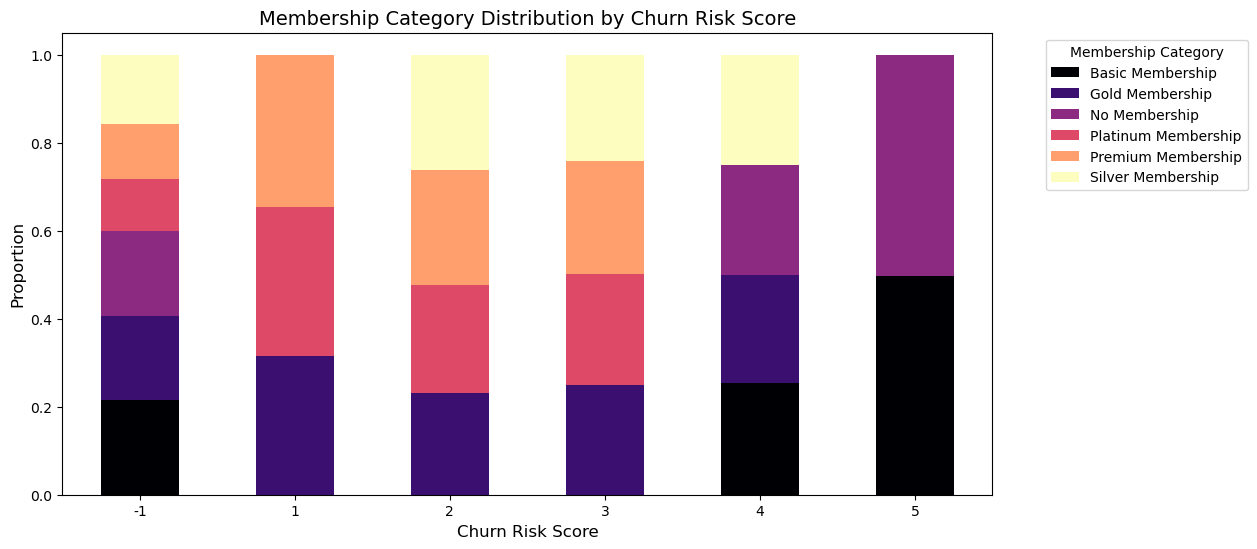

In [51]:
# Compute the normalized value counts
membership_dist = churn_train.groupby('churn_risk_score')['membership_category'].value_counts(normalize=True).unstack()

# Plot
plt.figure(figsize=(10, 6))
membership_dist.plot(kind='bar', stacked=True, colormap='magma', figsize=(12,6))

plt.title('Membership Category Distribution by Churn Risk Score', fontsize=14)
plt.xlabel('Churn Risk Score', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Membership Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

Negative churn also consist of customers with different class of membership. So, membership is not the cause of negative value. 

#### **Churn Risk Score Conclusion**

- Since the mean of `avg_transaction_value` does not return `0`, `churn_risk_score = -1` does not imply the zero conversion made by customer.
- Both the negative and the valid churn score also show no significant differences in statistical summary in `age`, `avg_time_spent`, `avg_transaction_value`, `points_in_wallet`, and `days_since_last_login`.
- Both data also has missing value in the corresponding features. It indicates that missing key features do not cause negative churn risk score.
- `membership_category` also can not explain the negative churn value. 

It concludes that it is probably due to placeholder for missing values and might need to be treated later. 

### **2. Insights and summary**

#### **Data Preparation**

Before analyzing for further insights and summary, the data needs to be prepared. The data used for analysis process is `train.csv`. The data preparation process is done with these following steps:
1. **Data validation** <br>
Data assessment and validation

2. **Exploratory Data Analysis** <br>
Descriptive Analysis, Univariate Analysis, and Correlation Analysis

3. **Data Pre-processing** <br>
Handling data abnormalities, missing values, and outliers

**Data Validation**

In [59]:
# Display data
churn_train.head()

Name  age gender  \
customer_id                                                          
fffe4300490044003600300030003800       Pattie Morrisey   18      F   
fffe43004900440032003100300035003700       Traci Peery   32      F   
fffe4300490044003100390032003600       Merideth Mcmeen   44      F   
fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
fffe43004900440031003900350030003600      Meghan Kosak   31      F   

                                     security_no region_category  \
customer_id                                                        
fffe4300490044003600300030003800         XW0DQ7H         Village   
fffe43004900440032003100300035003700     5K0N3X1            City   
fffe4300490044003100390032003600         1F2TCL3            Town   
fffe43004900440036003000330031003600     VJGJ33N            City   
fffe43004900440031003900350030003600     SVZXCWB            City   

                                      membership_category joining_date  \
customer_id                                                              
fffe4300490044003600300030003800      Platinum Membership   2017-08-17   
fffe43004900440032003100300035003700   Premium Membership   2017-08-28   
fffe4300490044003100390032003600            No Membership   2016-11-11   
fffe43004900440036003000330031003600        No Membership   2016-10-29   
fffe43004900440031003900350030003600        No Membership   2017-09-12   

                                     joined_through_referral referral_id  \
customer_id                                                                
fffe4300490044003600300030003800                          No    xxxxxxxx   
fffe43004900440032003100300035003700                       ?    CID21329   
fffe4300490044003100390032003600                         Yes    CID12313   
fffe43004900440036003000330031003600                     Yes     CID3793   
fffe43004900440031003900350030003600                      No    xxxxxxxx   

                                         preferred_offer_types  \
customer_id                                                      
fffe4300490044003600300030003800         Gift Vouchers/Coupons   
fffe43004900440032003100300035003700     Gift Vouchers/Coupons   
fffe4300490044003100390032003600         Gift Vouchers/Coupons   
fffe43004900440036003000330031003600     Gift Vouchers/Coupons   
fffe43004900440031003900350030003600  Credit/Debit Card Offers   

                                     medium_of_operation internet_option  \
customer_id                                                                
fffe4300490044003600300030003800                       ?           Wi-Fi   
fffe43004900440032003100300035003700             Desktop     Mobile_Data   
fffe4300490044003100390032003600                 Desktop           Wi-Fi   
fffe43004900440036003000330031003600             Desktop     Mobile_Data   
fffe43004900440031003900350030003600          Smartphone     Mobile_Data   

                                     last_visit_time  days_since_last_login  \
customer_id                                                                   
fffe4300490044003600300030003800            16:08:02                     17   
fffe43004900440032003100300035003700        12:38:13                     16   
fffe4300490044003100390032003600            22:53:21                     14   
fffe43004900440036003000330031003600        15:57:50                     11   
fffe43004900440031003900350030003600        15:46:44                     20   

                                      avg_time_spent  avg_transaction_value  \
customer_id                                                                   
fffe4300490044003600300030003800              300.63               53005.25   
fffe43004900440032003100300035003700          306.34               12838.38   
fffe4300490044003100390032003600              516.16               21027.00   
fffe43004900440036003000330031003600           53.27               25239.56   
fffe43

In [60]:
# Identify data types
churn_train.dtypes

Name                             object
age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
dtype: object

In [61]:
# Identify missing values
churn_train.isna().sum()/len(churn_train)

Name                            0.000000
age                             0.000000
gender                          0.000000
security_no                     0.000000
region_category                 0.146734
membership_category             0.000000
joining_date                    0.000000
joined_through_referral         0.000000
referral_id                     0.000000
preferred_offer_types           0.007785
medium_of_operation             0.000000
internet_option                 0.000000
last_visit_time                 0.000000
days_since_last_login           0.000000
avg_time_spent                  0.000000
avg_transaction_value           0.000000
avg_frequency_login_days        0.000000
points_in_wallet                0.093074
used_special_discount           0.000000
offer_application_preference    0.000000
past_complaint                  0.000000
complaint_status                0.000000
feedback                        0.000000
churn_risk_score                0.000000
dtype: float64

_**Handle incorrect format**_

In [63]:
# Conver 'avg_frequency_login_days' to numeric format
churn_train['avg_frequency_login_days'] = pd.to_numeric(churn_train['avg_frequency_login_days'], errors='coerce')

# Convert 'joining_date' to YYYY-MM-DD format
churn_train['joining_date'] = pd.to_datetime(churn_train['joining_date'], format='%Y-%m-%d')

# Convert 'last_visit_time' to HH:MM:SS format
churn_train['last_visit_time'] = pd.to_datetime(churn_train['last_visit_time'], format='%H:%M:%S').dt.time

# Display rows to verify the changes
churn_train[['avg_frequency_login_days', 'joining_date', 'last_visit_time']].dtypes

avg_frequency_login_days           float64
joining_date                datetime64[ns]
last_visit_time                     object
dtype: object

_**Drop irrelevant column**_

Some column that are considered irrelevant for this analytical purpose will be dropped such as unique identifier, redundant information, or random values. The columns to drop are: 
- `Name`
- `security_no`
- `referral_id`
- `last_visit_time`

In [66]:
# Set column to drop
churn_column_to_drop = ['Name', 'security_no', 'referral_id', 'last_visit_time']

# Drop column
churn_train.drop(columns = churn_column_to_drop, inplace=True)

In [67]:
# Check data
churn_train.head()

age gender region_category  \
customer_id                                                        
fffe4300490044003600300030003800       18      F         Village   
fffe43004900440032003100300035003700   32      F            City   
fffe4300490044003100390032003600       44      F            Town   
fffe43004900440036003000330031003600   37      M            City   
fffe43004900440031003900350030003600   31      F            City   

                                      membership_category joining_date  \
customer_id                                                              
fffe4300490044003600300030003800      Platinum Membership   2017-08-17   
fffe43004900440032003100300035003700   Premium Membership   2017-08-28   
fffe4300490044003100390032003600            No Membership   2016-11-11   
fffe43004900440036003000330031003600        No Membership   2016-10-29   
fffe43004900440031003900350030003600        No Membership   2017-09-12   

                                     joined_through_referral  \
customer_id                                                    
fffe4300490044003600300030003800                          No   
fffe43004900440032003100300035003700                       ?   
fffe4300490044003100390032003600                         Yes   
fffe43004900440036003000330031003600                     Yes   
fffe43004900440031003900350030003600                      No   

                                         preferred_offer_types  \
customer_id                                                      
fffe4300490044003600300030003800         Gift Vouchers/Coupons   
fffe43004900440032003100300035003700     Gift Vouchers/Coupons   
fffe4300490044003100390032003600         Gift Vouchers/Coupons   
fffe43004900440036003000330031003600     Gift Vouchers/Coupons   
fffe43004900440031003900350030003600  Credit/Debit Card Offers   

                                     medium_of_operation internet_option  \
customer_id                                                                
fffe4300490044003600300030003800                       ?           Wi-Fi   
fffe43004900440032003100300035003700             Desktop     Mobile_Data   
fffe4300490044003100390032003600                 Desktop           Wi-Fi   
fffe43004900440036003000330031003600             Desktop     Mobile_Data   
fffe43004900440031003900350030003600          Smartphone     Mobile_Data   

                                      days_since_last_login  avg_time_spent  \
customer_id                                                                   
fffe4300490044003600300030003800                         17          300.63   
fffe43004900440032003100300035003700                     16          306.34   
fffe4300490044003100390032003600                         14          516.16   
fffe43004900440036003000330031003600                     11           53.27   
fffe43004900440031003900350030003600                     20          113.13   

                                      avg_transaction_value  \
customer_id                                                   
fffe4300490044003600300030003800                   53005.25   
fffe43004900440032003100300035003700               12838.38   
fffe4300490044003100390032003600                   21027.00   
fffe43004900440036003000330031003600               25239.56   
fffe43004900440031003900350030003600               24483.66   

                                      avg_frequency_login_days  \
customer_id                                                      
fffe4300490044003600300030003800                          17.0   
fffe43004900440032003100300035003700                      10.0   
fffe4300490044003100390032003600                          22.0   
fffe43004900440036003000330031003600                       6.0   
fffe43004900440031003900350030003600                      16.0   

                                      points_in_wallet used_special_discount  \
customer_id                                               

**Exploratory Data Analysis**

_**Numerical data**_

Split numerical data

In [71]:
# Create a get numerical function
def get_numerical_features(data, numerical_column):
    """
    Extracts numerical features from a DataFrame based on a given list of column names.

    Parameters
    ----------
    data : pandas.DataFrame
        Input DataFrame containing various features.
    
    numerical_column : list of str
        List of column names representing numerical features.

    Returns
    -------
    pandas.DataFrame
        DataFrame containing only the specified numerical columns.
    """
    
    numerical_data = data[numerical_column]
    
    return numerical_data

In [72]:
# Set numerical column
numerical_churn = [
    'age',
    'days_since_last_login',
    'avg_time_spent',
    'avg_transaction_value',
    'avg_frequency_login_days',
    'points_in_wallet']

# Differentiate numerical dataframe
num_churn = get_numerical_features(data = churn_train, 
                                  numerical_column = numerical_churn)


# Check numerical data
num_churn.head()

age  days_since_last_login  \
customer_id                                                        
fffe4300490044003600300030003800       18                     17   
fffe43004900440032003100300035003700   32                     16   
fffe4300490044003100390032003600       44                     14   
fffe43004900440036003000330031003600   37                     11   
fffe43004900440031003900350030003600   31                     20   

                                      avg_time_spent  avg_transaction_value  \
customer_id                                                                   
fffe4300490044003600300030003800              300.63               53005.25   
fffe43004900440032003100300035003700          306.34               12838.38   
fffe4300490044003100390032003600              516.16               21027.00   
fffe43004900440036003000330031003600           53.27               25239.56   
fffe43004900440031003900350030003600          113.13               24483.66   

                                      avg_frequency_login_days  \
customer_id                                                      
fffe4300490044003600300030003800                          17.0   
fffe43004900440032003100300035003700                      10.0   
fffe4300490044003100390032003600                          22.0   
fffe43004900440036003000330031003600                       6.0   
fffe43004900440031003900350030003600                      16.0   

                                      points_in_wallet  
customer_id                                             
fffe4300490044003600300030003800                781.75  
fffe43004900440032003100300035003700               NaN  
fffe4300490044003100390032003600                500.69  
fffe43004900440036003000330031003600            567.66  
fffe43004900440031003900350030003600            663.06

In [73]:
# Check statistical summary
num_churn.describe().T

count          mean           std          min  \
age                       36992.0     37.118161     15.867412    10.000000   
days_since_last_login     36992.0    -41.915576    228.819900  -999.000000   
avg_time_spent            36992.0    243.472334    398.289149 -2814.109110   
avg_transaction_value     36992.0  29271.194003  19444.806226   800.460000   
avg_frequency_login_days  33470.0     15.976715      9.215858   -43.652702   
points_in_wallet          33549.0    686.882199    194.063624  -760.661236   

                                 25%        50%        75%           max  
age                          23.0000     37.000     51.000     64.000000  
days_since_last_login         8.0000     12.000     16.000     26.000000  
avg_time_spent               60.1025    161.765    356.515   3235.578521  
avg_transaction_value     14177.5400  27554.485  40855.110  99914.050000  
avg_frequency_login_days      9.0000     16.000     23.000     73.061995  
points_in_wallet            616.1500    697.620    763.950   2069.069761

Data distribution

In [75]:
# check numerical columns
print(f'Numerical features : \n{list(num_churn)}')

Numerical features : 
['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']


In [76]:
# List numerical column
ch_num = list(num_churn.columns)

Check data distributions and outliers.

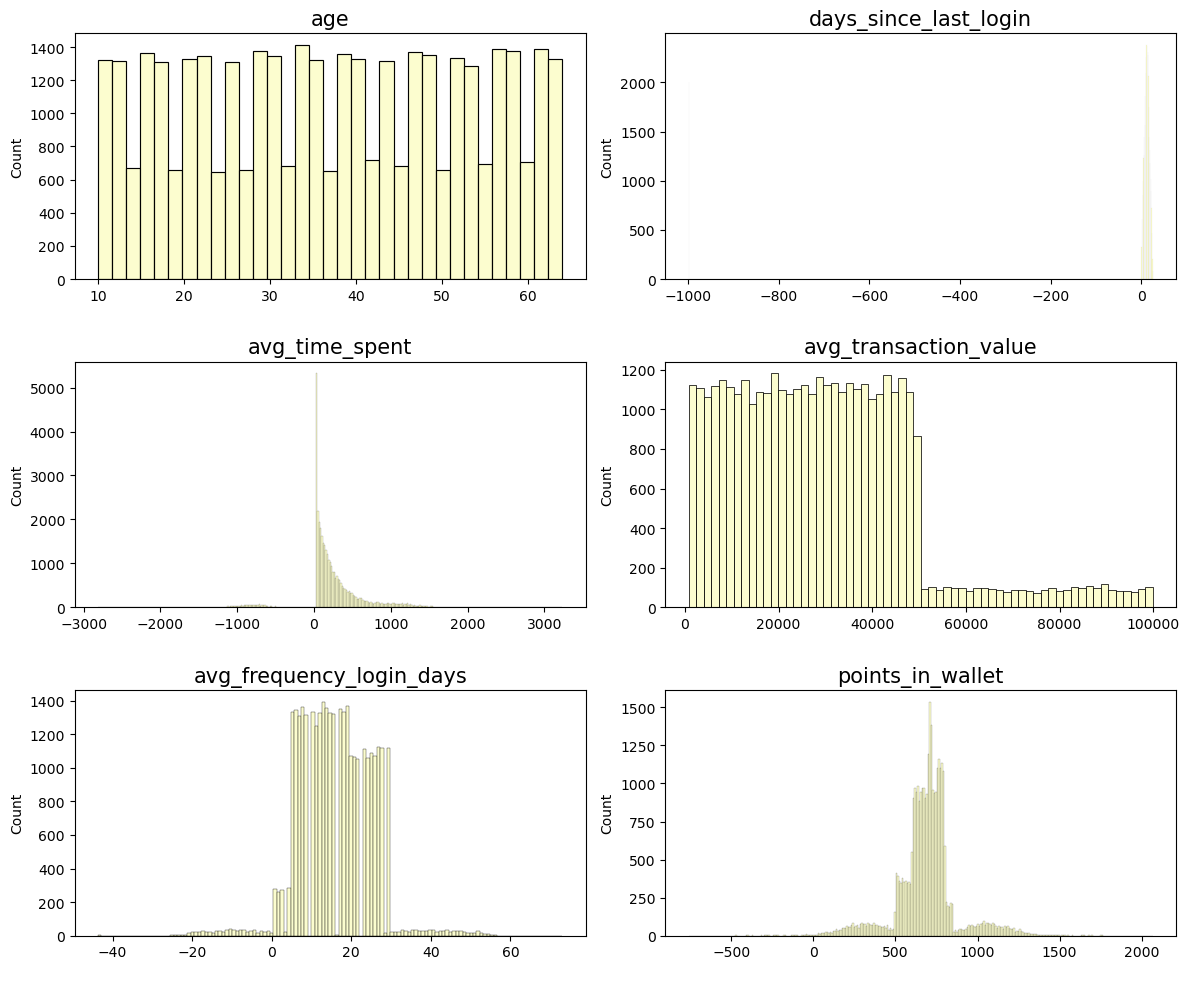

In [78]:
# Create histplot
plt.figure(figsize=(12,10))
for i in range(0, len(ch_num)):
    plt.subplot(3,2,i+1)
    sns.histplot(x=churn_train[ch_num[i]], color='#FCFDBF')
    plt.title(ch_num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

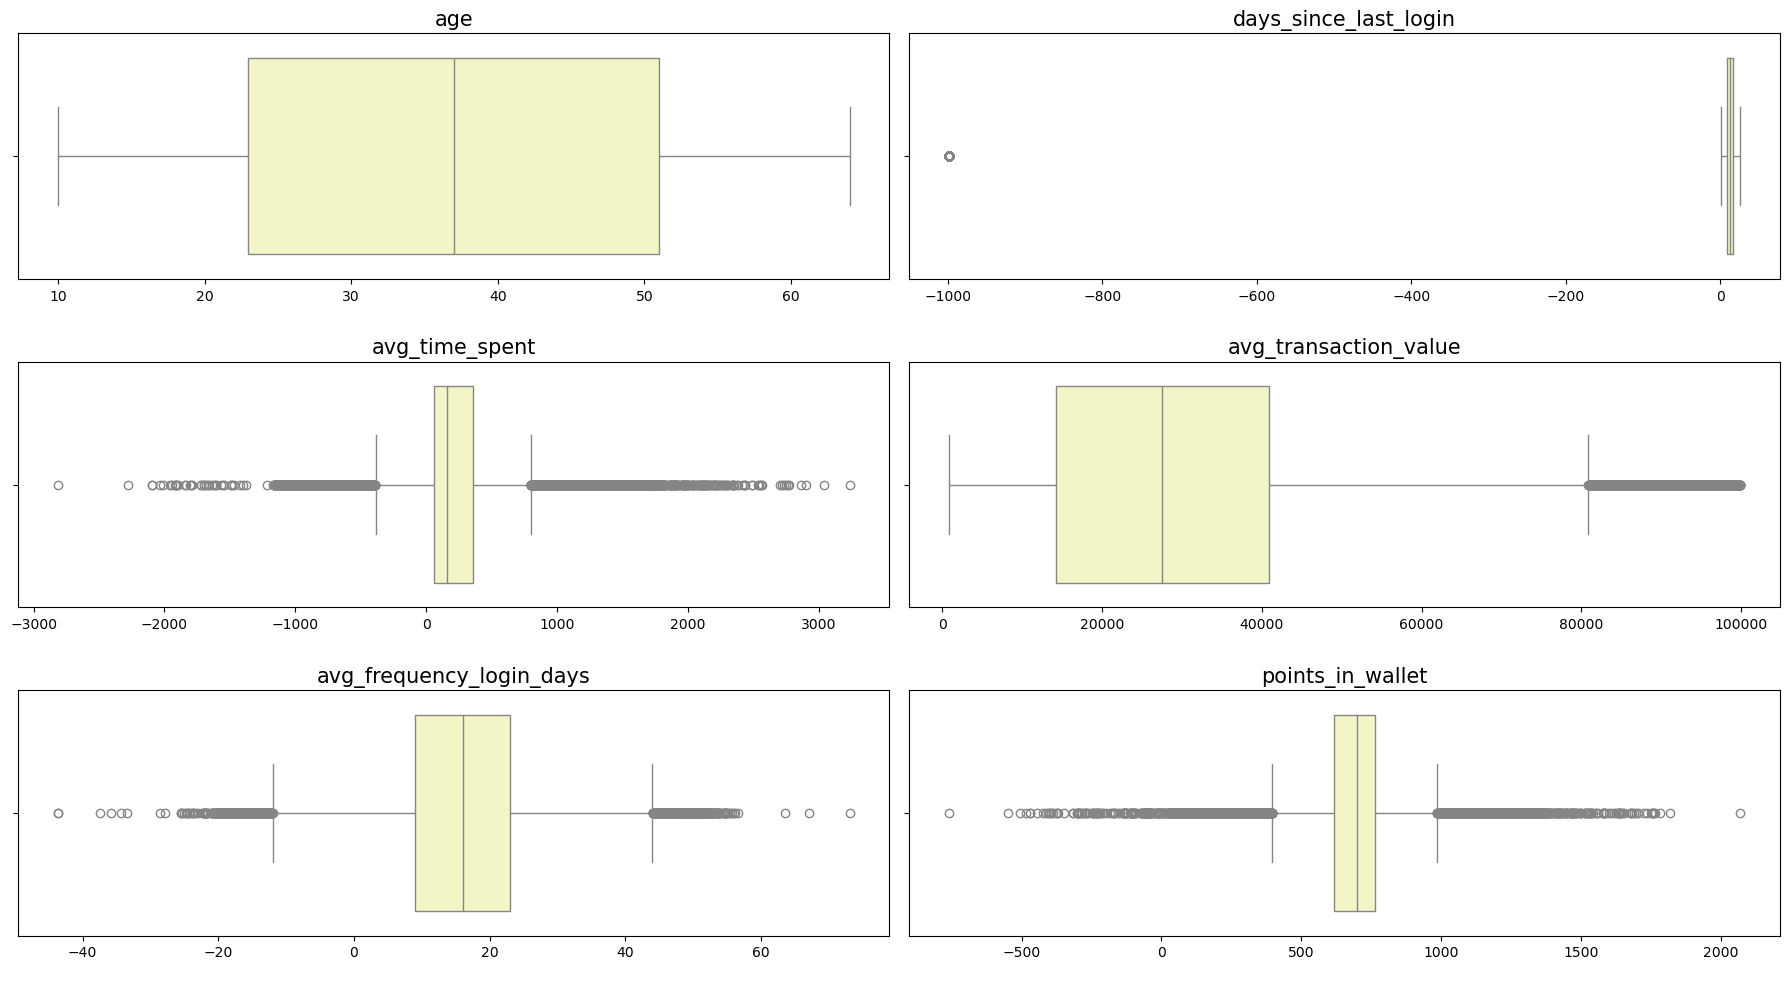

In [79]:
# Create boxplot
plt.figure(figsize=(18,10))
for i in range(0, len(ch_num)):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=churn_train[ch_num[i]], color='#FCFDBF')
    plt.title(ch_num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

_**Categorical data**_

Split categorical data

In [82]:
 # Create function to get categorical column list function
def get_categorical_columns(data, y_column, exception_column, numerical_column):
    """
    Identifies categorical columns by excluding numerical columns and target column(s).

    Parameters
    ----------
    data : pandas.DataFrame
        Input DataFrame containing various features.
    
    y_column : str or list of str
        Target column(s) to exclude from categorical features.
    
    numerical_column : list of str
        List of column names representing numerical features.

    Returns
    -------
    list of str
        List of categorical column names.
    """
    
    X_column = set(data.columns).difference(set(y_column))

    X_date_column = X_column.difference(set(exception_column))

    categorical_columns = X_date_column.difference(set(numerical_column))
    cat_list = list(categorical_columns)
    
    return cat_list

# Create function to get categorical dataframe
def extract_categorical_data(data, categorical_column):
    """
    Selects categorical columns from a DataFrame based on a given list of column names.

    Parameters
    ----------
    data : pandas.DataFrame
        Input DataFrame containing various features.
    
    categorical_column : list of str
        List of column names representing categorical features.

    Returns
    -------
    pandas.DataFrame
        DataFrame containing only the specified categorical columns.
    """
    
    categorical_data = data[categorical_column]
    
    return categorical_data

In [83]:
# Set target variable to drop
y_churn = ['churn_risk_score']
datetime_churn = ['joining_date','last_visit_time']

# Get categorical column names
categorical_churn = get_categorical_columns(data = churn_train,
                                              y_column = y_churn,
                                              exception_column = datetime_churn,
                                              numerical_column = numerical_churn
                                              )

# Extract categorical data
cat_churn = extract_categorical_data(data = churn_train, 
                                    categorical_column = categorical_churn)

# Display first few rows of categorical data
cat_churn.head()

medium_of_operation  membership_category  \
customer_id                                                                     
fffe4300490044003600300030003800                       ?  Platinum Membership   
fffe43004900440032003100300035003700             Desktop   Premium Membership   
fffe4300490044003100390032003600                 Desktop        No Membership   
fffe43004900440036003000330031003600             Desktop        No Membership   
fffe43004900440031003900350030003600          Smartphone        No Membership   

                                         preferred_offer_types  \
customer_id                                                      
fffe4300490044003600300030003800         Gift Vouchers/Coupons   
fffe43004900440032003100300035003700     Gift Vouchers/Coupons   
fffe4300490044003100390032003600         Gift Vouchers/Coupons   
fffe43004900440036003000330031003600     Gift Vouchers/Coupons   
fffe43004900440031003900350030003600  Credit/Debit Card Offers   

                                     used_special_discount internet_option  \
customer_id                                                                  
fffe4300490044003600300030003800                       Yes           Wi-Fi   
fffe43004900440032003100300035003700                   Yes     Mobile_Data   
fffe4300490044003100390032003600                        No           Wi-Fi   
fffe43004900440036003000330031003600                    No     Mobile_Data   
fffe43004900440031003900350030003600                    No     Mobile_Data   

                                     region_category  \
customer_id                                            
fffe4300490044003600300030003800             Village   
fffe43004900440032003100300035003700            City   
fffe4300490044003100390032003600                Town   
fffe43004900440036003000330031003600            City   
fffe43004900440031003900350030003600            City   

                                     offer_application_preference  \
customer_id                                                         
fffe4300490044003600300030003800                              Yes   
fffe43004900440032003100300035003700                           No   
fffe4300490044003100390032003600                              Yes   
fffe43004900440036003000330031003600                          Yes   
fffe43004900440031003900350030003600                          Yes   

                                     past_complaint                  feedback  \
customer_id                                                                     
fffe4300490044003600300030003800                 No  Products always in Stock   
fffe43004900440032003100300035003700            Yes     Quality Customer Care   
fffe4300490044003100390032003600                Yes              Poor Website   
fffe43004900440036003000330031003600            Yes              Poor Website   
fffe43004900440031003900350030003600            Yes              Poor Website   

                                         complaint_status  \
customer_id                                                 
fffe4300490044003600300030003800           Not Applicable   
fffe43004900440032003100300035003700               Solved   
fffe4300490044003100390032003600      Solved in Follow-up   
fffe43004900440036003000330031003600             Unsolved   
fffe43004900440031003900350030003600               Solved   

                                     joined_through_referral gender  
customer_id                                                          
fffe4300490044003600300030003800                          No      F  
fffe43004900440032003100300035003700                       ?      F  
fffe4300490044003100390032003600                         Yes      F  
fffe43004900440036003000330031003600                     Yes      M  
fffe43004900440031003900350030003600                      No      F

Categorical data distribution

In [85]:
# check categorical columns
print(f'Categorical features : \n{list(cat_churn)}')

Categorical features : 
['medium_of_operation', 'membership_category', 'preferred_offer_types', 'used_special_discount', 'internet_option', 'region_category', 'offer_application_preference', 'past_complaint', 'feedback', 'complaint_status', 'joined_through_referral', 'gender']


In [86]:
# List categorical column
ch_cat = list(cat_churn.columns)

print(f'Number Categorical features : {len(ch_cat)}')

Number Categorical features : 12


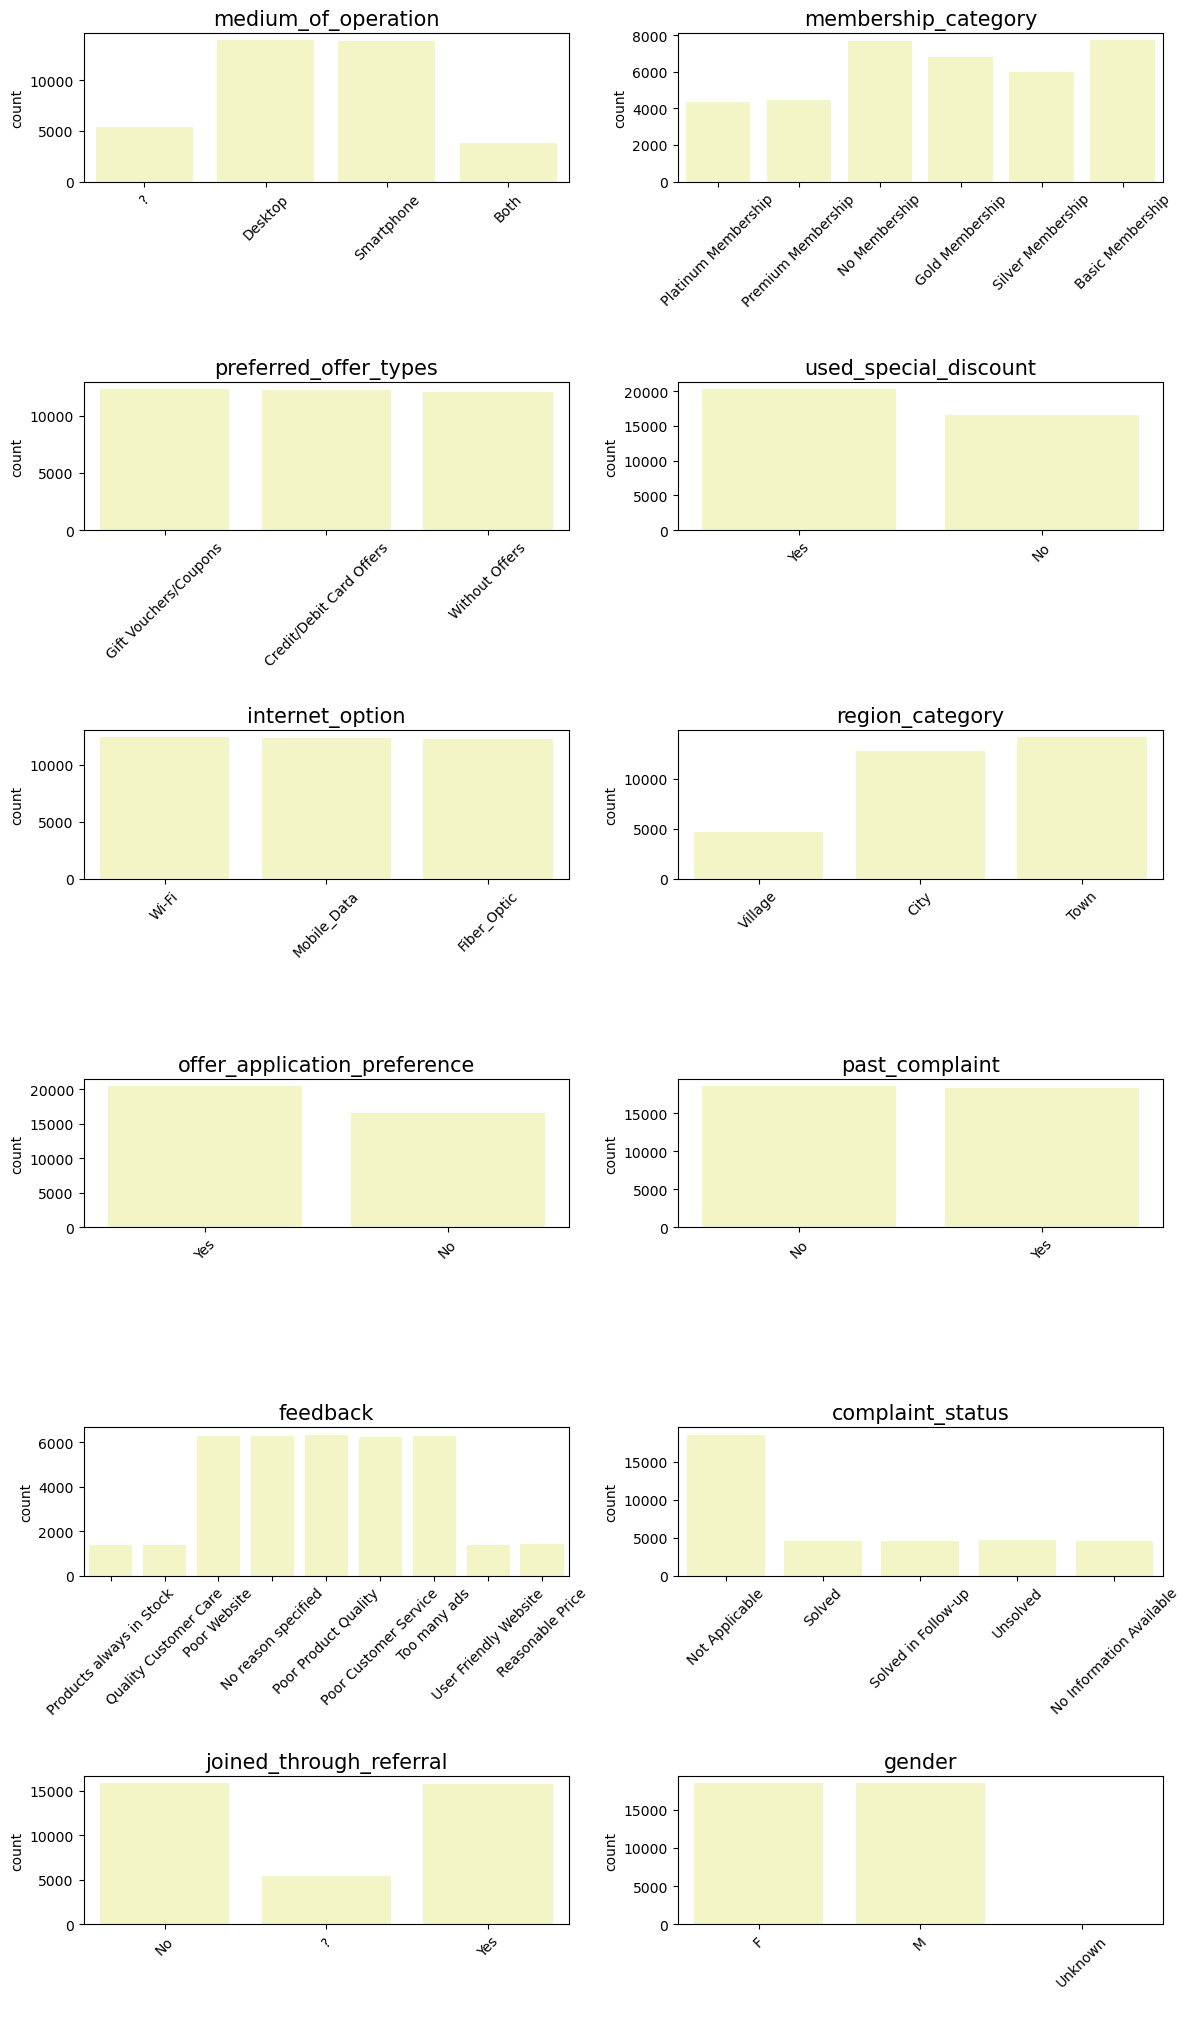

In [87]:
# Create countplot
plt.figure(figsize=(12,20))
for i in range(0, len(ch_cat)):
    plt.subplot(6,2,i+1)
    sns.countplot(x=churn_train[ch_cat[i]], color='#FCFDBF')
    plt.title(ch_cat[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()
    plt.xticks(rotation=45)

**Data Preparation for Descriptive Analysis**

The approach to clean the data is as follows:
1. Handle inconsistent placeholder for categorical data
2. Handle missing values for categorical and numerical data
3. Handle outliers for numerical data

_**Handle inconsistent placeholder**_ 

Based on the categorical graphs, the placeholder is inconsistent. 

In [92]:
def clean_data(data, placeholders):
    """
    Cleans the dataset by replacing inconsistent placeholders.

    Parameters
    ----------
    data : pandas.DataFrame
        Input DataFrame containing categorical features.

    Returns
    -------
    pandas.DataFrame
        Cleaned DataFrame with placeholders replaced.
    """
    # Replace placeholders
    data = data.replace(placeholders, 'Unknown')
    
    return data

In [93]:
# Set target variable to drop
placeholders = ['?','No Information Available']

# Replace categorical placeholder
cat_churn_replaced = clean_data(data = cat_churn, 
                               placeholders = placeholders)

# Identify unique values in each column to detect unusual placeholders
for col in cat_churn_replaced.columns:
    unique_vals = cat_churn_replaced[col].unique()
    print(f'{col}: {unique_vals[:10]}\n')

medium_of_operation: ['Unknown' 'Desktop' 'Smartphone' 'Both']

membership_category: ['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']

preferred_offer_types: ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]

used_special_discount: ['Yes' 'No']

internet_option: ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']

region_category: ['Village' 'City' 'Town' nan]

offer_application_preference: ['Yes' 'No']

past_complaint: ['No' 'Yes']

feedback: ['Products always in Stock' 'Quality Customer Care' 'Poor Website'
 'No reason specified' 'Poor Product Quality' 'Poor Customer Service'
 'Too many ads' 'User Friendly Website' 'Reasonable Price']

complaint_status: ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved' 'Unknown']

joined_through_referral: ['No' 'Unknown' 'Yes']

gender: ['F' 'M' 'Unknown']



_**Handle missing values**_

Numerical Data

In [96]:
# Check numerical missing value
num_churn.isna().sum()/len(num_churn)

age                         0.000000
days_since_last_login       0.000000
avg_time_spent              0.000000
avg_transaction_value       0.000000
avg_frequency_login_days    0.095210
points_in_wallet            0.093074
dtype: float64

In [97]:
def impute_num_values (data, numerical_column):
    """
    Imputes missing values in the dataset.

    - Numerical values: Filled with column median.

    Parameters
    ----------
    data : pandas.DataFrame
        Input DataFrame with numerical missing values.

    Returns
    -------
    pandas.DataFrame
        DataFrame with missing values imputed.
    """

    # Impute numerical missing values with mean (can change to median if needed)
    data = data.fillna(data[numerical_column].median())

    return data

In [98]:
# Impute num values
num_churn_imputed = impute_num_values (data = num_churn,
                                     numerical_column = numerical_churn)

# Check imputed numerical missing value
num_churn_imputed.isna().sum()

age                         0
days_since_last_login       0
avg_time_spent              0
avg_transaction_value       0
avg_frequency_login_days    0
points_in_wallet            0
dtype: int64

Cetegorical Data

In [100]:
# Check categorical missing value
cat_churn_replaced.isna().sum()/len(cat_churn_replaced)

medium_of_operation             0.000000
membership_category             0.000000
preferred_offer_types           0.007785
used_special_discount           0.000000
internet_option                 0.000000
region_category                 0.146734
offer_application_preference    0.000000
past_complaint                  0.000000
feedback                        0.000000
complaint_status                0.000000
joined_through_referral         0.000000
gender                          0.000000
dtype: float64

In [101]:
def impute_cat_values(data):
    """
    Imputes missing values in the dataset.

    - Categorical values: Filled with 'Unknown'.

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame with categorical missing values.

    Returns
    -------
    pandas.DataFrame
        DataFrame with missing values imputed.
    """
    # Impute categorical missing values with "Unknown"
    data = data.fillna('Unknown')


    return data

In [102]:
# Impute cat values
cat_churn_imputed = impute_cat_values (data = cat_churn_replaced)

# Check imputed categorical missing value
cat_churn_imputed.isna().sum()

medium_of_operation             0
membership_category             0
preferred_offer_types           0
used_special_discount           0
internet_option                 0
region_category                 0
offer_application_preference    0
past_complaint                  0
feedback                        0
complaint_status                0
joined_through_referral         0
gender                          0
dtype: int64

_**Handle outliers and abnormal data**_

Check for any outliers and abnormalities in data after imputation through data visualization.

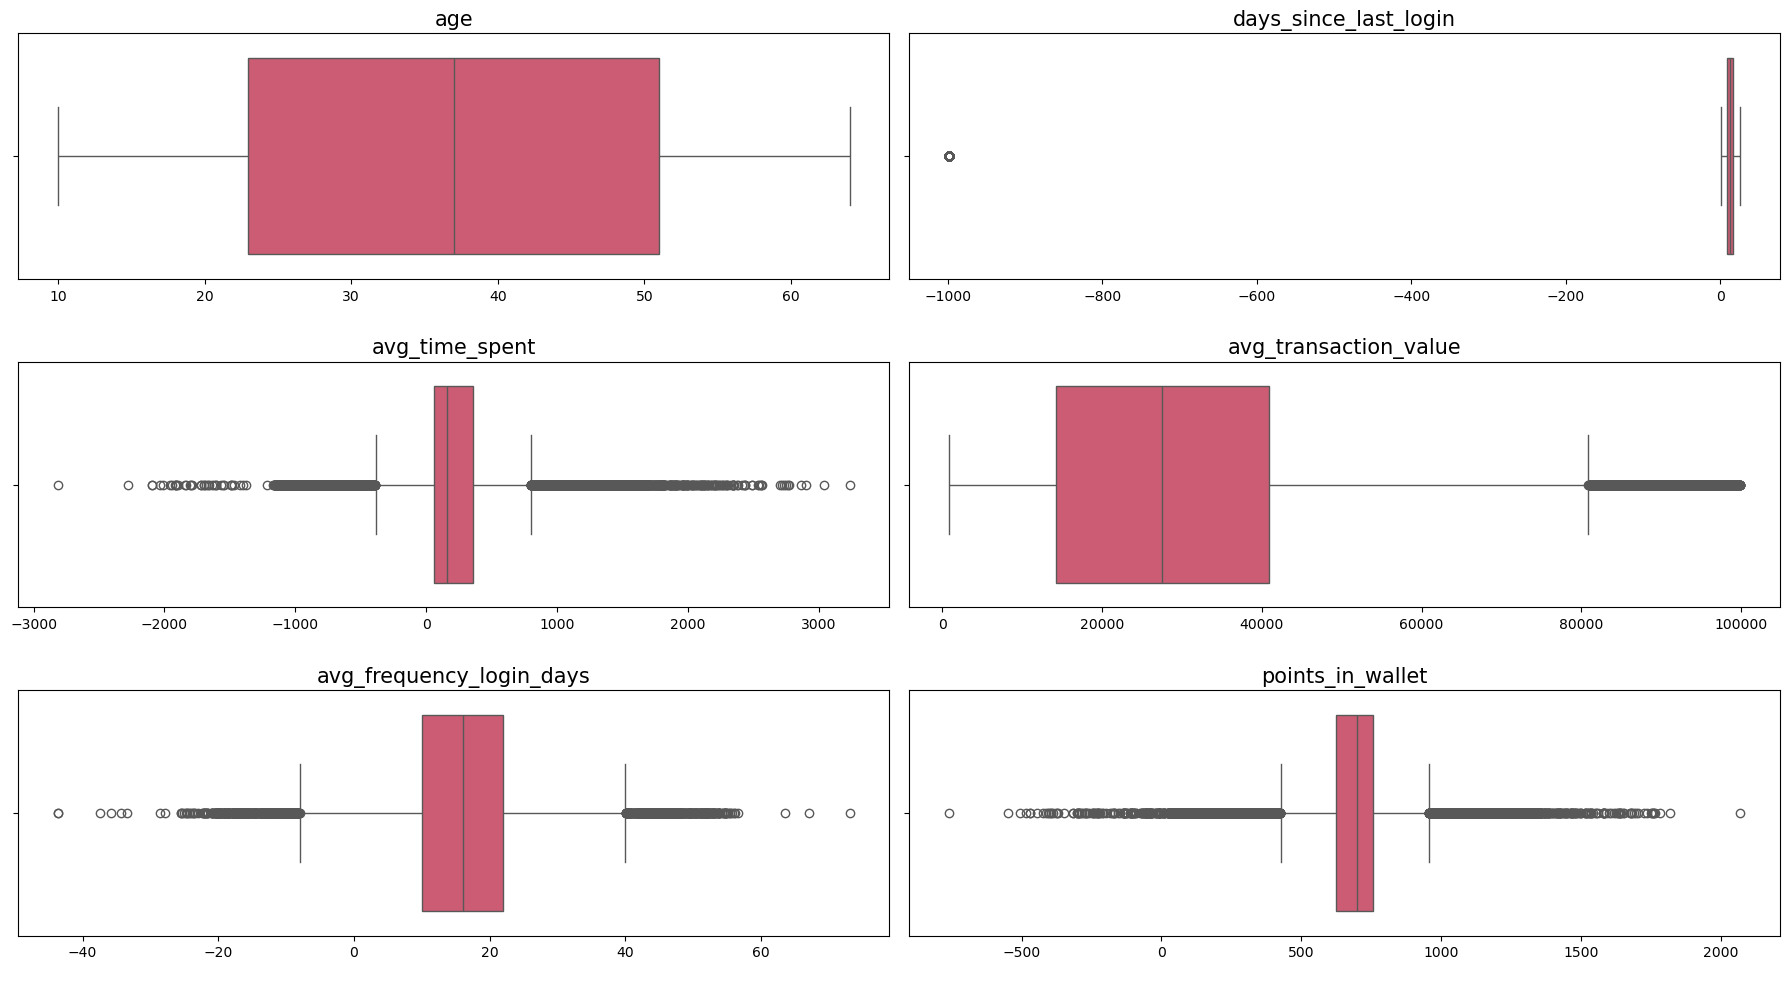

In [105]:
# Create boxplot
plt.figure(figsize=(18,10))
for i in range(0, len(ch_num)):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=num_churn_imputed[ch_num[i]], color='#DE4968')
    plt.title(ch_num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

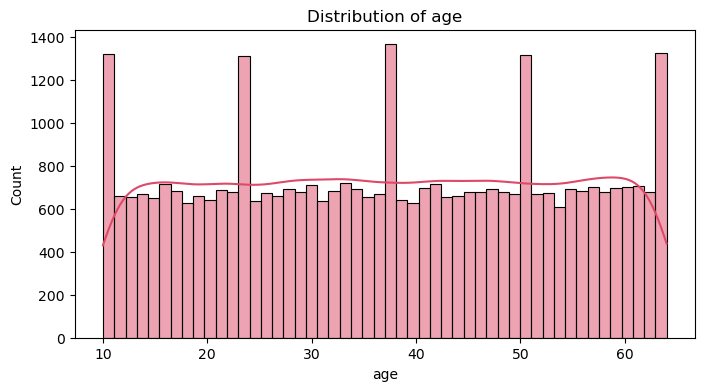

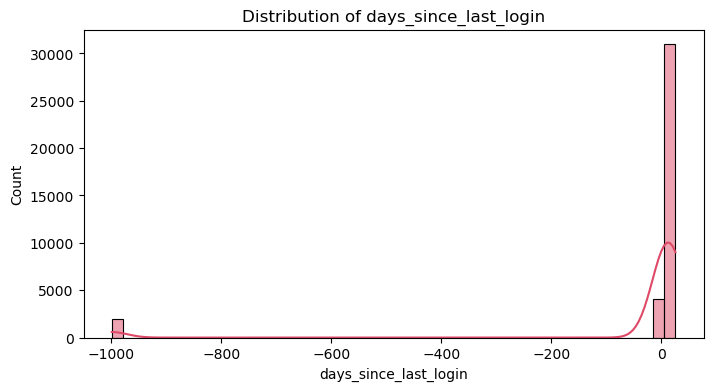

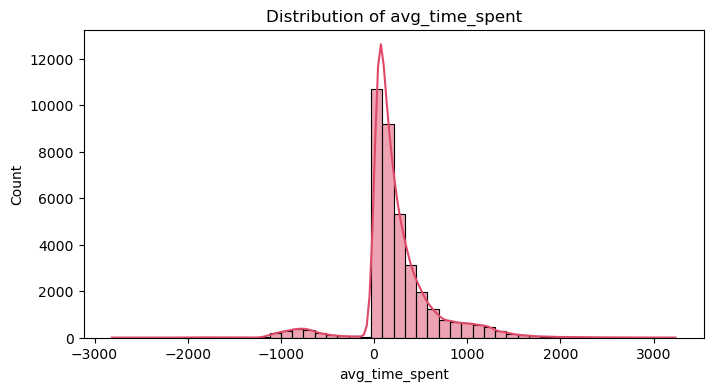

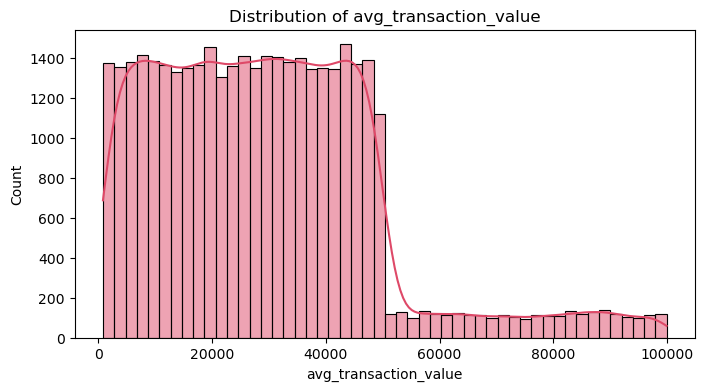

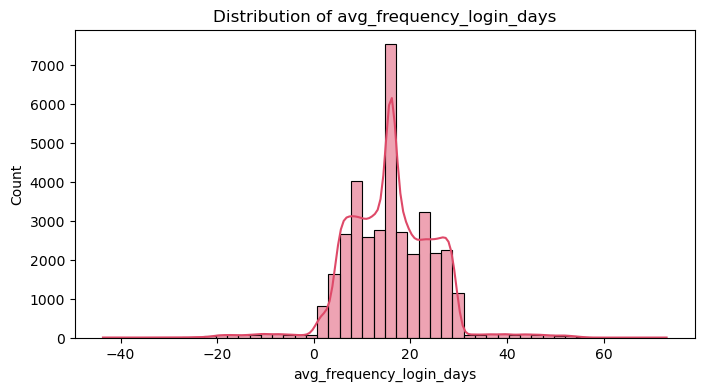

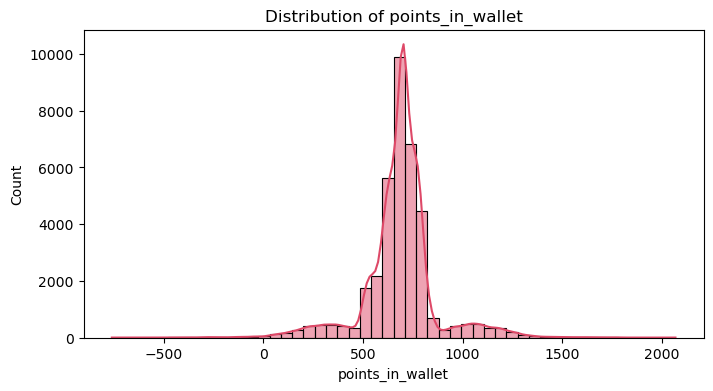

In [106]:
# Create histogram
for col in num_churn_imputed:
    plt.figure(figsize=(8, 4))
    sns.histplot(num_churn_imputed[col], bins=50, kde=True, color='#DE4968')
    plt.title(f'Distribution of {col}')
    plt.show()

Outliers and abnormalities like negative values in `avg_frequency_login_days`, `points_in_wallet`, `avg_time_spent` shares small proportions 

In [108]:
# Remove negative value
num_churn_ab = num_churn_imputed.copy()

ch_columns = [
    'days_since_last_login',
    'avg_time_spent',
    'avg_frequency_login_days',
    'points_in_wallet'
]

for col in ch_columns:
    num_churn_ab = num_churn_ab[num_churn_ab[col] >= 0]

num_churn_ab.describe()

age  days_since_last_login  avg_time_spent  \
count  32644.000000           32644.000000    32644.000000   
mean      37.096005              12.775242      292.856079   
std       15.850563               5.565202      332.294101   
min       10.000000               1.000000        1.837399   
25%       23.000000               9.000000       71.440000   
50%       37.000000              13.000000      173.870000   
75%       51.000000              17.000000      371.745000   
max       64.000000              26.000000     3235.578521   

       avg_transaction_value  avg_frequency_login_days  points_in_wallet  
count           32644.000000              32644.000000      32644.000000  
mean            29258.763861                 16.483438        691.265058  
std             19468.343071                  7.976014        176.966062  
min               800.460000                  0.009208          6.432208  
25%             14177.855000                 10.000000        625.687500  
50%             27478.440000                 16.000000        697.620000  
75%             40802.290000                 22.000000        757.322500  
max             99914.050000                 67.062422       2069.069761

Check removed abnormal data with visualization

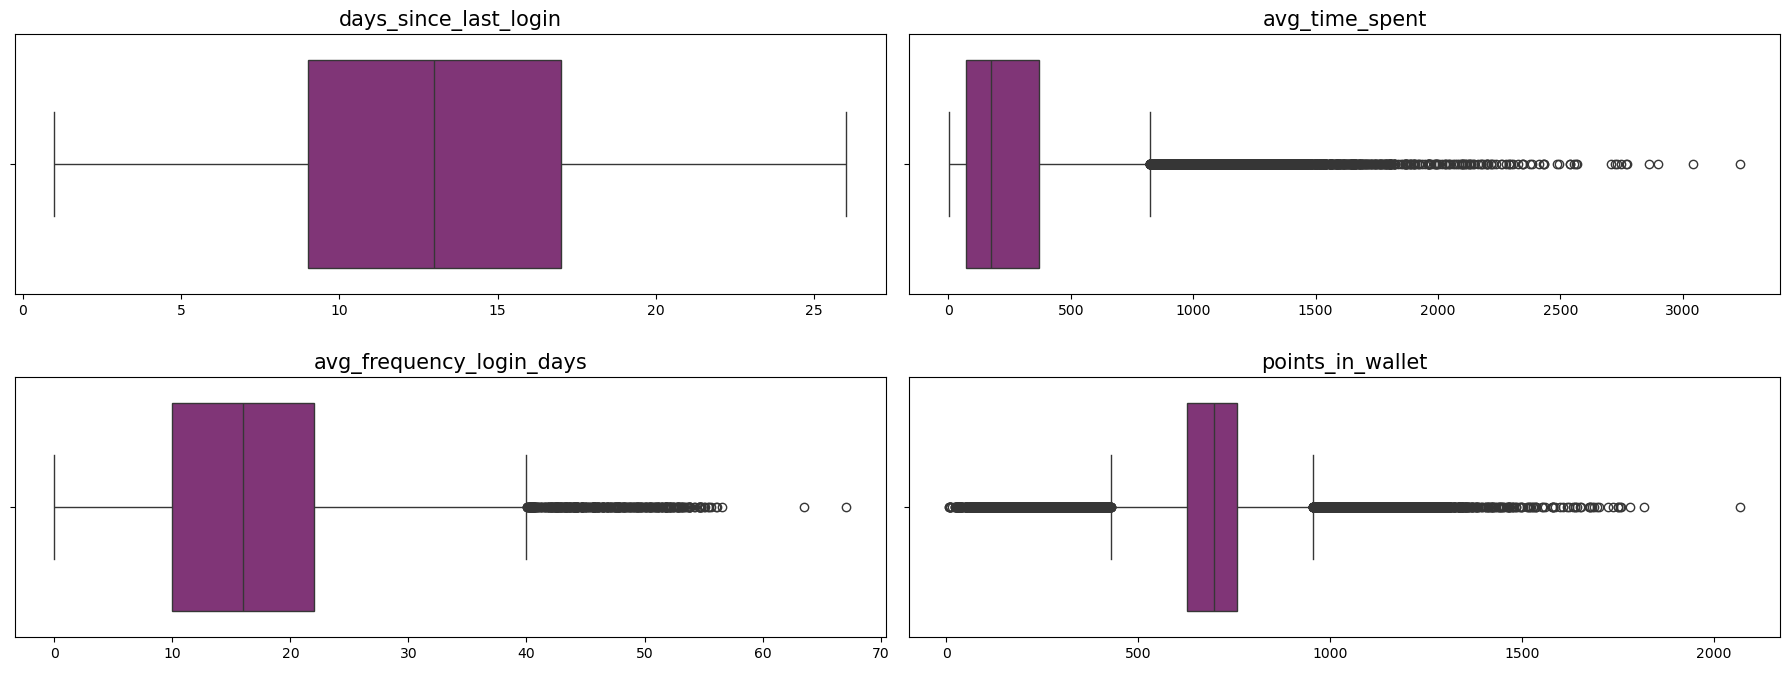

In [110]:
# Create boxplot
plt.figure(figsize=(18,10))
for i in range(0, len(ch_columns)):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=num_churn_ab[ch_columns[i]], color='#8C2981')
    plt.title(ch_columns[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

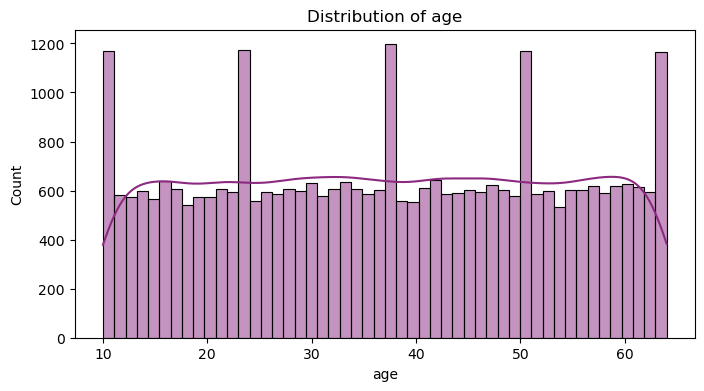

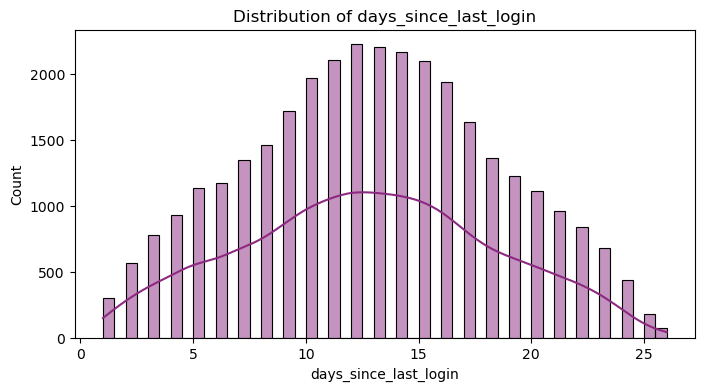

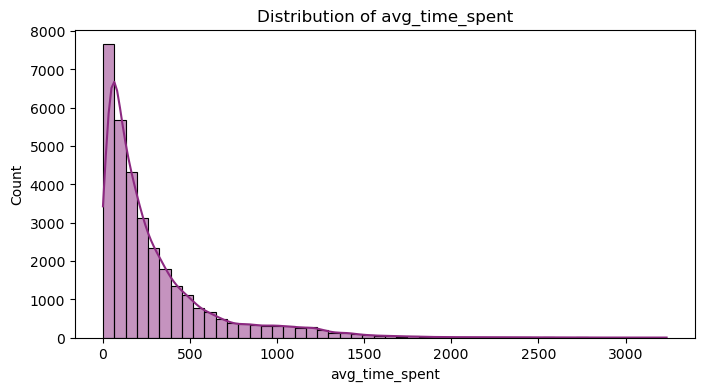

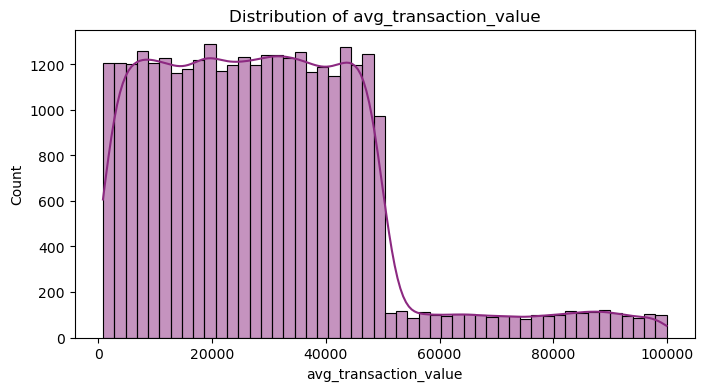

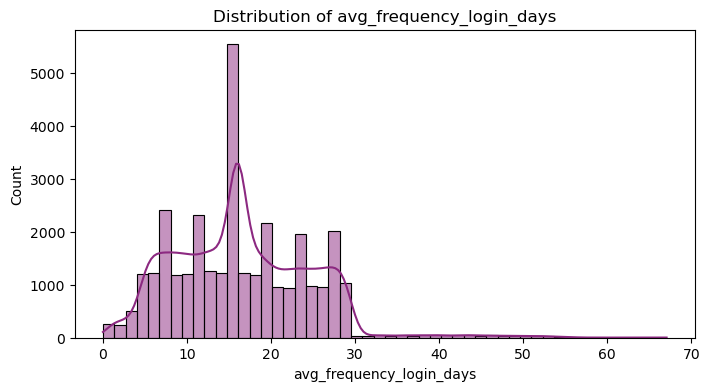

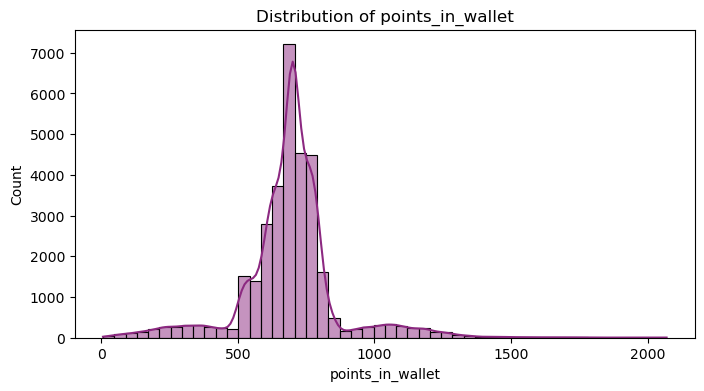

In [111]:
# Create histogram
for col in num_churn_imputed:
    plt.figure(figsize=(8, 4))
    sns.histplot(num_churn_ab[col], bins=50, kde=True, color='#8C2981')
    plt.title(f'Distribution of {col}')
    plt.show()

In [112]:
def detect_outliers_iqr(data):
    """
    Detects outliers in all numerical columns using the IQR method and returns a DataFrame.

    Parameters
    ----------
    data : pandas.DataFrame
        DataFrame containing only numerical features.

    Returns
    -------
    pandas.DataFrame
        DataFrame containing column names, outlier values, and their indices.
    """
    outlier_list = []

    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]

        for idx, value in outliers.items():
            outlier_list.append([col, idx, value])

    outlier = pd.DataFrame(outlier_list, columns=['column', 'index', 'value'])
    return outlier

In [113]:
outliers = detect_outliers_iqr(data = num_churn_ab)
outliers.shape

(8276, 3)

Since there the outliers shares around 25% of the valid datasets (8276 of 32644), to simply drop them might lose some important information. So it might be better to cap them at certain percentiles.

In [115]:
def remove_outliers_percentile(data, columns, lp, up):
    """
    Removes rows containing outliers from specified numerical columns using percentile thresholds.

    Parameters
    ----------
    data : pandas.DataFrame
        The input DataFrame containing numerical columns.
    columns : list of str
        List of column names to apply outlier removal.
    lp : int, optional
        Lower percentile threshold.
    up : int, optional
        Upper percentile threshold.

    Returns
    -------
    pandas.DataFrame
        DataFrame with rows containing outliers removed.
    """
    data_cleaned = data.copy()

    for col in columns:
        if data_cleaned[col].dropna().shape[0] > 0: 
            low = np.percentile(data_cleaned[col].dropna(), lp)
            high = np.percentile(data_cleaned[col].dropna(), up)
            data_cleaned = data_cleaned[(data_cleaned[col] >= low) & (data_cleaned[col] <= high)]
    
    return data_cleaned

In [116]:
#Set percentile
lower = 1
upper = 99

# Columns to process
ch_columns = ['avg_time_spent', 
              'avg_transaction_value', 
              'avg_frequency_login_days', 
              'points_in_wallet']

# Check number of outliers
for col in ch_columns:
    low = np.percentile(num_churn_ab[col], lower)
    high = np.percentile(num_churn_ab[col], upper)
    outliers = num_churn_ab[(num_churn_ab[col] < low) | (num_churn_ab[col] > high)]
    print(f'{col}: {outliers.shape[0]} outliers')

avg_time_spent: 648 outliers
avg_transaction_value: 654 outliers
avg_frequency_login_days: 598 outliers
points_in_wallet: 654 outliers


In [117]:
# Apply outlier removal
num_churn_cleaned = remove_outliers_percentile (data=num_churn_ab,
                                               columns=ch_columns, 
                                               lp=lower, 
                                               up=upper)

print('Data shape before cleaned :', num_churn_ab.shape)
print('Data shape after cleaned  :', num_churn_cleaned.shape)

Data shape before cleaned : (32644, 6)
Data shape after cleaned  : (30178, 6)


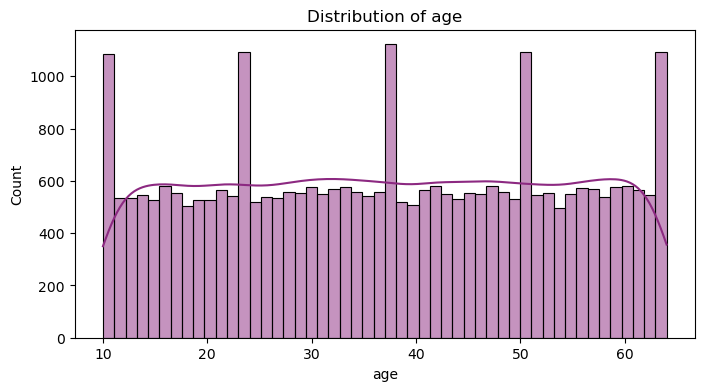

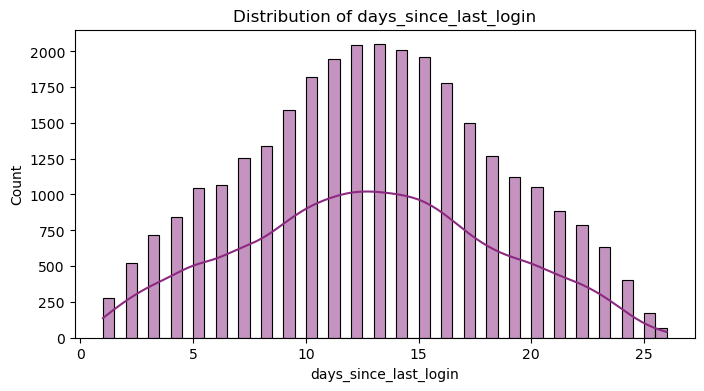

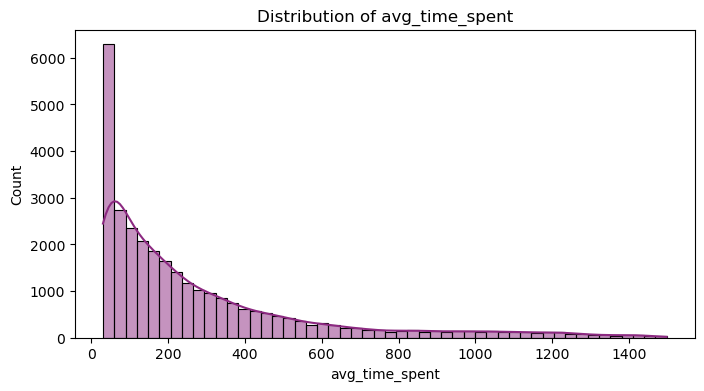

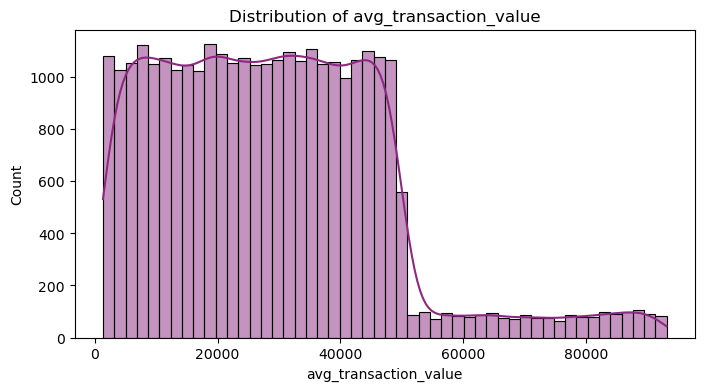

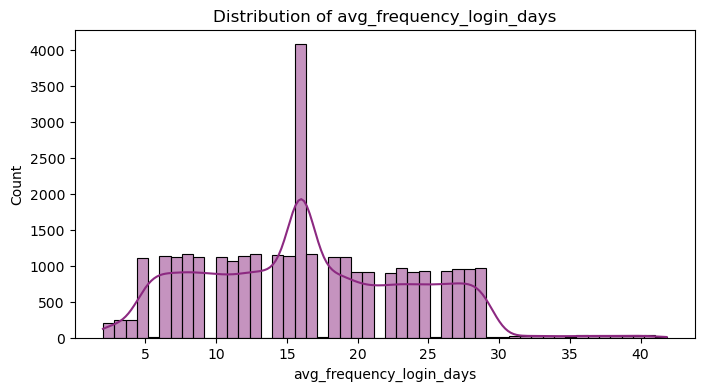

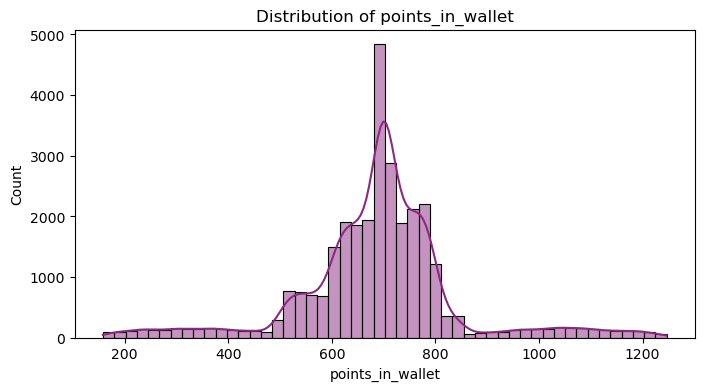

In [118]:
# Create histogram
for col in num_churn_imputed:
    plt.figure(figsize=(8, 4))
    sns.histplot(num_churn_cleaned[col], bins=50, kde=True, color='#8C2981')
    plt.title(f'Distribution of {col}')
    plt.show()

Concat numerical and categorical cleaned data to set a new cleaned dataset. 

In [120]:
# Get the cleaned index after removing outliers
ch_cleaned_index = num_churn_cleaned.index  

# Filter categorical columns using this index
cat_churn_filtered = cat_churn_imputed.loc[ch_cleaned_index]

# Filter churn_risk_score using this index
churn_risk_score_filtered = churn_train.loc[ch_cleaned_index, 'churn_risk_score']

# Filter datetime columns using this index
datetime_filtered = churn_train.loc[ch_cleaned_index, 'joining_date']

# Concatenate cleaned numerical & filtered categorical data
indexed_churn = pd.concat([num_churn_cleaned, cat_churn_filtered, churn_risk_score_filtered, datetime_filtered], axis=1)

In [121]:
print(indexed_churn.shape) 
print(indexed_churn.isnull().sum())

(30178, 20)
age                             0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
medium_of_operation             0
membership_category             0
preferred_offer_types           0
used_special_discount           0
internet_option                 0
region_category                 0
offer_application_preference    0
past_complaint                  0
feedback                        0
complaint_status                0
joined_through_referral         0
gender                          0
churn_risk_score                0
joining_date                    0
dtype: int64


In [122]:
# Check if any negative value exist
indexed_churn.describe()

age  days_since_last_login  avg_time_spent  \
count  30178.000000           30178.000000    30178.000000   
mean      37.118928              12.800451      279.704548   
min       10.000000               1.000000       30.440000   
25%       23.000000               9.000000       72.790000   
50%       37.000000              13.000000      173.660000   
75%       51.000000              17.000000      364.940000   
max       64.000000              26.000000     1498.005934   
std       15.857714               5.563815      295.041293   

       avg_transaction_value  avg_frequency_login_days  points_in_wallet  \
count           30178.000000              30178.000000      30178.000000   
mean            28711.139505                 16.332010        689.406075   
min              1325.190000                  2.000000        158.184988   
25%             14391.765000                 11.000000        626.400000   
50%             27384.810000                 16.000000        697.620000   
75%             40414.787500                 22.000000        754.417500   
max             93153.460000                 41.844195       1246.149720   
std             18074.086884                  7.245313        153.656924   

       churn_risk_score                   joining_date  
count      30178.000000                          30178  
mean           3.486977  2016-07-04 04:14:34.173238784  
min           -1.000000            2015-01-01 00:00:00  
25%            3.000000            2015-10-02 00:00:00  
50%            4.000000            2016-07-06 00:00:00  
75%            5.000000            2017-04-06 00:00:00  
max            5.000000            2017-12-31 00:00:00  
std            1.397020                            NaN

In [123]:
# Verify data shape and missing values
print(indexed_churn.shape)
indexed_churn.head()

(30178, 20)


age  days_since_last_login  \
customer_id                                                        
fffe4300490044003600300030003800       18                     17   
fffe43004900440032003100300035003700   32                     16   
fffe4300490044003100390032003600       44                     14   
fffe43004900440036003000330031003600   37                     11   
fffe43004900440031003900350030003600   31                     20   

                                      avg_time_spent  avg_transaction_value  \
customer_id                                                                   
fffe4300490044003600300030003800              300.63               53005.25   
fffe43004900440032003100300035003700          306.34               12838.38   
fffe4300490044003100390032003600              516.16               21027.00   
fffe43004900440036003000330031003600           53.27               25239.56   
fffe43004900440031003900350030003600          113.13               24483.66   

                                      avg_frequency_login_days  \
customer_id                                                      
fffe4300490044003600300030003800                          17.0   
fffe43004900440032003100300035003700                      10.0   
fffe4300490044003100390032003600                          22.0   
fffe43004900440036003000330031003600                       6.0   
fffe43004900440031003900350030003600                      16.0   

                                      points_in_wallet medium_of_operation  \
customer_id                                                                  
fffe4300490044003600300030003800                781.75             Unknown   
fffe43004900440032003100300035003700            697.62             Desktop   
fffe4300490044003100390032003600                500.69             Desktop   
fffe43004900440036003000330031003600            567.66             Desktop   
fffe43004900440031003900350030003600            663.06          Smartphone   

                                      membership_category  \
customer_id                                                 
fffe4300490044003600300030003800      Platinum Membership   
fffe43004900440032003100300035003700   Premium Membership   
fffe4300490044003100390032003600            No Membership   
fffe43004900440036003000330031003600        No Membership   
fffe43004900440031003900350030003600        No Membership   

                                         preferred_offer_types  \
customer_id                                                      
fffe4300490044003600300030003800         Gift Vouchers/Coupons   
fffe43004900440032003100300035003700     Gift Vouchers/Coupons   
fffe4300490044003100390032003600         Gift Vouchers/Coupons   
fffe43004900440036003000330031003600     Gift Vouchers/Coupons   
fffe43004900440031003900350030003600  Credit/Debit Card Offers   

                                     used_special_discount internet_option  \
customer_id                                                                  
fffe4300490044003600300030003800                       Yes           Wi-Fi   
fffe43004900440032003100300035003700                   Yes     Mobile_Data   
fffe4300490044003100390032003600                        No           Wi-Fi   
fffe43004900440036003000330031003600                    No     Mobile_Data   
fffe43004900440031003900350030003600                    No     Mobile_Data   

                                     region_category  \
customer_id                                            
fffe4300490044003600300030003800             Village   
fffe43004900440032003100300035003700            City   
fffe4300490044003100390032003600                Town   
fffe43004900440036003000330031003600            City   
fffe43004900440031003900350030003600            City   

                                     offer_application_preference  \
customer_id                                                         
fffe430049004400360030003000

Now the `churn_train` data is cleaned and ready for analysis. 

#### **Insights and Summary**

Let’s proceed with numerical analysis to find possible factors affecting high and low churn risk by analyzing analyze how key numerical features vary across different churn risk scores by:
1. Comparing the statistical summary of the numerical features
2. Visualizing the numerical features
3. Visualizing the categorical features
4. Insight and Summary

_**Comparing the statistical summary of the numerical features**_

In [128]:
# Set numerical column
ch_num = num_churn_cleaned.columns

# Grouping numerical features by churn risk score and calculating the mean
churn_summary = indexed_churn.groupby('churn_risk_score')[ch_num].agg(['count','mean', 'std', 'median'])

# Display the result
churn_summary.T

churn_risk_score                           -1             1             2  \
age                      count     956.000000   2002.000000   2040.000000   
                         mean       37.024059     37.563437     36.765686   
                         std        15.815244     15.643940     15.967168   
                         median     37.000000     38.000000     37.000000   
days_since_last_login    count     956.000000   2002.000000   2040.000000   
                         mean       13.023013     12.261239     12.059804   
                         std         5.470290      5.566839      5.587096   
                         median     13.000000     12.000000     12.000000   
avg_time_spent           count     956.000000   2002.000000   2040.000000   
                         mean      285.146459    315.987942    304.085113   
                         std       303.975214    306.014179    302.318552   
                         median    178.595000    215.455000    210.700000   
avg_transaction_value    count     956.000000   2002.000000   2040.000000   
                         mean    27748.204728  48242.089970  47812.002000   
                         std     16905.180105  26878.360936  26502.334144   
                         median  26788.855000  48419.410000  48377.800000   
avg_frequency_login_days count     956.000000   2002.000000   2040.000000   
                         mean       16.866558     11.403843     11.339312   
                         std         7.389215      5.989017      5.807286   
                         median     16.000000     12.000000     12.000000   
points_in_wallet         count     956.000000   2002.000000   2040.000000   
                         mean      690.353767    775.934021    735.532751   
                         std       143.298282    140.425029    140.689478   
                         median    697.620000    792.820000    740.330000   

churn_risk_score                            3             4             5  
age                      count    8688.000000   8420.000000   8072.000000  
                         mean       37.006561     37.169715     37.177156  
                         std        15.956163     15.831270     15.810545  
                         median     37.000000     37.000000     37.000000  
days_since_last_login    count    8688.000000   8420.000000   8072.000000  
                         mean       12.914480     12.896556     12.872027  
                         std         5.602601      5.547353      5.522919  
                         median     13.000000     13.000000     13.000000  
avg_time_spent           count    8688.000000   8420.000000   8072.000000  
                         mean      271.717894    276.665792    275.665424  
                         std       288.891227    297.839837    292.055393  
                         median    168.280000    167.645000    169.255000  
avg_transaction_value    count    8688.000000   8420.000000   8072.000000  
                         mean    25630.127171  26000.651147  25297.362307  
                         std     13976.819213  14107.975150  14024.154702  
                         median  25713.460000  26211.320000  25123.785000  
avg_frequency_login_days count    8688.000000   8420.000000   8072.000000  
                         mean       16.960479     17.186480     17.185021  
                         std         7.108477      7.135455      7.115522  
                         median     16.000000     16.000000     16.000000  
points_in_wallet         count    8688.000000   8420.000000   8072.000000  
                         mean      738.363711    669.901771    623.827399  
                         std       143.932116    147.558539    145.862883  
                         median    743.285000    668.880000    616.200000

_**Visualizing the numerical features**_

Boxplot for identifying differences in distribution

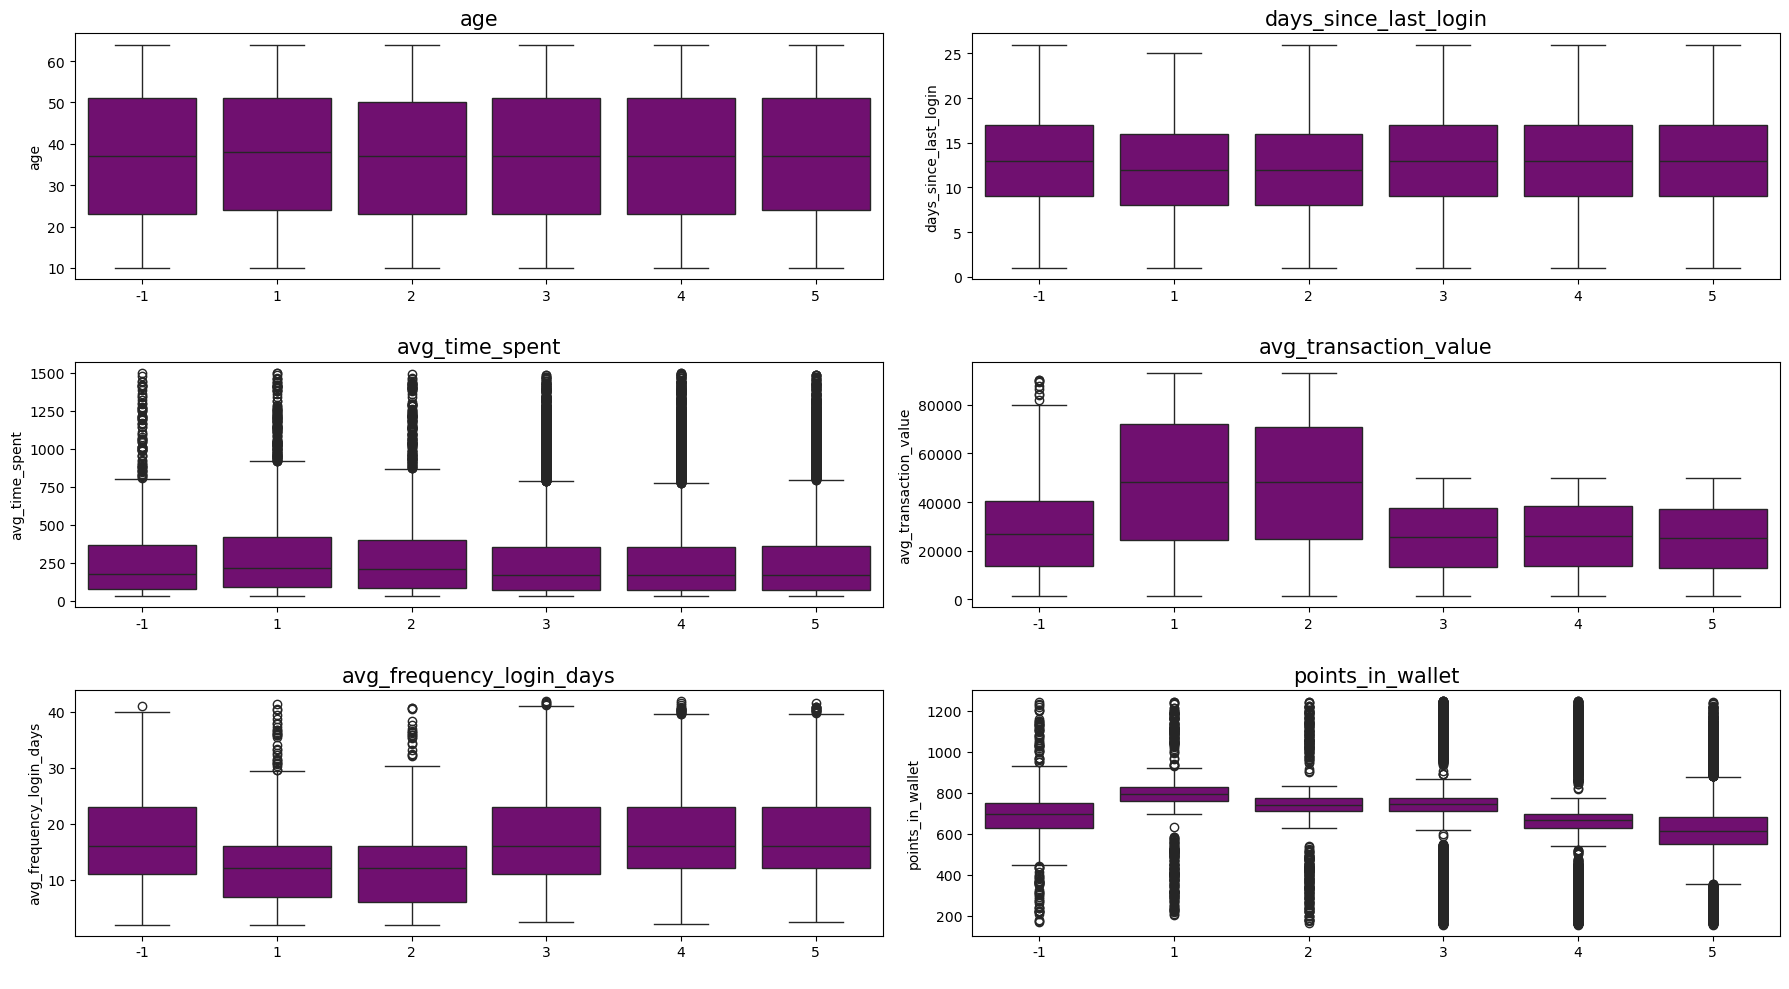

In [131]:
# Create boxplot
plt.figure(figsize=(18,10))
for i in range(0, len(ch_num)):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=indexed_churn, x="churn_risk_score", y=indexed_churn[ch_num[i]], color = 'purple')
    plt.title(ch_num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

KDE distribution plot for checking overlap between churn risk group

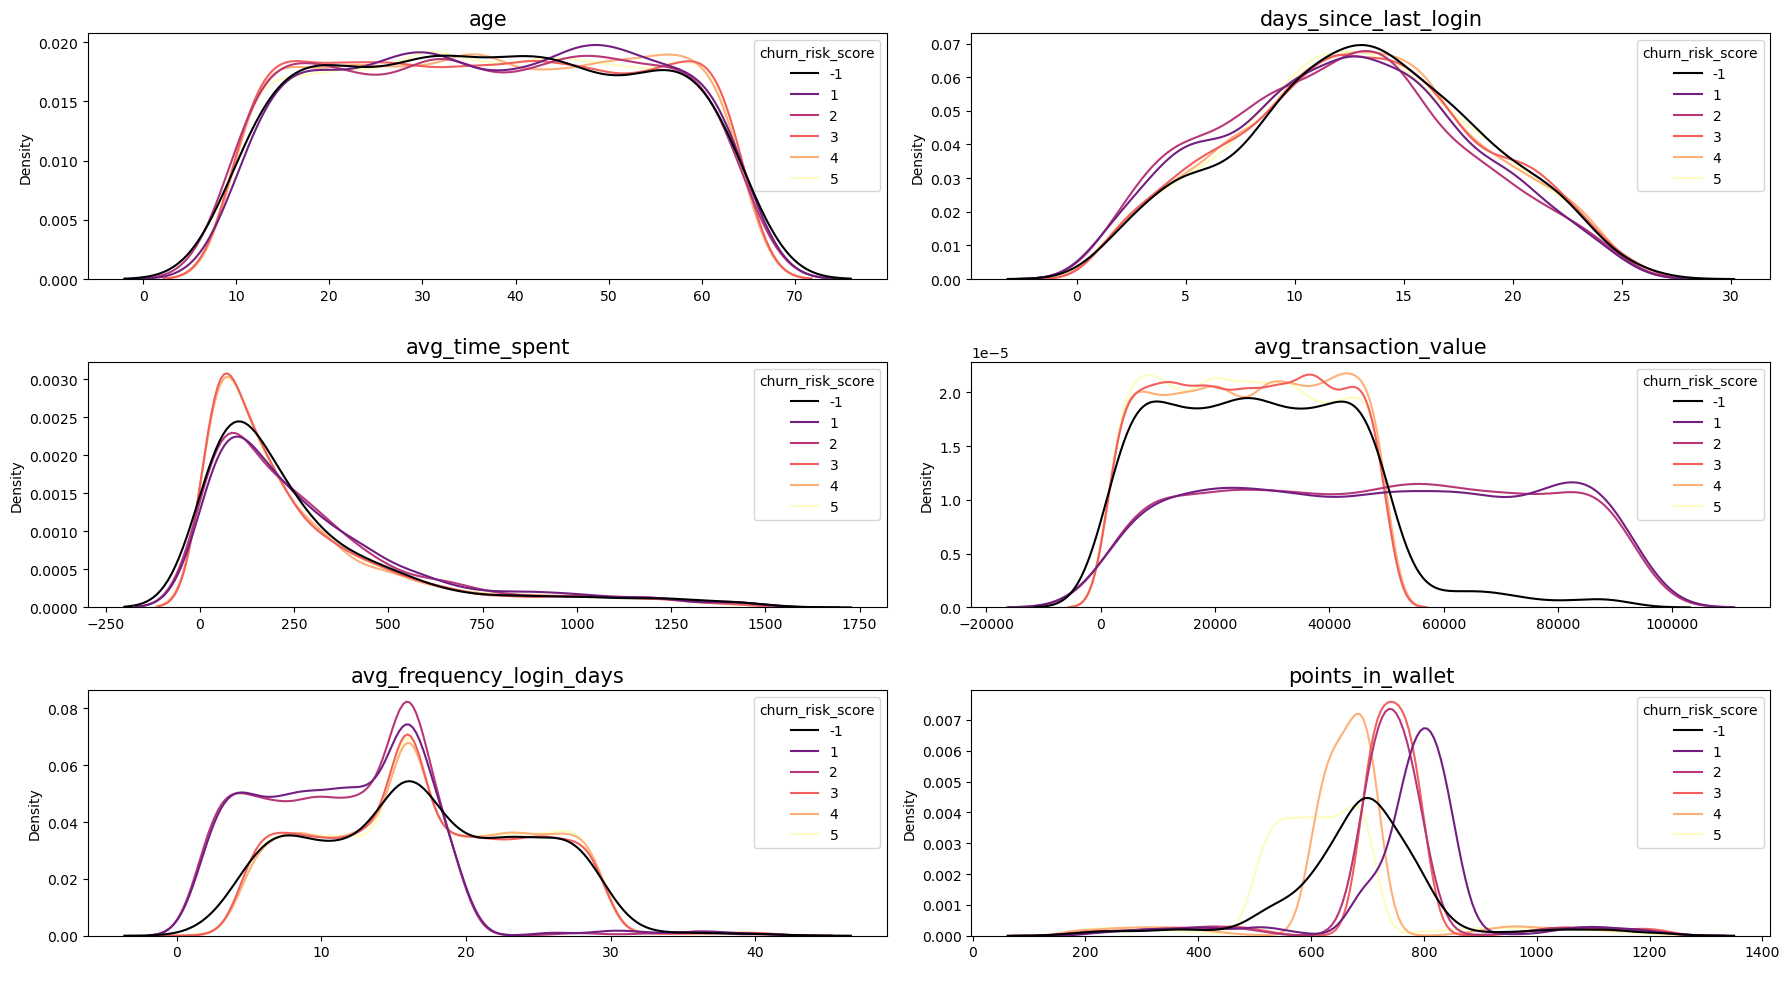

In [133]:
# Create boxplot
plt.figure(figsize=(18,10))
for i in range(0, len(ch_num)):
    plt.subplot(3,2,i+1)
    sns.kdeplot(data=indexed_churn, x=indexed_churn[ch_num[i]], hue='churn_risk_score', palette='magma', common_norm=False)
    plt.title(ch_num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

The KDE plot confirms that, the customer with `churn_risk_score = 1` and `churn_risk_score = 2` has broader `avg_transaction_value` compared to the rest of `the churn_risk_score` and narrower distribution `avg_frequency_login_days` compared to the other `churn_risk_score`. 

Correlation heatmap to find any strong relationship

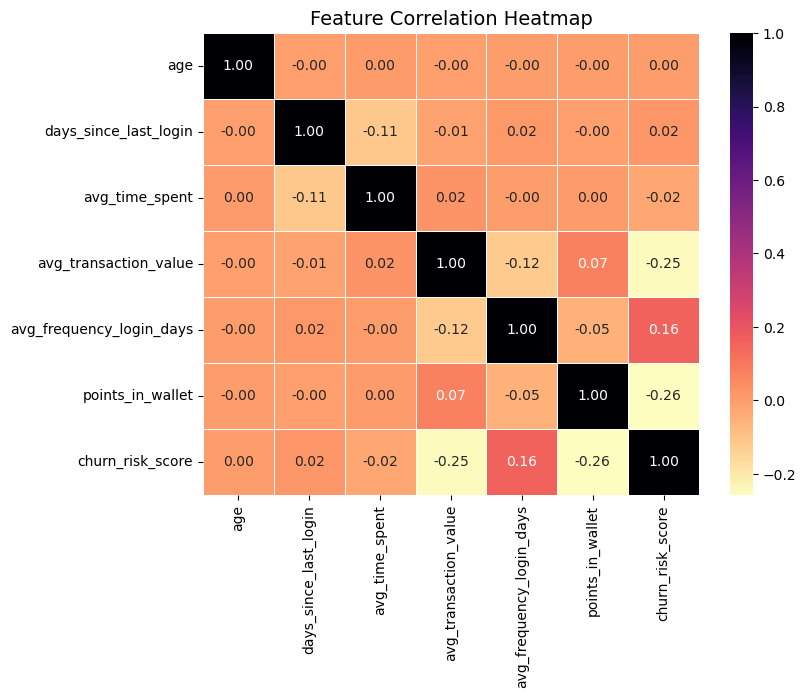

In [136]:
# Compute correlation matrix
plt.figure(figsize=(8, 6))

correlation_matrix = indexed_churn[list(ch_num) + ['churn_risk_score']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='magma_r', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.show()

The map show stronger negative correlation on, `avg_transaction_value` and `points_in_wallet`, both at 0.25, compared to other features. Thyough the correlation value is not high.

_**Visualizing the categorical features**_

Proportion of customer for all categorical features to `churn_risk_score`.

In [140]:
# Data summary
for i, col in enumerate(ch_cat):  
    cat_stack_plot = indexed_churn.groupby(col)['churn_risk_score'].value_counts(normalize=True).unstack()
    display(cat_stack_plot)

churn_risk_score           -1         1         2         3         4  \
medium_of_operation                                                     
Both                 0.036676  0.082765  0.079844  0.281402  0.261279   
Desktop              0.030555  0.072624  0.073598  0.282083  0.279515   
Smartphone           0.031850  0.055365  0.059402  0.296306  0.281302   
Unknown              0.030619  0.067135  0.064867  0.285552  0.284191   

churn_risk_score            5  
medium_of_operation            
Both                 0.258033  
Desktop              0.261624  
Smartphone           0.275774  
Unknown              0.267634

churn_risk_score           -1         1         2         3         4  \
membership_category                                                     
Basic Membership     0.032420       NaN       NaN       NaN  0.337197   
Gold Membership      0.033123  0.113411  0.089469  0.386139  0.377858   
No Membership        0.029884       NaN       NaN       NaN  0.326816   
Platinum Membership  0.031823  0.193521  0.143635  0.631021       NaN   
Premium Membership   0.032713  0.196560  0.141850  0.628878       NaN   
Silver Membership    0.030531       NaN  0.109709  0.429880  0.429880   

churn_risk_score            5  
membership_category            
Basic Membership     0.630384  
Gold Membership           NaN  
No Membership        0.643300  
Platinum Membership       NaN  
Premium Membership        NaN  
Silver Membership         NaN

churn_risk_score                -1         1         2         3         4  \
preferred_offer_types                                                        
Credit/Debit Card Offers  0.033393  0.066687  0.074041  0.283741  0.274995   
Gift Vouchers/Coupons     0.030200  0.085800  0.081900  0.277300  0.265800   
Unknown                   0.038793  0.034483  0.077586  0.284483  0.318966   
Without Offers            0.031263  0.047046  0.046338  0.302914  0.295528   

churn_risk_score                 5  
preferred_offer_types               
Credit/Debit Card Offers  0.267144  
Gift Vouchers/Coupons     0.259000  
Unknown                   0.245690  
Without Offers            0.276912

churn_risk_score             -1         1         2         3         4  \
used_special_discount                                                     
No                     0.032641  0.065503  0.065356  0.284530  0.283210   
Yes                    0.030885  0.067029  0.069447  0.290662  0.275552   

churn_risk_score              5  
used_special_discount            
No                     0.268760  
Yes                    0.266425

churn_risk_score        -1         1         2         3         4         5
internet_option                                                             
Fiber_Optic       0.030035  0.068921  0.065937  0.281253  0.285032  0.268821
Mobile_Data       0.031475  0.066447  0.068046  0.285671  0.276878  0.271483
Wi-Fi             0.033515  0.063668  0.068809  0.296688  0.275136  0.262185

churn_risk_score        -1         1         2         3         4         5
region_category                                                             
City              0.032864  0.062741  0.061874  0.286816  0.284985  0.270721
Town              0.030206  0.063276  0.064231  0.296589  0.277840  0.267859
Unknown           0.031075  0.065951  0.070646  0.285491  0.276995  0.269841
Village           0.033613  0.085872  0.089811  0.267332  0.268645  0.254727

churn_risk_score                    -1         1         2         3  \
offer_application_preference                                           
No                            0.030970  0.056235  0.058606  0.296288   
Yes                           0.032252  0.074516  0.074876  0.281098   

churn_risk_score                     4         5  
offer_application_preference                      
No                            0.283544  0.274357  
Yes                           0.275343  0.261915

churn_risk_score        -1        1         2         3         4         5
past_complaint                                                             
No                0.032322  0.06911  0.070424  0.285442  0.275522  0.267179
Yes               0.031024  0.06352  0.064723  0.290385  0.282562  0.267786

churn_risk_score                -1         1         2         3         4  \
feedback                                                                     
No reason specified       0.034834       NaN       NaN  0.333911  0.320439   
Poor Customer Service     0.030227       NaN       NaN  0.331719  0.327843   
Poor Product Quality      0.031665       NaN       NaN  0.322715  0.332196   
Poor Website              0.034893       NaN       NaN  0.333781  0.325537   
Products always in Stock  0.027992  0.499035  0.472973       NaN       NaN   
Quality Customer Care     0.030244  0.455610  0.514146       NaN       NaN   
Reasonable Price          0.023946  0.500958  0.475096       NaN       NaN   
Too many ads              0.029582       NaN       NaN  0.347641  0.311872   
User Friendly Website     0.030361  0.469639  0.500000       NaN       NaN   

churn_risk_score                 5  
feedback                            
No reason specified       0.310816  
Poor Customer Service     0.310211  
Poor Product Quality      0.313424  
Poor Website              0.305790  
Products always in Stock       NaN  
Quality Customer Care          NaN  
Reasonable Price               NaN  
Too many ads              0.310905  
User Friendly Website          NaN

churn_risk_score           -1         1         2         3         4  \
complaint_status                                                        
Not Applicable       0.032322  0.069110  0.070424  0.285442  0.275522   
Solved               0.033791  0.060454  0.064942  0.284319  0.276135   
Solved in Follow-up  0.028525  0.059203  0.064855  0.289559  0.294403   
Unknown              0.031625  0.065976  0.062704  0.287623  0.291712   
Unsolved             0.030127  0.068446  0.066332  0.299947  0.268499   

churn_risk_score            5  
complaint_status               
Not Applicable       0.267179  
Solved               0.280359  
Solved in Follow-up  0.263455  
Unknown              0.260360  
Unsolved             0.266649

churn_risk_score               -1         1         2        3         4  \
joined_through_referral                                                    
No                       0.030242  0.079000  0.078306  0.28221  0.269017   
Unknown                  0.027289  0.062697  0.063148  0.29364  0.285070   
Yes                      0.034658  0.054765  0.058285  0.29166  0.287044   

churn_risk_score                5  
joined_through_referral            
No                       0.261225  
Unknown                  0.268155  
Yes                      0.273588

churn_risk_score        -1         1         2         3         4         5
gender                                                                      
F                 0.032444  0.066142  0.067794  0.284987  0.279371  0.269261
M                 0.030869  0.066538  0.067471  0.290619  0.278952  0.265551
Unknown           0.044444  0.066667  0.044444  0.355556  0.177778  0.311111

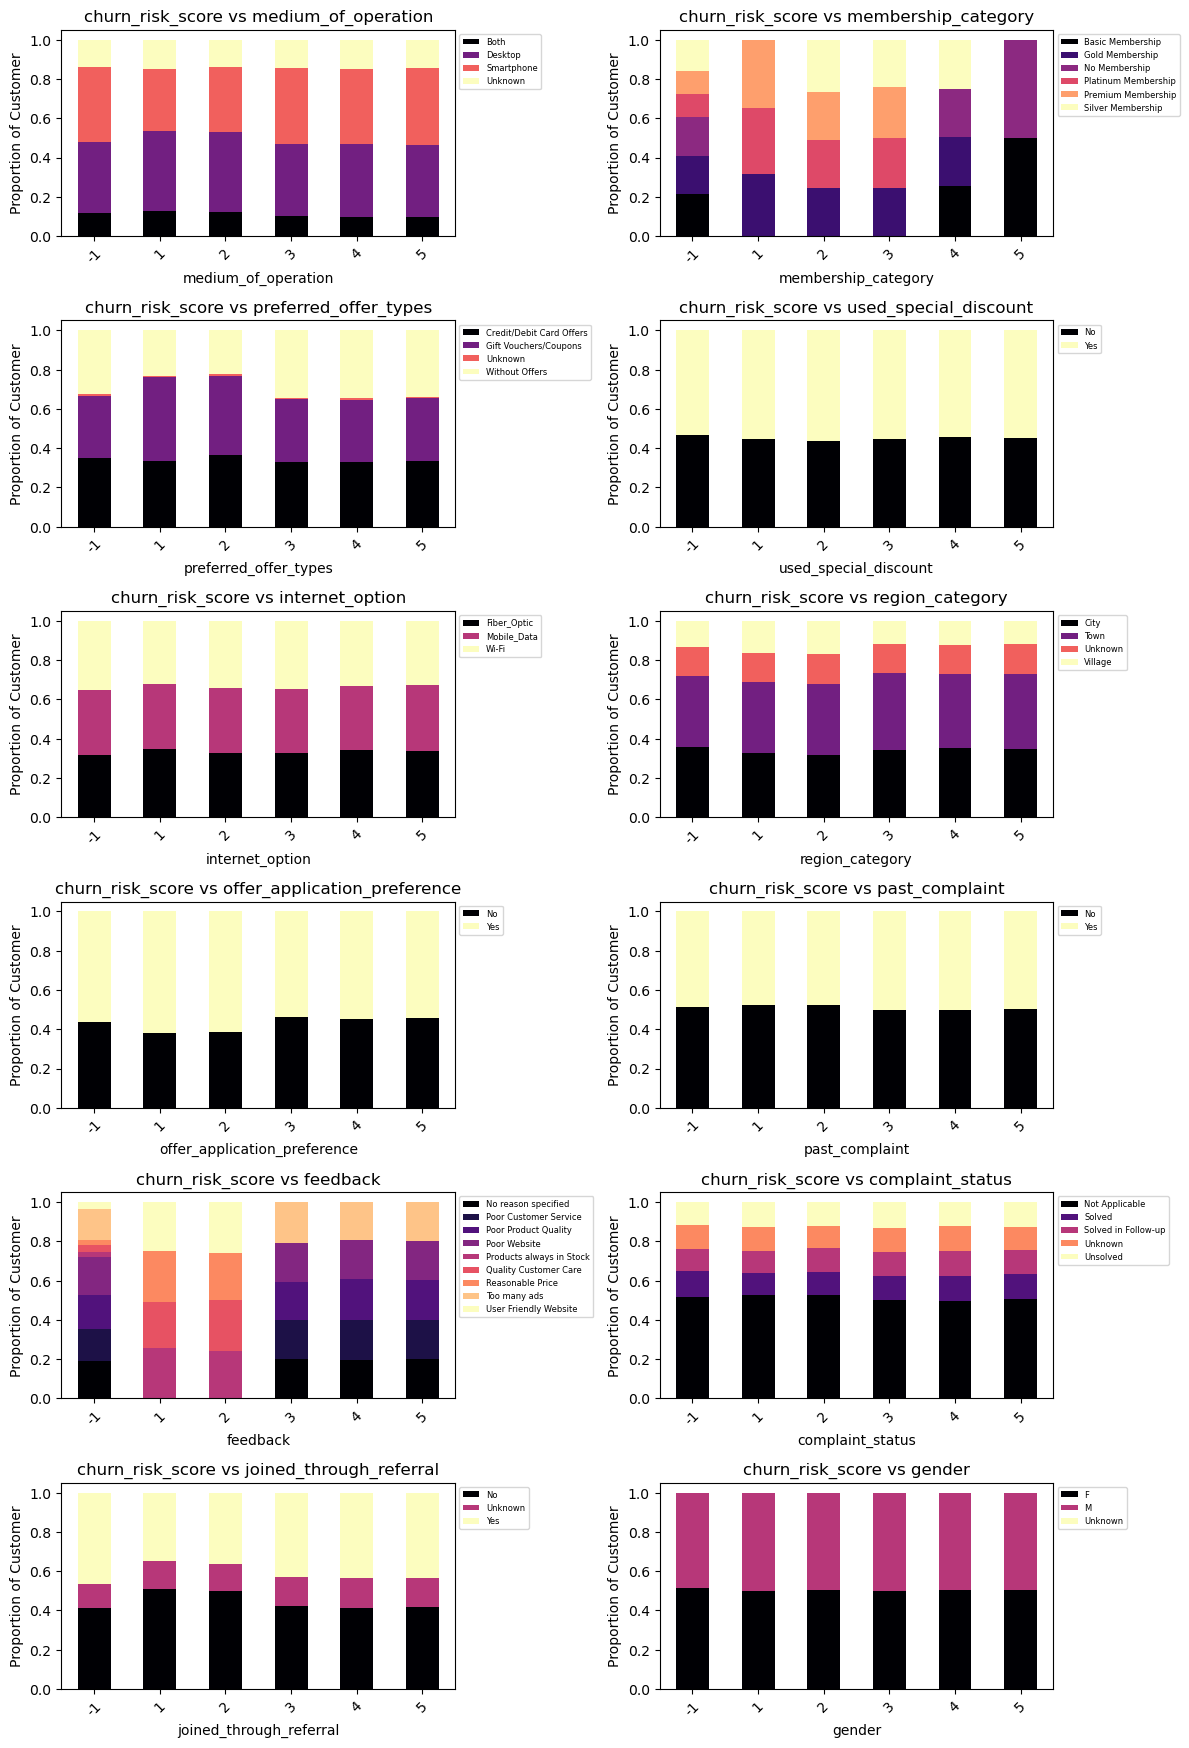

In [141]:
# Create stacked bar chart

plt.figure(figsize=(12, 20))

for i, col in enumerate(ch_cat):  
    plt.subplot(len(ch_cat)//2 + 1, 2, i + 1)

    cat_stack_plot = indexed_churn.groupby('churn_risk_score')[col].value_counts(normalize=True).unstack()
    cat_stack_plot.plot(kind='bar', stacked=True, cmap='magma', ax=plt.gca()) 

    plt.title(f'churn_risk_score vs {col}')
    plt.xlabel(col)
    plt.ylabel('Proportion of Customer')
    plt.xticks(rotation=45)
    plt.legend(fontsize=6, title_fontsize=8, bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

_**Insight and Summary**_

**Numerical Analysis Key Takeaways**
- Boxplot shows that he customer with `churn_risk_score = 1` and `churn_risk_score = 2` has higher `avg_transaction_value` compared to the rest of the score while having lower `avg_frequency_of_login_days`, meaning they purchase but engage less.
- KDE plot confirms that `churn_risk_score = 1 & 2` has broader distribution for `avg_transaction_value` (varied spending habits) compared to narrower distribution for avg_frequency_login_days (less frequent logins).
- Correlation heatmap shows that `avg_transaction_value` and `points_in_wallet` negatively correlated (-0.25) with churn risk. Suggests that higher spending and wallet points are lower churn risk.

**Categorical Analysis Key Takeaways**
- `Premium` & `Platinum` members tend to have a higher proportion in `churn_risk_score = 1 & 2` (low churn risk). `Basic` & `No Membership` customers are more concentrated in `churn_risk_score = 4 & 5` (high churn risk). Silver and Gold are well distributed through all the churn score.
- Customers giving positive feedback have lower churn risk (`churn_risk_score = 1 & 2`). Customers giving negative feedback are concentrated in `churn_risk_score = 3, 4, 5.`
- Villages have a higher proportion of customers with `churn_risk_score = 1 & 2` compared to other region while higher churn risk has least region village customer, although the difference is insignificant.
- Smartphone users have slightly higher churn risk (`churn_risk_score = 4 & 5`). Desktop users are more evenly distributed.
- Customers who joined via referral have lower churn risk (`churn_risk_score = 1 & 2`). Non-referred customers have a higher proportion in `churn_risk_score = 4 & 5`.

#### **3. Negative Feedback Analysis**

The key takeaways from the previous analysis are:
- Customers who have high `days_since_last_login` indicates that they have not logged in for a long time, suggesting they are at higher churn. This is probably due to dissatisfaction with the website or products.
- Low `avg_time_spent` strongly suggests higher churn risk. Users may leave quickly due to poor user experience, unclear product offerings, or lack of engaging content.
- Higher `avg_frequency_login_days` means users who log in less frequently; tends to have higher churn risk. This suggests they are not finding enough value to return regularly.

Analyzing the `feedback` column from the high churn risk customer tells their reasons of dissatisfaction:
- `Poor Customer Service`
- `Poor Product Quality`
- `Poor Website`
- `Too Many Ads`

Above factors might conclude he cause of negative feedback:
- `Poor Website` is related to to lower engagement, as users spend less time on the platform and `log in less frequently`.
- `Too Many Ads`  may indicate distractions or frustration, causing users to `leave quickly and visit less often`.
- `Poor Website` may cause users to disengage over time, as seen in their `longer duration since the last login`.

---

##  **<font color='blue'>Task 3: Descriptive Analysis: Edutech Leads Data</font>**

### **1. Potential Leads Analysis**

#### **Data Preparation**

Before analyzing for further insights and summary, the data need to be assessed and cleaned if necessary. The data used for the analysis process is `train.csv`. The data preparation process is done with these following steps:
1. **Data validation** <br>
Data assessment and validation

2. **Exploratory Data Analysis** <br>
Descriptive Analysis, Univariate Analysis, and Correlation Analysis

3. **Data Pre-proccesing** <br>
Handling data abnormalities, missing values, and outliers

_**Data Validation**_

In [152]:
# Display column
print(leads_edu.shape)
leads_edu.head()

(9240, 36)


Lead Number              Lead Origin  \
Prospect ID                                                                  
7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

                                         Lead Source Do Not Email Do Not Call  \
Prospect ID                                                                     
7927b2df-8bba-4d29-b9a2-b6e0beafe620      Olark Chat           No          No   
2a272436-5132-4136-86fa-dcc88c88f482  Organic Search           No          No   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Direct Traffic           No          No   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Direct Traffic           No          No   
3256f628-e534-4826-9d63-4a8b88782852          Google           No          No   

                                      Converted  TotalVisits  \
Prospect ID                                                    
7927b2df-8bba-4d29-b9a2-b6e0beafe620          0          0.0   
2a272436-5132-4136-86fa-dcc88c88f482          0          5.0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a          1          2.0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc          0          1.0   
3256f628-e534-4826-9d63-4a8b88782852          1          2.0   

                                      Total Time Spent on Website  \
Prospect ID                                                         
7927b2df-8bba-4d29-b9a2-b6e0beafe620                            0   
2a272436-5132-4136-86fa-dcc88c88f482                          674   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                         1532   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                          305   
3256f628-e534-4826-9d63-4a8b88782852                         1428   

                                      Page Views Per Visit  \
Prospect ID                                                  
7927b2df-8bba-4d29-b9a2-b6e0beafe620                   0.0   
2a272436-5132-4136-86fa-dcc88c88f482                   2.5   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                   2.0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                   1.0   
3256f628-e534-4826-9d63-4a8b88782852                   1.0   

                                                Last Activity Country  \
Prospect ID                                                             
7927b2df-8bba-4d29-b9a2-b6e0beafe620  Page Visited on Website     NaN   
2a272436-5132-4136-86fa-dcc88c88f482             Email Opened   India   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a             Email Opened   India   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc              Unreachable   India   
3256f628-e534-4826-9d63-4a8b88782852        Converted to Lead   India   

                                               Specialization  \
Prospect ID                                                     
7927b2df-8bba-4d29-b9a2-b6e0beafe620                   Select   
2a272436-5132-4136-86fa-dcc88c88f482                   Select   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Business Administration   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc    Media and Advertising   
3256f628-e534-4826-9d63-4a8b88782852                   Select   

                                     How did you hear about X Education  \
Prospect ID                                                               
7927b2df-8bba-4d29-b9a2-b6e0beafe620                             Select   
2a272436-5132-4136-86fa-dcc88c88f482                             Select   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                             Select   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                      Word Of Mouth   
3256f628-e534-4826-9d63-4a8b88782852                              Other   

                                     What is your current occ

In [153]:
# Display column data type
leads_edu.dtypes

Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article              

All data types are appropriate to the features, so there is no need to convert any datatype. 

In [155]:
edu_null_count = leads_edu.isna().sum()
edu_null_percent = leads_edu.isna().sum() / len(leads_edu)
edu_null = pd.DataFrame({'null_count': edu_null_count, 'null_percent':edu_null_percent})
edu_null.sort_values(by = 'null_count', ascending = False)

null_count  null_percent
Lead Quality                                         4767      0.515909
Asymmetrique Activity Index                          4218      0.456494
Asymmetrique Profile Index                           4218      0.456494
Asymmetrique Profile Score                           4218      0.456494
Asymmetrique Activity Score                          4218      0.456494
Tags                                                 3353      0.362879
Lead Profile                                         2709      0.293182
What matters most to you in choosing a course        2709      0.293182
What is your current occupation                      2690      0.291126
Country                                              2461      0.266342
How did you hear about X Education                   2207      0.238853
Specialization                                       1438      0.155628
City                                                 1420      0.153680
Page Views Per Visit                                  137      0.014827
TotalVisits                                           137      0.014827
Last Activity                                         103      0.011147
Lead Source                                            36      0.003896
I agree to pay the amount through cheque                0      0.000000
A free copy of Mastering The Interview                  0      0.000000
Get updates on DM Content                               0      0.000000
Update me on Supply Chain Content                       0      0.000000
Lead Number                                             0      0.000000
X Education Forums                                      0      0.000000
Receive More Updates About Our Courses                  0      0.000000
Through Recommendations                                 0      0.000000
Digital Advertisement                                   0      0.000000
Newspaper                                               0      0.000000
Lead Origin                                             0      0.000000
Newspaper Article                                       0      0.000000
Magazine                                                0      0.000000
Search                                                  0      0.000000
Total Time Spent on Website                             0      0.000000
Converted                                               0      0.000000
Do Not Call                                             0      0.000000
Do Not Email                                            0      0.000000
Last Notable Activity                                   0      0.000000

Too missing value in several features so some columns might need to be drop to prevent bias.

In [157]:
leads_edu.nunique().sort_values(ascending = False)

Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     19
Last Activity                                      17
Last Notable Activity                              16
Asymmetrique Activity Score                        12
How did you hear about X Education                 10
Asymmetrique Profile Score                         10
City                                                7
What is your current occupation                     6
Lead Profile                                        6
Lead Quality                                        5
Lead Origin                                         5
What matters most to you in 

_**Drop irrelevant Column**_

High missing values percentage might bias the machine learning process. Some also can be irrelevant for modeling due to redundancy. Any single unique value with zero missing value are also uninformative due to low variance. Hence, the following features will be dropped:
- `Update me on Supply Chain Content`
- `Get updates on DM Content`
- `Receive More Updates About Our Courses`
- `Magazine`
- `I agree to pay the amount through cheque`
- `Lead Quality`
- `Asymmetrique Activity Index`
- `Asymmetrique Profile Index`
- `Asymmetrique Profile Score`
- `Asymmetrique Activity Score`
- 'Lead Number'

In [160]:
drop_cols = ['Update me on Supply Chain Content', 
             'Get updates on DM Content', 
             'Receive More Updates About Our Courses', 'Magazine',
             'I agree to pay the amount through cheque',
             'Lead Quality',
             'Asymmetrique Activity Index',
             'Asymmetrique Profile Index',
             'Asymmetrique Profile Score',
             'Lead Number',
             'Asymmetrique Activity Score']

leads_df = leads_edu.copy()

leads_df.drop(columns=drop_cols, inplace=True)

print(leads_df.shape)
leads_df.head()

(9240, 25)


Lead Origin     Lead Source  \
Prospect ID                                                                     
7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API      Olark Chat   
2a272436-5132-4136-86fa-dcc88c88f482                      API  Organic Search   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission  Direct Traffic   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission  Direct Traffic   
3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission          Google   

                                     Do Not Email Do Not Call  Converted  \
Prospect ID                                                                
7927b2df-8bba-4d29-b9a2-b6e0beafe620           No          No          0   
2a272436-5132-4136-86fa-dcc88c88f482           No          No          0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a           No          No          1   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc           No          No          0   
3256f628-e534-4826-9d63-4a8b88782852           No          No          1   

                                      TotalVisits  \
Prospect ID                                         
7927b2df-8bba-4d29-b9a2-b6e0beafe620          0.0   
2a272436-5132-4136-86fa-dcc88c88f482          5.0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a          2.0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc          1.0   
3256f628-e534-4826-9d63-4a8b88782852          2.0   

                                      Total Time Spent on Website  \
Prospect ID                                                         
7927b2df-8bba-4d29-b9a2-b6e0beafe620                            0   
2a272436-5132-4136-86fa-dcc88c88f482                          674   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                         1532   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                          305   
3256f628-e534-4826-9d63-4a8b88782852                         1428   

                                      Page Views Per Visit  \
Prospect ID                                                  
7927b2df-8bba-4d29-b9a2-b6e0beafe620                   0.0   
2a272436-5132-4136-86fa-dcc88c88f482                   2.5   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                   2.0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                   1.0   
3256f628-e534-4826-9d63-4a8b88782852                   1.0   

                                                Last Activity Country  \
Prospect ID                                                             
7927b2df-8bba-4d29-b9a2-b6e0beafe620  Page Visited on Website     NaN   
2a272436-5132-4136-86fa-dcc88c88f482             Email Opened   India   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a             Email Opened   India   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc              Unreachable   India   
3256f628-e534-4826-9d63-4a8b88782852        Converted to Lead   India   

                                               Specialization  \
Prospect ID                                                     
7927b2df-8bba-4d29-b9a2-b6e0beafe620                   Select   
2a272436-5132-4136-86fa-dcc88c88f482                   Select   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Business Administration   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc    Media and Advertising   
3256f628-e534-4826-9d63-4a8b88782852                   Select   

                                     How did you hear about X Education  \
Prospect ID                                                               
7927b2df-8bba-4d29-b9a2-b6e0beafe620                             Select   
2a272436-5132-4136-86fa-dcc88c88f482                             Select   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                             Select   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                      Word Of Mouth   
3256f628-e534-4826-9d63-4a8b88782852                              Other   

                                     What is your current occupation  \
Prospect ID                                                            
7927b2df-8bba-4d29-b

**Explanatory Data Analysis**

_**Numerical Features**_

Split numerical features

In [164]:
# Define numerical column for leads 
numerical_leads = ['TotalVisits', 
                   'Total Time Spent on Website',
                   'Page Views Per Visit']

# Differentiate numerical dataframe
num_leads = get_numerical_features(data = leads_df, 
                                  numerical_column = numerical_leads)


# Check numerical data
num_leads.head()


TotalVisits  \
Prospect ID                                         
7927b2df-8bba-4d29-b9a2-b6e0beafe620          0.0   
2a272436-5132-4136-86fa-dcc88c88f482          5.0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a          2.0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc          1.0   
3256f628-e534-4826-9d63-4a8b88782852          2.0   

                                      Total Time Spent on Website  \
Prospect ID                                                         
7927b2df-8bba-4d29-b9a2-b6e0beafe620                            0   
2a272436-5132-4136-86fa-dcc88c88f482                          674   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                         1532   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                          305   
3256f628-e534-4826-9d63-4a8b88782852                         1428   

                                      Page Views Per Visit  
Prospect ID                                                 
7927b2df-8bba-4d29-b9a2-b6e0beafe620                   0.0  
2a272436-5132-4136-86fa-dcc88c88f482                   2.5  
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                   2.0  
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                   1.0  
3256f628-e534-4826-9d63-4a8b88782852                   1.0

In [165]:
# check numerical columns
print(f'Numerical features : \n{list(num_leads)}')

Numerical features : 
['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


In [166]:
# List numerical column
ld_num = list(num_leads.columns)

check data distributions and outliers

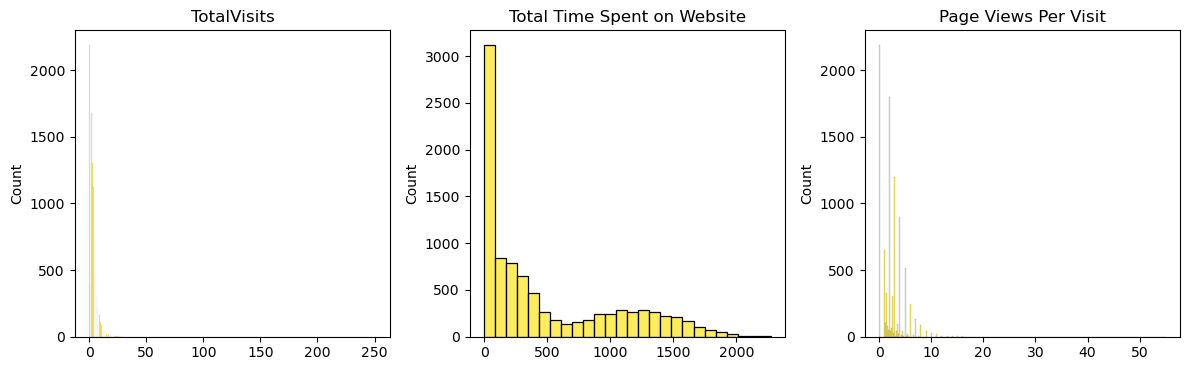

In [168]:
# Create histplot
plt.figure(figsize=(12,4))
for i in range(0, len(ld_num)):
    plt.subplot(1,3,i+1)
    sns.histplot(x=leads_df[ld_num[i]], color='#FDE725')
    plt.title(ld_num[i])
    plt.xlabel(' ')
    plt.tight_layout()


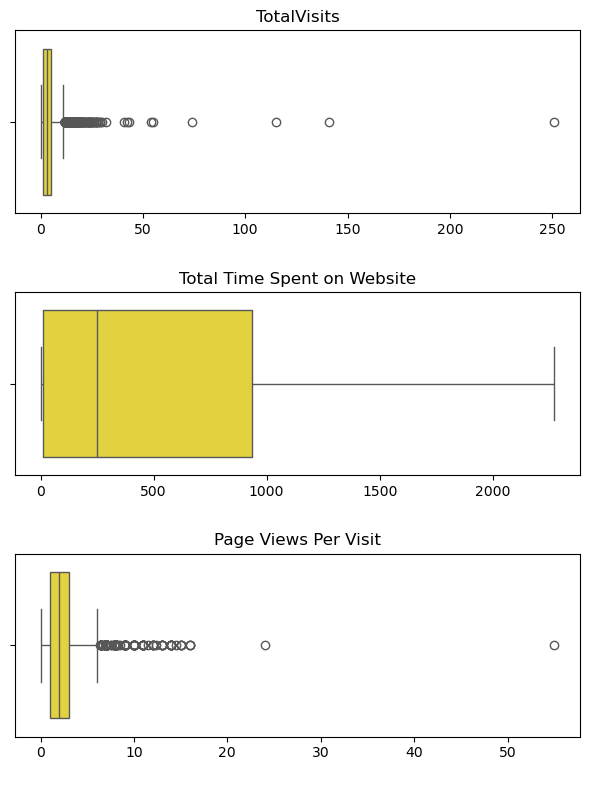

In [169]:
# Create boxplot
plt.figure(figsize=(6,8))
for i in range(0, len(ld_num)):
    plt.subplot(3,1,i+1)
    sns.boxplot(x=leads_df[ld_num[i]], color='#FDE725')
    plt.title(ld_num[i])
    plt.xlabel(' ')
    plt.tight_layout()

Both graphs indicates that all numerical features in leads dataset are skewed and have outliers. 

_**Categorical Features**_

Split categorical data

In [173]:
# Set target variable to drop
ld_y_column = ['Converted']
ld_exception = []
numerical_leads = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Get categorical column names
categorical_leads = get_categorical_columns(data = leads_df,
                                              y_column = ld_y_column,
                                              exception_column = ld_exception,
                                              numerical_column = numerical_leads
                                              )

# Extract categorical data
cat_leads = extract_categorical_data(data = leads_df, 
                                    categorical_column = categorical_leads)

# Display first few rows of categorical data
print(cat_leads.shape)
cat_leads.head()


(9240, 21)


Lead Source  \
Prospect ID                                            
7927b2df-8bba-4d29-b9a2-b6e0beafe620      Olark Chat   
2a272436-5132-4136-86fa-dcc88c88f482  Organic Search   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Direct Traffic   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Direct Traffic   
3256f628-e534-4826-9d63-4a8b88782852          Google   

                                     What matters most to you in choosing a course  \
Prospect ID                                                                          
7927b2df-8bba-4d29-b9a2-b6e0beafe620                       Better Career Prospects   
2a272436-5132-4136-86fa-dcc88c88f482                       Better Career Prospects   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                       Better Career Prospects   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                       Better Career Prospects   
3256f628-e534-4826-9d63-4a8b88782852                       Better Career Prospects   

                                               Specialization    Lead Profile  \
Prospect ID                                                                     
7927b2df-8bba-4d29-b9a2-b6e0beafe620                   Select          Select   
2a272436-5132-4136-86fa-dcc88c88f482                   Select          Select   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Business Administration  Potential Lead   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc    Media and Advertising          Select   
3256f628-e534-4826-9d63-4a8b88782852                   Select          Select   

                                     Search    City Country  \
Prospect ID                                                   
7927b2df-8bba-4d29-b9a2-b6e0beafe620     No  Select     NaN   
2a272436-5132-4136-86fa-dcc88c88f482     No  Select   India   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a     No  Mumbai   India   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc     No  Mumbai   India   
3256f628-e534-4826-9d63-4a8b88782852     No  Mumbai   India   

                                     Last Notable Activity Do Not Email  \
Prospect ID                                                               
7927b2df-8bba-4d29-b9a2-b6e0beafe620              Modified           No   
2a272436-5132-4136-86fa-dcc88c88f482          Email Opened           No   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a          Email Opened           No   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc              Modified           No   
3256f628-e534-4826-9d63-4a8b88782852              Modified           No   

                                     Newspaper  \
Prospect ID                                      
7927b2df-8bba-4d29-b9a2-b6e0beafe620        No   
2a272436-5132-4136-86fa-dcc88c88f482        No   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a        No   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc        No   
3256f628-e534-4826-9d63-4a8b88782852        No   

                                     A free copy of Mastering The Interview  \
Prospect ID                                                                   
7927b2df-8bba-4d29-b9a2-b6e0beafe620                                     No   
2a272436-5132-4136-86fa-dcc88c88f482                                     No   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                                    Yes   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                                     No   
3256f628-e534-4826-9d63-4a8b88782852                                     No   

                                     Digital Advertisement  \
Prospect ID                                                  
7927b2df-8bba-4d29-b9a2-b6e0beafe620                    No   
2a272436-5132-4136-86fa-dcc88c88f482                    No   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                    No   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                    No   
3256f628-e534-4826-9d63-4a8b88782852                    No   

                                                                     Tags  \
Prospect ID                                                                 
7927b2df-8bba-4

Categorical data distribution

In [175]:
# check categorical columns
print(f'Categorical features : \n{list(cat_leads)}')

Categorical features : 
['Lead Source', 'What matters most to you in choosing a course', 'Specialization', 'Lead Profile', 'Search', 'City', 'Country', 'Last Notable Activity', 'Do Not Email', 'Newspaper', 'A free copy of Mastering The Interview', 'Digital Advertisement', 'Tags', 'Lead Origin', 'What is your current occupation', 'Newspaper Article', 'Last Activity', 'Do Not Call', 'Through Recommendations', 'How did you hear about X Education', 'X Education Forums']


In [176]:
# List categorical column
ld_cat = list(cat_leads.columns)

print(f'Number Categorical features : {len(ld_cat)}')

Number Categorical features : 21


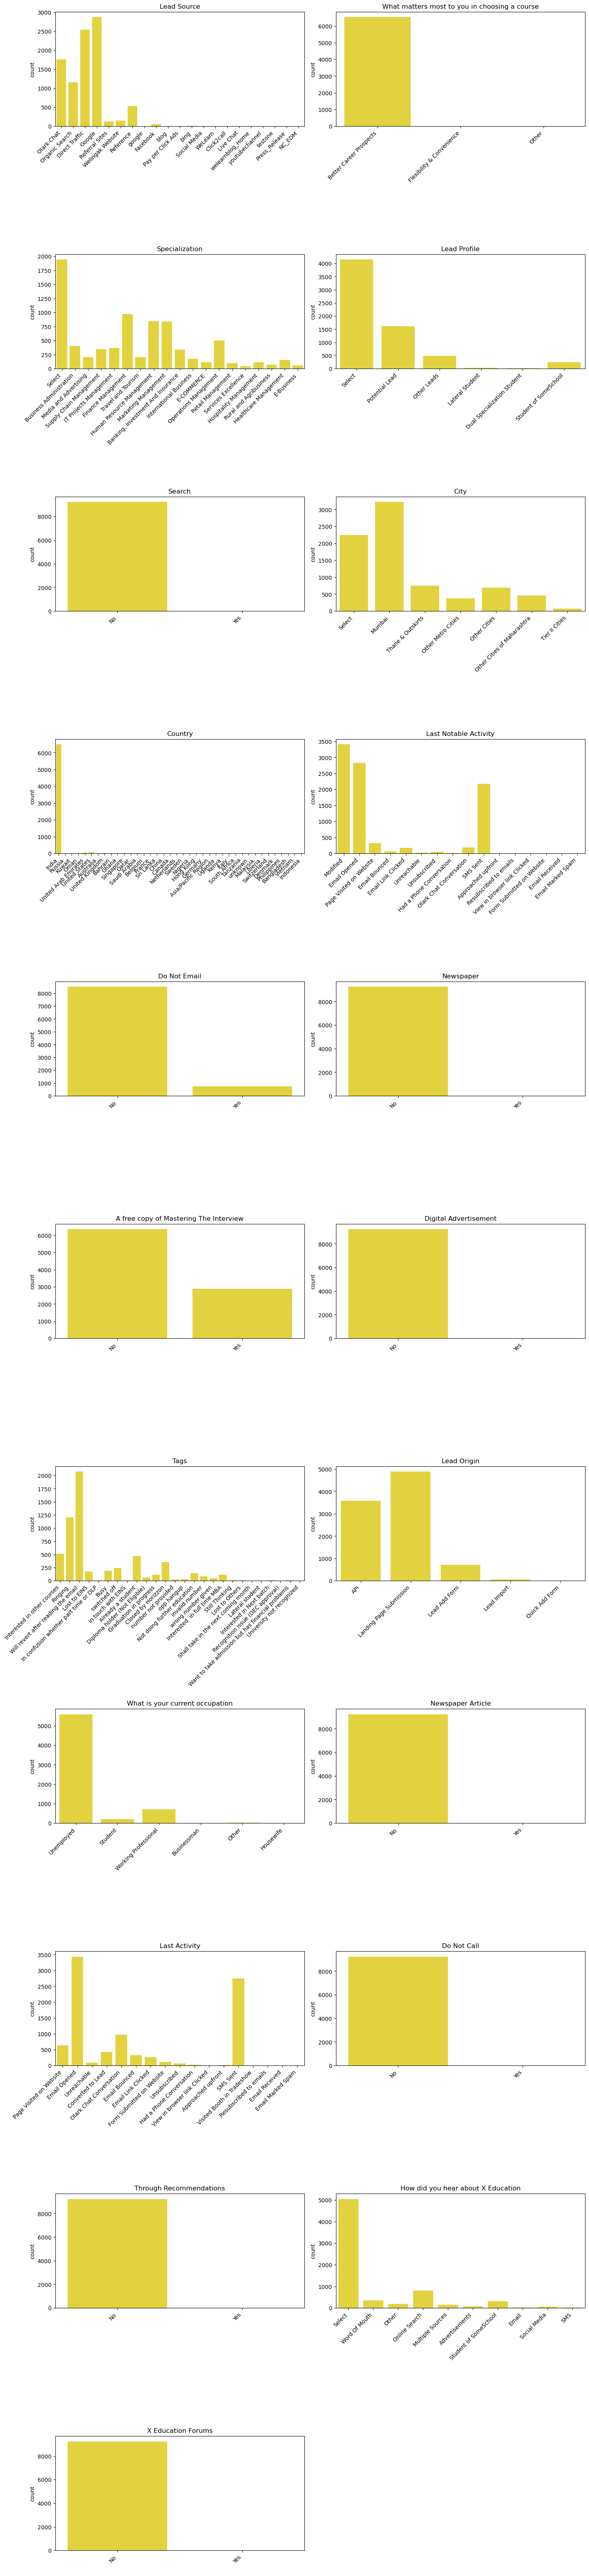

In [177]:
# Create countplot
plt.figure(figsize=(15, 6 * len(ld_cat)))
for i, col in enumerate(ld_cat):
    plt.subplot(len(ld_cat), 2, i + 1)
    sns.countplot(x=leads_df[ld_cat[i]], color='#FDE725')
    plt.title(ld_cat[i])
    plt.xlabel(' ')
    plt.tight_layout()
    plt.xticks(rotation=45, ha='right')


**Data Preparation for Descriptive Analysis**

The approach to clean the data is as follows:
1. Handle inconsistent placeholder for categorical data
2. Handle missing values for categorical and numerical data
3. Handle outliers for numerical datam
                                

_**Handle inconsistent placeholder**_ 

Based on the categorical graphs, there is some inconsistencies for placeholders like in `City` (`Select` as 'Unknown') and inconsistency in capitalization as in `Lead Source` ('Google' and `google`). Later, it is also required to encode some categorical features. 

In [182]:
# Set inconsistent placeholder
ld_placeholders = ['Select']

# Replace categorical placeholder
cat_leads_replaced = clean_data(data = cat_leads, 
                               placeholders = ld_placeholders)

# Identify unique values in each column to detect unusual placeholders
for col in cat_leads_replaced.columns:
    unique_vals = cat_leads_replaced[col].unique()
    print(f'{col}: {unique_vals[:10]}\n')


Lead Source: ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan]

What matters most to you in choosing a course: ['Better Career Prospects' nan 'Flexibility & Convenience' 'Other']

Specialization: ['Unknown' 'Business Administration' 'Media and Advertising' nan
 'Supply Chain Management' 'IT Projects Management' 'Finance Management'
 'Travel and Tourism' 'Human Resource Management' 'Marketing Management']

Lead Profile: ['Unknown' 'Potential Lead' nan 'Other Leads' 'Lateral Student'
 'Dual Specialization Student' 'Student of SomeSchool']

Search: ['No' 'Yes']

City: ['Unknown' 'Mumbai' nan 'Thane & Outskirts' 'Other Metro Cities'
 'Other Cities' 'Other Cities of Maharashtra' 'Tier II Cities']

Country: [nan 'India' 'Russia' 'Kuwait' 'Oman' 'United Arab Emirates'
 'United States' 'Australia' 'United Kingdom' 'Bahrain']

Last Notable Activity: ['Modified' 'Email Opened' 'Page Visited on Website' 'Email Bounce

_**Handle inconsistent capitalization**_

In [184]:
#Check number of unique values in each categories
cat_leads_replaced.nunique().sort_values(ascending = False)

Country                                          38
Tags                                             26
Lead Source                                      21
Specialization                                   19
Last Activity                                    17
Last Notable Activity                            16
How did you hear about X Education               10
City                                              7
Lead Profile                                      6
What is your current occupation                   6
Lead Origin                                       5
What matters most to you in choosing a course     3
Newspaper Article                                 2
Through Recommendations                           2
Do Not Call                                       2
A free copy of Mastering The Interview            2
Digital Advertisement                             2
Newspaper                                         2
Do Not Email                                      2
Search      

In [185]:
#Check unique values on selected features
print('Tags:\n', cat_leads_replaced['Tags'].unique())
print('Leads Source:\n', cat_leads_replaced['Lead Source'].unique())
print('Specialization:\n', cat_leads_replaced['Specialization'].unique())
print('Last Activity:\n', cat_leads_replaced['Last Activity'].unique())
print('Last Notable:\n', cat_leads_replaced['Last Notable Activity'].unique())

Tags:
 ['Interested in other courses' 'Ringing'
 'Will revert after reading the email' nan 'Lost to EINS'
 'In confusion whether part time or DLP' 'Busy' 'switched off'
 'in touch with EINS' 'Already a student' 'Diploma holder (Not Eligible)'
 'Graduation in progress' 'Closed by Horizzon' 'number not provided'
 'opp hangup' 'Not doing further education' 'invalid number'
 'wrong number given' 'Interested  in full time MBA' 'Still Thinking'
 'Lost to Others' 'Shall take in the next coming month' 'Lateral student'
 'Interested in Next batch' 'Recognition issue (DEC approval)'
 'Want to take admission but has financial problems'
 'University not recognized']
Leads Source:
 ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Specialization:
 ['Unknown' 'Busi

Some features can apply grouping to reduce category variants that might cause some categories to be too infrequent. Grouping might also be necessary to make the categories easier to interpret. Some feature also has inconsistencies in capitalization. Thus this inconsistencies will be handled by:  
1. **Convert to lowercase**
2. **Group similar values**

The new groups of features will be:
1. `Tags`:
   - existing_student: `Already a student''Already a student`, `Lateral student`
   - financial_issue: `Want to take admission but has financial problems`
   - engaged: `Ringing`, `Will revert after reading the email`
   - uncertain: `In confusion whether part time or DLP`, `Still Thinking`, `in touch with EINS`
   - unreachable: `Busy`, `number not provided`, `opp hangup`, `switched off`, `invalid number`, `wrong number given`
   - not_eligible: `Diploma holder (Not Eligible)`, `Graduation in progress`
   - not_interested: `Interested  in full time MBA`, `Not doing further education`, `Recognition issue (DEC approval)`, `University not recognized`
   - potential_future: `Interested in Next batch`, `Shall take in the next coming month`
   - lost_competitor: `Interested in other courses`, `Lost to EINS`, `Lost to Others`
<br><br>
2. `Lead Source`:
   - search_engine: `google`, `bing`, `organic search`
   - direct: `direct traffic`
   - chat: `olark chat`, `live chat`
   - blog: `welearn`, `welearnblog_home`
   - website: `welingak website`
   - social_media: `youtubechannel`, `facebook`, `social media`
   - ads: `pay per click ads`, `click2call`
   - referral: `referral sites`, `reference`
   - other: `press_release`, `nc_edm`, `testone`


In [187]:
# Group similar sources
tags_mapping = {
    'Already a student': 'existing_student',
    'Lateral student': 'existing_student',
    'Want to take admission but has financial problems': 'financial_issue',
    'Ringing': 'engaged',
    'Will revert after reading the email': 'engaged',
    'In confusion whether part time or DLP': 'uncertain',
    'Still Thinking': 'uncertain',
    'in touch with EINS': 'uncertain',
    'Busy': 'unreachable',
    'number not provided': 'unreachable',
    'opp hangup': 'unreachable',
    'switched off': 'unreachable',
    'invalid number': 'unreachable',
    'wrong number given': 'unreachable',
    'Diploma holder (Not Eligible)': 'not_eligible',
    'Graduation in progress': 'not_eligible',
    'Interested  in full time MBA': 'not_interested',
    'Not doing further education': 'not_interested',
    'Recognition issue (DEC approval)': 'not_interested',
    'University not recognized': 'not_interested',
    'Interested in Next batch': 'potential_future',
    'Shall take in the next coming month': 'potential_future',
    'Closed by Horizzon': 'lost_competitor',
    'Interested in other courses': 'lost_competitor',
    'Lost to EINS': 'lost_competitor',
    'Lost to Others': 'lost_competitor'
}

# Apply mapping
cat_leads_replaced['Tags'] =  cat_leads_replaced['Tags'].map(tags_mapping)

# Check result
print(cat_leads_replaced['Tags'].nunique())

9


In [188]:
# convert to lowercase
cat_leads_replaced['Lead Source'] = cat_leads_replaced['Lead Source'].str.lower().str.strip()

# Group similar sources
lead_source_mapping = {
    'google': 'search_engine',
    'bing': 'search_engine',
    'organic search': 'search_engine',
    'direct traffic': 'direct',
    'olark chat': 'chat',
    'live chat': 'chat',
    'welearn': 'blog',
    'welearnblog_home': 'blog',
    'blog': 'blog',  
    'welingak website': 'website',
    'youtubechannel': 'social_media',
    'facebook': 'social_media',
    'social media': 'social_media',
    'pay per click ads': 'ads',
    'click2call': 'ads',
    'referral sites': 'referral',  
    'reference': 'referral',   
    'press_release': 'other',
    'nc_edm': 'other',
    'testone': 'other'    
}

# Apply mapping
cat_leads_replaced['Lead Source'] = cat_leads_replaced['Lead Source'].map(lead_source_mapping)

# Check result
print(cat_leads_replaced['Lead Source'].nunique())

9


_**Handle missing values**_

In [190]:
# Check numerical missing value
num_leads.isna().sum()/len(num_leads)

TotalVisits                    0.014827
Total Time Spent on Website    0.000000
Page Views Per Visit           0.014827
dtype: float64

In [191]:
# Impute num values
num_leads_imputed = impute_num_values (data = num_leads,
                                      numerical_column = ld_num)

# Check imputed numerical missing value
num_leads_imputed.isna().sum()

TotalVisits                    0
Total Time Spent on Website    0
Page Views Per Visit           0
dtype: int64

In [192]:
# Check categorical missing value
cat_leads_replaced.isna().sum()/len(cat_leads_replaced)

Lead Source                                      0.003896
What matters most to you in choosing a course    0.293182
Specialization                                   0.155628
Lead Profile                                     0.293182
Search                                           0.000000
City                                             0.153680
Country                                          0.266342
Last Notable Activity                            0.000000
Do Not Email                                     0.000000
Newspaper                                        0.000000
A free copy of Mastering The Interview           0.000000
Digital Advertisement                            0.000000
Tags                                             0.362879
Lead Origin                                      0.000000
What is your current occupation                  0.291126
Newspaper Article                                0.000000
Last Activity                                    0.011147
Do Not Call   

In [193]:
# Impute cat values
cat_leads_imputed = impute_cat_values (data = cat_leads_replaced)

# Check imputed categorical missing value
cat_leads_imputed.isna().sum()

Lead Source                                      0
What matters most to you in choosing a course    0
Specialization                                   0
Lead Profile                                     0
Search                                           0
City                                             0
Country                                          0
Last Notable Activity                            0
Do Not Email                                     0
Newspaper                                        0
A free copy of Mastering The Interview           0
Digital Advertisement                            0
Tags                                             0
Lead Origin                                      0
What is your current occupation                  0
Newspaper Article                                0
Last Activity                                    0
Do Not Call                                      0
Through Recommendations                          0
How did you hear about X Educat

_**Handle outliers and abnormal data**_

Check for any outliers and abnormalities in data after imputation through data visualization.

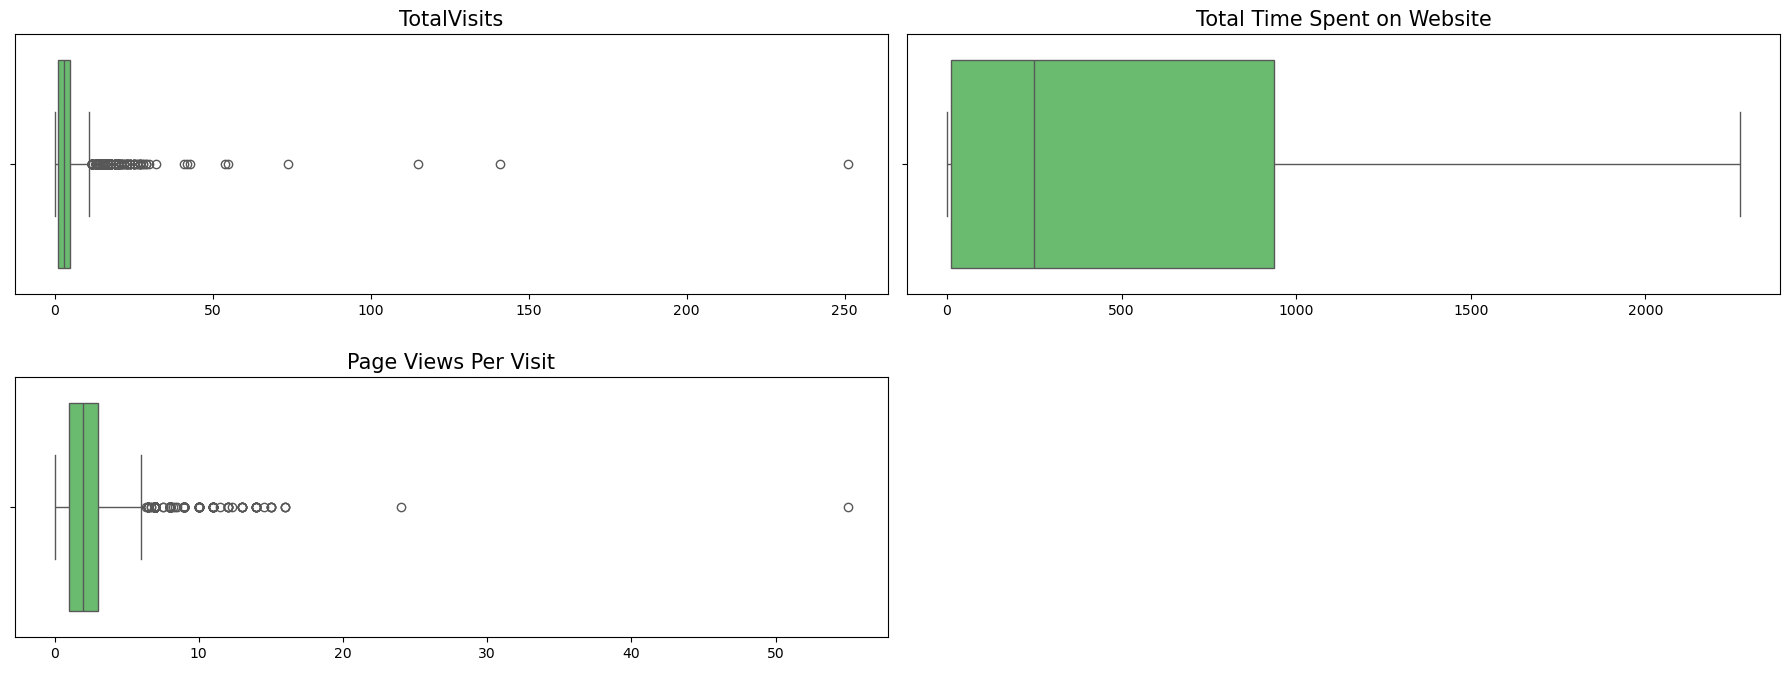

In [196]:
# Create boxplot
plt.figure(figsize=(18,10))
for i in range(0, len(ld_num)):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=num_leads_imputed[ld_num[i]], color='#5DC863')
    plt.title(ld_num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()


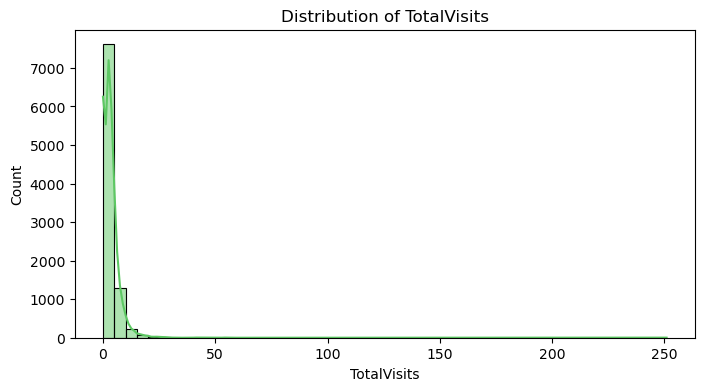

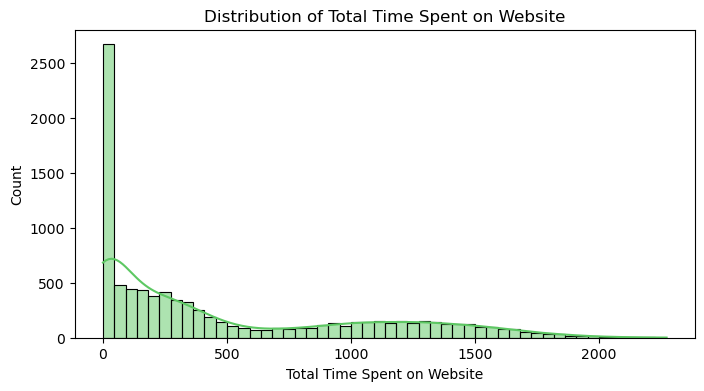

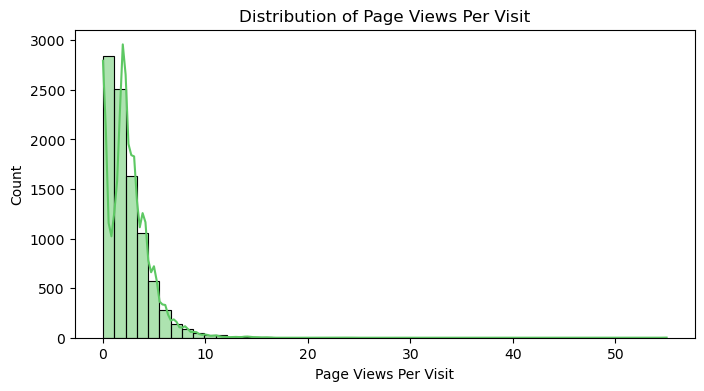

In [197]:
# Create histogram
for col in num_leads_imputed:
    plt.figure(figsize=(8, 4))
    sns.histplot(num_leads_imputed[col], bins=50, kde=True, color='#5DC863')
    plt.title(f'Distribution of {col}')
    plt.show()


The distribution are skewed and have potential outliers in all of the numerical features especially `Page Views Per Visit` and `TotalVisits`. Let's just use percentile method to remove the outliers. 

In [199]:
#Set percentile
lower = 1
upper = 99

# Columns to process
ld_columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Check number of outliers
for col in ld_columns:
    low = np.percentile(num_leads_imputed[col], lower)
    high = np.percentile(num_leads_imputed[col], upper)
    ld_outliers = num_leads_imputed[(num_leads_imputed[col] < low) | (num_leads_imputed[col] > high)]
    print(f'{col}: {ld_outliers.shape[0]} outliers')

TotalVisits: 83 outliers
Total Time Spent on Website: 93 outliers
Page Views Per Visit: 75 outliers


In [200]:
# Apply outlier removal
num_leads_cleaned = remove_outliers_percentile (data=num_leads_imputed,
                                               columns=ld_columns, 
                                               lp=lower, 
                                               up=upper)

print('Data shape before cleaned :', num_leads_imputed.shape)
print('Data shape after cleaned  :', num_leads_cleaned.shape)


Data shape before cleaned : (9240, 3)
Data shape after cleaned  : (8998, 3)


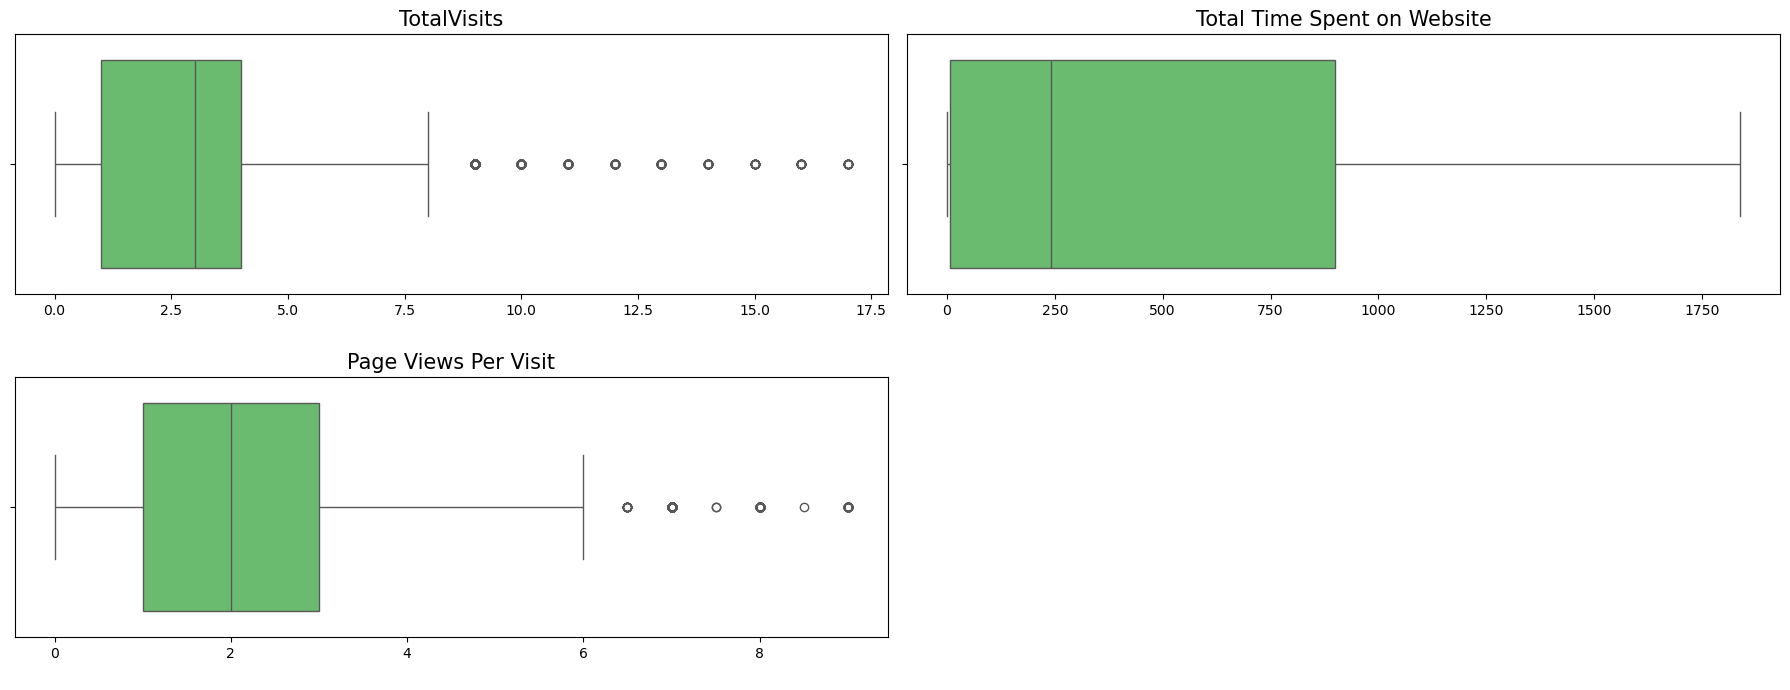

In [201]:
# Create boxplot
plt.figure(figsize=(18,10))
for i in range(0, len(ld_columns)):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=num_leads_cleaned[ld_columns[i]], color='#5DC863')
    plt.title(ld_columns[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()


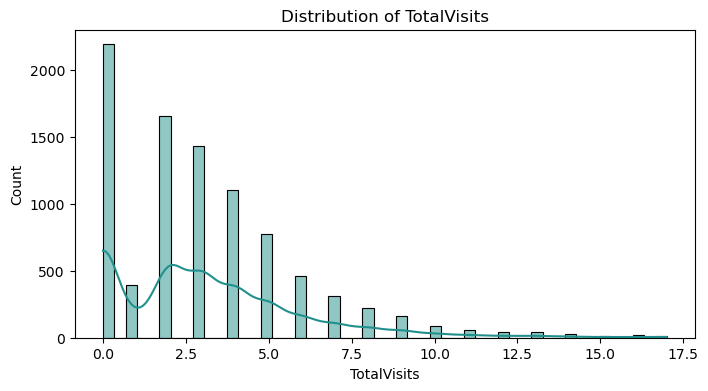

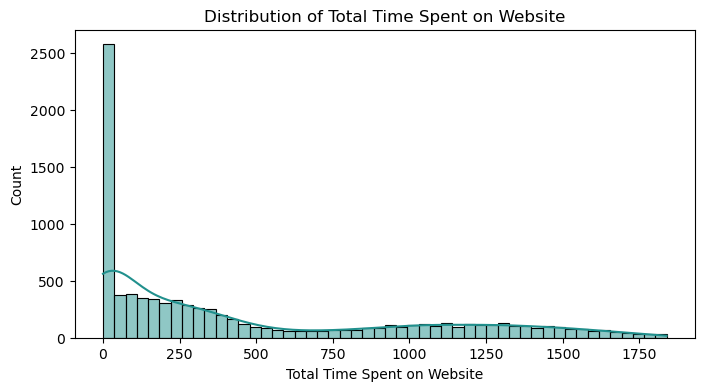

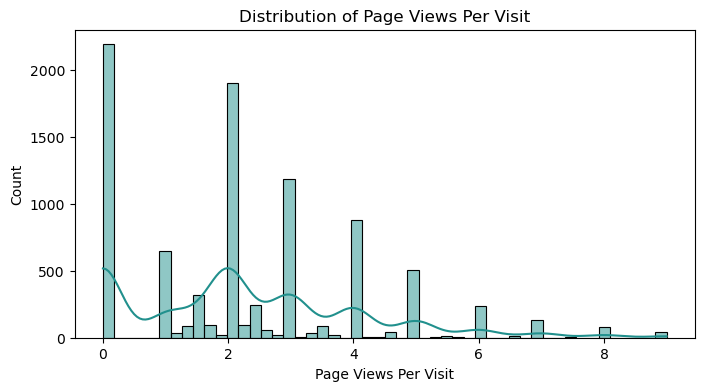

In [202]:
# Create histogram
for col in num_leads_imputed:
    plt.figure(figsize=(8, 4))
    sns.histplot(num_leads_cleaned[col], bins=50, kde=True, color='#21908D')
    plt.title(f'Distribution of {col}')
    plt.show()


Concat numerical and categorical cleaned data to set a new cleaned dataset. 

In [204]:
# Get the cleaned index after removing outliers
ld_cleaned_index = num_leads_cleaned.index  

# Filter categorical columns using this index
cat_leads_filtered = cat_leads_imputed.loc[ld_cleaned_index]

# Filter churn_risk_score using this index
leads_converted_filtered = leads_df.loc[ld_cleaned_index, "Converted"]

# Concatenate cleaned numerical & filtered categorical data
indexed_leads = pd.concat([num_leads_cleaned, cat_leads_filtered, leads_converted_filtered], axis=1)


In [205]:
# Verify data shape and missing values
print(indexed_leads.shape) 
print(indexed_leads.isnull().sum())

(8998, 25)
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Lead Source                                      0
What matters most to you in choosing a course    0
Specialization                                   0
Lead Profile                                     0
Search                                           0
City                                             0
Country                                          0
Last Notable Activity                            0
Do Not Email                                     0
Newspaper                                        0
A free copy of Mastering The Interview           0
Digital Advertisement                            0
Tags                                             0
Lead Origin                                      0
What is your current occupation                  0
Newspaper Article                                0
Last Activity       

In [206]:
indexed_leads['Lead Source'].unique()
indexed_leads['Tags'].unique()

array(['lost_competitor', 'engaged', 'Unknown', 'uncertain',
       'unreachable', 'existing_student', 'not_eligible',
       'not_interested', 'potential_future', 'financial_issue'],
      dtype=object)

In [207]:
# Check data summary
indexed_leads.describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
count  8998.000000                  8998.000000           8998.000000   
mean      3.126361                   469.161703              2.253863   
std       2.876961                   529.095647              1.881061   
min       0.000000                     0.000000              0.000000   
25%       1.000000                     6.000000              1.000000   
50%       3.000000                   240.000000              2.000000   
75%       4.000000                   899.000000              3.000000   
max      17.000000                  1839.000000              9.000000   

         Converted  
count  8998.000000  
mean      0.381529  
std       0.485789  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [208]:
# Display data
print(indexed_leads.shape)
indexed_leads.head()

(8998, 25)


TotalVisits  \
Prospect ID                                         
7927b2df-8bba-4d29-b9a2-b6e0beafe620          0.0   
2a272436-5132-4136-86fa-dcc88c88f482          5.0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a          2.0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc          1.0   
3256f628-e534-4826-9d63-4a8b88782852          2.0   

                                      Total Time Spent on Website  \
Prospect ID                                                         
7927b2df-8bba-4d29-b9a2-b6e0beafe620                            0   
2a272436-5132-4136-86fa-dcc88c88f482                          674   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                         1532   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                          305   
3256f628-e534-4826-9d63-4a8b88782852                         1428   

                                      Page Views Per Visit    Lead Source  \
Prospect ID                                                                 
7927b2df-8bba-4d29-b9a2-b6e0beafe620                   0.0           chat   
2a272436-5132-4136-86fa-dcc88c88f482                   2.5  search_engine   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                   2.0         direct   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                   1.0         direct   
3256f628-e534-4826-9d63-4a8b88782852                   1.0  search_engine   

                                     What matters most to you in choosing a course  \
Prospect ID                                                                          
7927b2df-8bba-4d29-b9a2-b6e0beafe620                       Better Career Prospects   
2a272436-5132-4136-86fa-dcc88c88f482                       Better Career Prospects   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                       Better Career Prospects   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                       Better Career Prospects   
3256f628-e534-4826-9d63-4a8b88782852                       Better Career Prospects   

                                               Specialization    Lead Profile  \
Prospect ID                                                                     
7927b2df-8bba-4d29-b9a2-b6e0beafe620                  Unknown         Unknown   
2a272436-5132-4136-86fa-dcc88c88f482                  Unknown         Unknown   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Business Administration  Potential Lead   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc    Media and Advertising         Unknown   
3256f628-e534-4826-9d63-4a8b88782852                  Unknown         Unknown   

                                     Search     City  Country  \
Prospect ID                                                     
7927b2df-8bba-4d29-b9a2-b6e0beafe620     No  Unknown  Unknown   
2a272436-5132-4136-86fa-dcc88c88f482     No  Unknown    India   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a     No   Mumbai    India   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc     No   Mumbai    India   
3256f628-e534-4826-9d63-4a8b88782852     No   Mumbai    India   

                                     Last Notable Activity Do Not Email  \
Prospect ID                                                               
7927b2df-8bba-4d29-b9a2-b6e0beafe620              Modified           No   
2a272436-5132-4136-86fa-dcc88c88f482          Email Opened           No   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a          Email Opened           No   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc              Modified           No   
3256f628-e534-4826-9d63-4a8b88782852              Modified           No   

                                     Newspaper  \
Prospect ID                                      
7927b2df-8bba-4d29-b9a2-b6e0beafe620        No   
2a272436-5132-4136-86fa-dcc88c88f482        No   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a        No   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc        No   
3256f628-e534-4826-9d63-4a8b88782852        No   

                                     A free copy of Mastering The Interview  \
Prospect ID                                                

Now the data is cleaned and ready to use for analysis. 

#### **Descriptive Analysis for Leads**

To define `good potential leads` and `bad_potential_leads`, `Converted` features is use for this definition:
- Good leads : `Converted = 1` (those who enrolled).
- Bad leads : `Converted = 0` (those who did not enroll).

In [212]:
# Check conversion distribution
leads_conversion_cts = indexed_leads['Converted'].value_counts(normalize=True) * 100
print(leads_conversion_cts)

Converted
0    61.847077
1    38.152923
Name: proportion, dtype: float64


Almost 2/3 of the leads are non-converters. Now it is important to analyze what features might cause differentiation in converted leads (good) and non-converted leads (bad).

Possible feature comparisons:
- Engagement metrics : `Total Time Spent on Website`, `Total Visits`, `Page Views Per Visit`, `Last Activity`
- Source of leads : `Lead Source`, `Lead Origin`,
- Customer demographic : `Specialization`, `Current Occupation`, `City`, `Tags`

_**Numerical features analysis**_

Comparing the statistical summary of the numerical features

In [216]:
# Set numerical column
ld_num = num_leads_cleaned.columns

# Grouping numerical features by churn risk score and calculating the mean
leads_summary = indexed_leads.groupby('Converted')[ld_num].agg(['count','mean', 'std', 'median'])

# Display the result
leads_summary.T

Converted                                     0            1
TotalVisits                 count   5565.000000  3433.000000
                            mean       3.036658     3.271774
                            std        2.772675     3.033200
                            median     3.000000     3.000000
Total Time Spent on Website count   5565.000000  3433.000000
                            mean     319.502246   711.764346
                            std      415.405626   599.098137
                            median   176.000000   804.000000
Page Views Per Visit        count   5565.000000  3433.000000
                            mean       2.269328     2.228794
                            std        1.872420     1.894991
                            median     2.000000     2.000000

_**Visualizing the numerical features**_

Boxplot for identifying differences in distribution

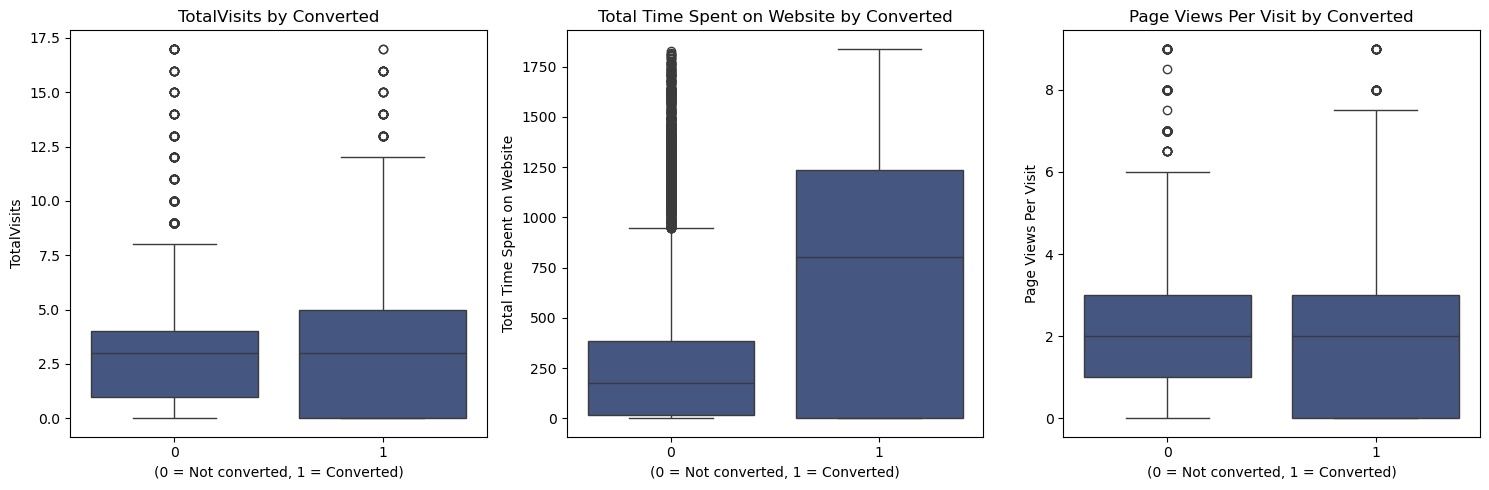

In [219]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(ld_num, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=indexed_leads, x="Converted", y=col, color = '#3B528B')
    plt.title(f'{col} by Converted')
    plt.xlabel('(0 = Not converted, 1 = Converted)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

KDE distribution plot for checking overlap between churn risk group

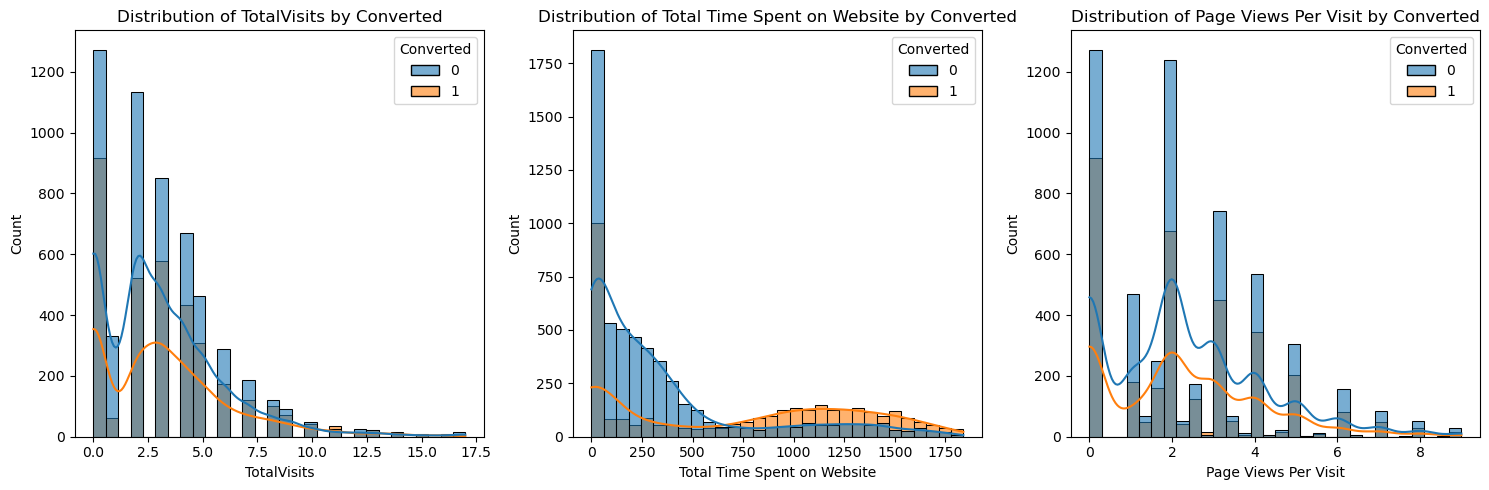

In [221]:
# Create histplot
plt.figure(figsize=(15, 5))

for i, col in enumerate(ld_num, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=indexed_leads, x=col, hue="Converted", kde=True, bins=30, alpha=0.6)
    plt.title(f"Distribution of {col} by Converted")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

Both graph shows that converted leads generally has higher `Total Time Spent on Website` and slightly higher though similar pattern of `Total Visits` and `Page Views Per Visit`.

Correlation heatmap to find any strong relationship

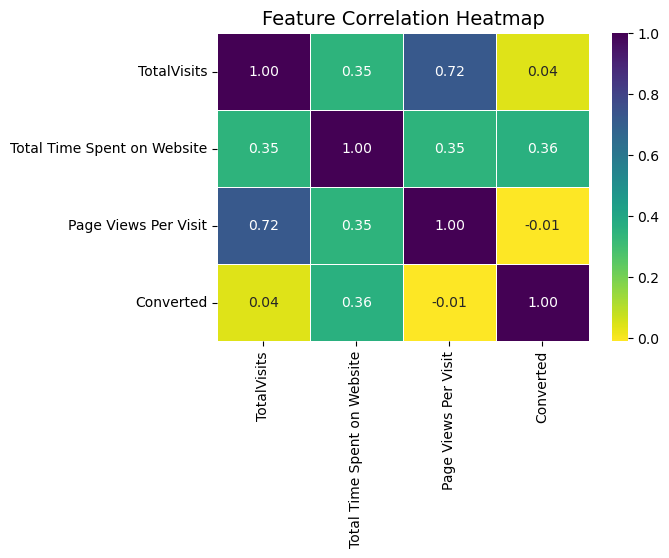

In [224]:
# Compute correlation matrix
plt.figure(figsize=(6, 4))

correlation_matrix = indexed_leads[list(ld_num) + ['Converted']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.show()

`Total Time Spent on Website` is expected to have the highest correlation with `Converted` (positive correlation) with score of 0.36.
`Total Visits` might have a weak correlation while `Page Views Per Visit` also has weak correlation with negative values.

_**Visualizing the categorical features**_

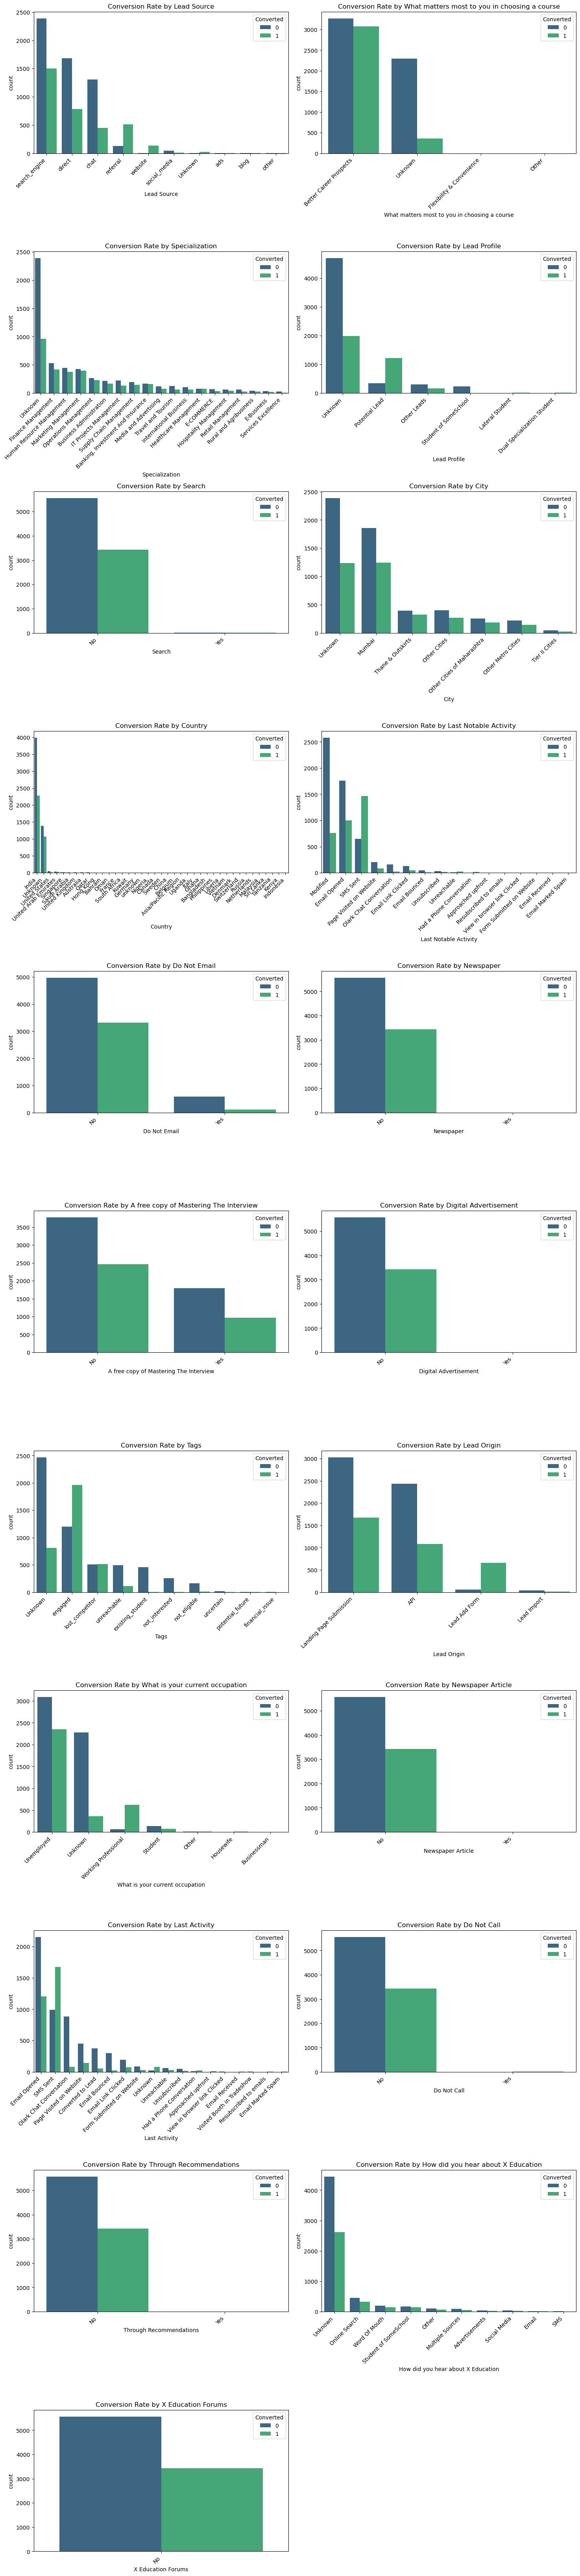

In [227]:
# Create countplot
plt.figure(figsize=(15, 6 * len(ld_cat)))

for i, col in enumerate(ld_cat):
    plt.subplot(len(ld_cat), 2, i + 1)
    sns.countplot(data=indexed_leads, x=col, hue='Converted', order=indexed_leads[col].value_counts().index, palette="viridis")
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Conversion Rate by {col}')

plt.tight_layout()
plt.show()

_**Potential Leads Characteristic Analysis**_

**Good potential leads (`Converted = 1`)** 
This type of potential leads show higher engagement levels with the website, spending significantly more time browsing pages and returning for multiple visits. They actively interact with marketing efforts, such as opening emails, clicking on links, and engaging in chat conversations. These leads often come from high-performing sources like direct referrals, the company website, and organic search, indicating a strong initial interest. Additionally, their tags suggest commitment, with many classified as engaged or considering the next batch for enrollment. Certain specializations and occupations also appear more frequently among converted leads, implying that background and career aspirations influence conversion likelihood.

**Bad potential leads (`Converted = 0`)**
This type of potential leads tend to have minimal interaction with the website, with lower total visits, fewer page views per visit, and significantly less time spent. They are less likely to open emails or engage with chat support, making it harder to nurture them into conversions. Many originate from lower-quality lead sources such as paid ads and some social media campaigns, which bring in a higher proportion of unconverted users. Additionally, their assigned tags indicate uncertainty, unreachability, or loss to competitors, while financial constraints and lack of eligibility also contribute to non-conversion. These characteristics suggest that refining marketing strategies and lead nurturing efforts could improve conversion rates.

### **2. Marketing Channel To Focus On**

Based on the above graphs, there are effective and non-effective marketing channels for lead conversion. It is to be concluded that:

**Effective Channels**<br>
Organic search, direct traffic, chat, and referral generate the highest conversion rates. Organic search and direct visits suggest that potential leads are actively searching for courses, making them more likely to convert. While referrals indicate trust in recommendations from past customers.

**Non-Effective Channels**<br>
Paid advertisements, social media campaigns, and blog may traffic might bring in some traffic which also have lower conversion rates. Many users from these sources do not engage deeply or show interest to enroll. These channels should be optimized for better targeting to attract higher-quality leads.

**Marketing Strategy**
While it is also good to optimize ads and social media, focusing on good lead sources might be the best strategy. This can be done by:
- Enhance SEO strategies to attract highly engaged users via search engines.
- Optimize the website experience to encourage conversions from direct visitors.
- Strengthen referral programs to leverage word-of-mouth marketing.
- Improve ad targeting to focus on more qualified prospects rather than broad audiences.

---

##  **<font color='blue'>Task 4: Modeling Task: Edutech Leads Data</font>**

### **1. Defining Target Variable**

The most possible target variable for Leads Edutech dataset is `Converted`, which indicates whether a lead has made the purchase which made them a customer (`Converted = 1`) or never made any purchase (`Converted = 0`). This feature is suitable as target since the `Converted` contains binary outcome which fit with supervised learning, while other features might contribute to the outcome.

Understanding customer with higher conversion probability will help prioritizing marketing efforts. 

### **2. Leads Score Ranking**

Before proceeding into machine learning model, it is required to follow these steps:

1. **Choose a Model**<br>
Choose a classification machine learning model.

2. **Data Pre-processing** <br>
split input-output data, split train-test data

3. **Predict Probabilities**<br>
Use the trained model to predict probabilities of conversion for all leads (both train and test datasets).
Sort leads by the predicted probability (descending order) from best to worst.

#### **Choose a model**

`XGBoost` (Extreme Gradient Boosting) is chosen because it is suited for structured/tabular data and provide built-in feature importance, helping interpretability. It also includes regularization to prevent overfitting. `XGBoost` also is optimized for speed and memory usage.

It does not actually need to scale, so the data used are not the scaled one, unless other model will be tried upon. 

`New model (1.3+) of XGBoost` also does not require for OHE. It allows direct handling of categorical data without explicit OHE, often using a more efficient partitioning strategy for splits. 

In [240]:
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier

#### **Data Pre-processing**

**Convert categorical columns to category**

In [243]:
# Identify categorical columns
ld_cat_features = ld_cat

In [244]:
# Convert categorical columns to category dtype
indexed_leads[ld_cat_features] = indexed_leads[ld_cat_features].astype("category")

**Split Input-Output Data**

In [246]:
# Create a split input and output function
def split_input_output(data, target_column):
    """
    Splits a DataFrame into input (X) and output (y).

    Parameters
    ----------
    data : pandas.DataFrame
        Input DataFrame.
    
    target_column : str
        Name of the target column.

    Returns
    -------
    X : pandas.DataFrame
        DataFrame containing feature columns.
    
    y : pandas.Series
        Series containing the target variable.
    """
    
    X = data.drop(columns = target_column)
    y = data[target_column]

    return X, y

In [247]:
# Split input and output
ld_X, ld_y = split_input_output(data = indexed_leads,
                          target_column = 'Converted')

In [248]:
# Check data dimension
n_samples, n_features = ld_X.shape

# Print number of samples and features
print(f'Number of samples  :    {n_samples}')
print(f'Number of features :    {n_features}')

Number of samples  :    8998
Number of features :    24


**Split train-test data**

In [250]:
from sklearn.model_selection import train_test_split

# Split data first
ld_X_train, ld_X_test, ld_y_train, ld_y_test = train_test_split(ld_X, ld_y, 
                                                                test_size=0.2, 
                                                                random_state=42)

# Check data shape
print('Leads X_train data shape:', ld_X_train.shape)
print('Leads y_train data shape:', ld_y_train.shape)
print('Leads X_test data shape :', ld_X_test.shape)
print('Leads y_test data shape :', ld_y_test.shape)

Leads X_train data shape: (7198, 24)
Leads y_train data shape: (7198,)
Leads X_test data shape : (1800, 24)
Leads y_test data shape : (1800,)


#### **Predict Probabilities**

**Train XGBoost Model**

In [253]:
# Adjust Class Weights to Handle Imbalance
neg, pos = indexed_leads['Converted'].value_counts()
scale_pos_weight = neg / pos

# Train XGBoost model (categorical support enabled)
ld_model = XGBClassifier(
    tree_method="hist",
    eval_metric="logloss",
    enable_categorical=True,  
    scale_pos_weight=scale_pos_weight, 
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05
)

ld_model.fit(ld_X_train, ld_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

**Apply predict probabilities**

Predict probabilities for every leads for conversion likelihood

In [256]:
# Get predicted probabilities
indexed_leads['Lead Score'] = ld_model.predict_proba(ld_X)[:, 1] 

# Rank leads from best to worst
leads_sorted = indexed_leads.sort_values(by='Lead Score', ascending=False)

# Display data
leads_sorted.head()

TotalVisits  \
Prospect ID                                         
70c0b004-8022-4fd3-8a2e-eecd7851c3c3          6.0   
9ec1cafe-b019-498e-b246-7ab06167d72c          4.0   
a8b4e742-2cce-4280-8549-a4a7d51a0fe2          5.0   
f04442c7-78a6-476b-90bd-6910f645ad78          9.0   
63547390-d928-4f26-b215-9fdde8af60f1          6.0   

                                      Total Time Spent on Website  \
Prospect ID                                                         
70c0b004-8022-4fd3-8a2e-eecd7851c3c3                         1522   
9ec1cafe-b019-498e-b246-7ab06167d72c                         1833   
a8b4e742-2cce-4280-8549-a4a7d51a0fe2                         1513   
f04442c7-78a6-476b-90bd-6910f645ad78                         1416   
63547390-d928-4f26-b215-9fdde8af60f1                         1094   

                                      Page Views Per Visit    Lead Source  \
Prospect ID                                                                 
70c0b004-8022-4fd3-8a2e-eecd7851c3c3                   3.0  search_engine   
9ec1cafe-b019-498e-b246-7ab06167d72c                   4.0  search_engine   
a8b4e742-2cce-4280-8549-a4a7d51a0fe2                   5.0         direct   
f04442c7-78a6-476b-90bd-6910f645ad78                   1.8  search_engine   
63547390-d928-4f26-b215-9fdde8af60f1                   2.0  search_engine   

                                     What matters most to you in choosing a course  \
Prospect ID                                                                          
70c0b004-8022-4fd3-8a2e-eecd7851c3c3                       Better Career Prospects   
9ec1cafe-b019-498e-b246-7ab06167d72c                       Better Career Prospects   
a8b4e742-2cce-4280-8549-a4a7d51a0fe2                       Better Career Prospects   
f04442c7-78a6-476b-90bd-6910f645ad78                       Better Career Prospects   
63547390-d928-4f26-b215-9fdde8af60f1                       Better Career Prospects   

                                                 Specialization  \
Prospect ID                                                       
70c0b004-8022-4fd3-8a2e-eecd7851c3c3    Supply Chain Management   
9ec1cafe-b019-498e-b246-7ab06167d72c      Media and Advertising   
a8b4e742-2cce-4280-8549-a4a7d51a0fe2      Media and Advertising   
f04442c7-78a6-476b-90bd-6910f645ad78  Human Resource Management   
63547390-d928-4f26-b215-9fdde8af60f1       Marketing Management   

                                        Lead Profile Search  \
Prospect ID                                                   
70c0b004-8022-4fd3-8a2e-eecd7851c3c3  Potential Lead     No   
9ec1cafe-b019-498e-b246-7ab06167d72c  Potential Lead     No   
a8b4e742-2cce-4280-8549-a4a7d51a0fe2  Potential Lead     No   
f04442c7-78a6-476b-90bd-6910f645ad78  Potential Lead     No   
63547390-d928-4f26-b215-9fdde8af60f1  Potential Lead     No   

                                                   City Country  \
Prospect ID                                                       
70c0b004-8022-4fd3-8a2e-eecd7851c3c3  Thane & Outskirts   India   
9ec1cafe-b019-498e-b246-7ab06167d72c            Unknown   India   
a8b4e742-2cce-4280-8549-a4a7d51a0fe2             Mumbai   India   
f04442c7-78a6-476b-90bd-6910f645ad78             Mumbai   India   
63547390-d928-4f26-b215-9fdde8af60f1            Unknown   India   

                                     Last Notable Activity Do Not Email  \
Prospect ID                                                               
70c0b004-8022-4fd3-8a2e-eecd7851c3c3              SMS Sent           No   
9ec1cafe-b019-498e-b246-7ab06167d72c              SMS Sent           No   
a8b4e742-2cce-4280-8549-a4a7d51a0fe2          Email Opened           No   
f04442c7-78a6-476b-90bd-6910f645ad78              SMS Sent           No   
63547390-d928-4f26-b215-9fdde8af60f1              SMS Sent           No   

                                     Newspaper  \
Prospect ID                                      
70c0b004-8022-4fd3-8a2e-eecd785

In [257]:
print(indexed_leads["Converted"].value_counts(normalize=True))

Converted
0    0.618471
1    0.381529
Name: proportion, dtype: float64


### **3. Top 10 Predictors For Good Potential Leads**

By having the trained `XGBoost model`, the model will be used to extract feature importance and get the top 10 most important features. 

In [272]:
# Get feature importance from the trained XGBoost model
ld_feature_importance = ld_model.get_booster().get_score(importance_type='weight')

# Convert to DataFrame
ld_feature_importance_df = pd.DataFrame(ld_feature_importance.items(), columns=['Feature', 'Importance'])

# Sort by importance (descending order)
ld_feature_importance_df = ld_feature_importance_df.sort_values(by='Importance', ascending=False)

# Display top 10 features
ld_top_10_features = ld_feature_importance_df.head(10)

ld_top_10_features


Feature  Importance
1          Total Time Spent on Website      1689.0
5                       Specialization      1451.0
13                                Tags       982.0
0                          TotalVisits       802.0
16                       Last Activity       760.0
2                 Page Views Per Visit       758.0
10               Last Notable Activity       674.0
8                                 City       626.0
17  How did you hear about X Education       506.0
6                         Lead Profile       424.0

Important Features                      | Explanation |
|------------------------------|------------|
| **Total Time Spent on Website** | Higher time spent on the website indicates strong engagement and interest. Good leads tend to spend more time exploring courses. |
| **Lead Origin**               | Certain lead sources (e.g., `search`, `chat`) result in higher conversion rates compared to others. |
| **Lead Source**               | `Organic search` and `direct traffic` often bring more serious learners compared to `paid ads`. |
| **Last Activity**             | Positive engagement response (e.g., `Email Opened` or `Form Submitted` show stronger intent to convert than negative engagement |
| **Tags**                      | Tags like `engaged` or `potential_future` are associated with higher conversion probabilities compared to `unreachable` or `not_interested.` |
| **Page Views Per Visit**      | More page views per session indicate that a lead is actively exploring the platform, suggesting higher interest. |
| **Specialization**            | Certain specializations (e.g., `Business`, `Finance`) have higher conversion rates, while others may have lower interest. |
| **What is your current occupation** | `Working professionals` or `students` in relevant fields may be more likely to enroll than those with unrelated occupations. |
| **Last Notable Activity**     | If the last recorded action is something positive the lead is more likely to convert. |
| **Total Visits**              | Higher number of visits suggests ongoing engagement and a stronger likelihood of conversion. |

### **4. Increasing Good Potential Leads**

Based on previous analysis and prediction, there is many room for improvement to increase good potential leads. Below are several strategies to implement:


1. **Focus on High-Converting Marketing Channels** <br>
Leads coming from search engines, referrals, and direct sources have the highest conversion rates. It is better to invest more in SEO optimization, referral programs, and branding to attract more high-quality leads.

2. **Lead Engagement & Follow-ups** <br>
Leads with higher engagement in website visits, total time spent, and email interactions are more likely to convert. Hence, improve email campaigns with personalized offer and engaging nurturing content might help increase leads interest. 
 
3.  **Address Financial & Course-Related Concerns** <br>
Some leads are interested but cite financial issues or confusion about course selection as a no-go. Offer installment plans, scholarships, or financial aid guidance to remove pricing issue.  Provide clearer course modules and career guidance might help to clear the course confusion.


4. **Leverage Existing Students & Alumni** <br>
Leads with an existing connection (e.g., referrals, existing students, social proof) tend to convert more. Therefore, strengthen referral incentive programs and testimonial might help building trust and credibility.



In [276]:
# Create Decile Column (Rank 1-10)
indexed_leads['decile'] = pd.qcut(indexed_leads['Lead Score'], 10, labels=False, duplicates='drop') + 1

# Compute Decile Analysis
ld_decile_summary = indexed_leads.groupby('decile').agg(
    total_leads=('Converted', 'count'),
    good_leads=('Converted', 'sum')
).reset_index()



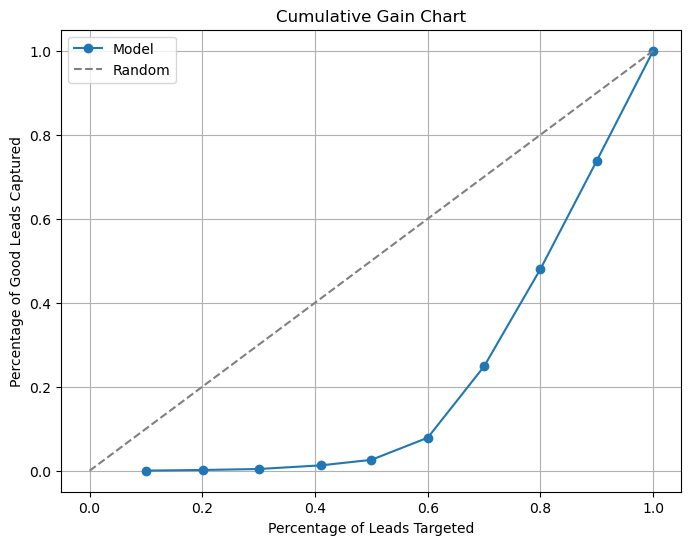

In [277]:
# Add cumulative gain columns
ld_decile_summary['cumulative_good_leads'] = ld_decile_summary['good_leads'].cumsum()
ld_decile_summary['cumulative_good_leads_pct'] = ld_decile_summary['cumulative_good_leads'] / ld_decile_summary['good_leads'].sum()
ld_decile_summary['cumulative_leads_pct'] = ld_decile_summary['total_leads'].cumsum() / indexed_leads.shape[0]

# Plot Cumulative Gain Chart
plt.figure(figsize=(8,6))
plt.plot(ld_decile_summary['cumulative_leads_pct'], ld_decile_summary['cumulative_good_leads_pct'], marker='o', label="Model")
plt.plot([0,1], [0,1], linestyle='--', color='grey', label="Random")
plt.xlabel("Percentage of Leads Targeted")
plt.ylabel("Percentage of Good Leads Captured")
plt.title("Cumulative Gain Chart")
plt.legend()
plt.grid()
plt.show()

The blue line (`Model`) is below the gray line (`Random Guess`) in the graph. This indicates that the model is performing worse than random guessing in predicting churn. It is need to be investigated potential issues such as data imbalance, feature selection, or model architecture. Consider retraining or exploring alternative models.

Since thr model isn't outperforming random guess, focus on the top portion of the gain curve where there are steepest increase within the top 20% of targeted leads, hinting that the leads most likely to be "good," even if the model is not reliable. Based on hypothetical example, it is recommend to focusing on the top 20% of leads identified by the model and closely monitor then re-evaluate the model and strategy. 


>Additional Notes: Have tried to use OHE and scaler on another jupyter notebook but the result is similar. 

### **5. Marketing Initiative Recommendation** 

##  **<font color='blue'>Task 5: Modeling Task: Customer Churn Data</font>**

#### **test.csv data preparation**

Before proceeding to model Customer Churn Data, it is instructed to join `train.csv` and `test.csv`. Since `test.csv` does not contain `churn_risk_score features`, the preceding churn descriptive analysis process only use train.csv dataset to understand the data correctly. Now as it is about time to perform machine learning process which required the `test.csv` data, it is required to prepare the data accordingly by applying data pre-processing. 

**Data Pre-Processing**

In [284]:
# Display data
churn_test.head()

Name  age gender  \
customer_id                                                          
fffe43004900440031003700300030003400    Alethia Meints   50      F   
fffe43004900440031003900370037003300        Ming Lopez   41      M   
fffe43004900440034003800360037003000  Carina Flannigan   31      F   
fffe43004900440036003200370033003400      Kyung Wanner   64      M   
fffe43004900440035003000370031003900       Enola Gatto   16      F   

                                     security_no region_category  \
customer_id                                                        
fffe43004900440031003700300030003400     OQJ1XAY         Village   
fffe43004900440031003900370037003300     OUQRPKO         Village   
fffe43004900440034003800360037003000     02J2RE7            Town   
fffe43004900440036003200370033003400     5YEQIF1            Town   
fffe43004900440035003000370031003900     100RYB5            Town   

                                     membership_category joining_date  \
customer_id                                                             
fffe43004900440031003700300030003400  Premium Membership   2015-11-02   
fffe43004900440031003900370037003300     Gold Membership   2016-03-01   
fffe43004900440034003800360037003000   Silver Membership   2017-03-03   
fffe43004900440036003200370033003400   Silver Membership   2017-08-18   
fffe43004900440035003000370031003900       No Membership   2015-05-05   

                                     joined_through_referral referral_id  \
customer_id                                                                
fffe43004900440031003700300030003400                      No    xxxxxxxx   
fffe43004900440031003900370037003300                      No    xxxxxxxx   
fffe43004900440034003800360037003000                      No    xxxxxxxx   
fffe43004900440036003200370033003400                     Yes     CID8941   
fffe43004900440035003000370031003900                     Yes     CID5690   

                                         preferred_offer_types  \
customer_id                                                      
fffe43004900440031003700300030003400            Without Offers   
fffe43004900440031003900370037003300            Without Offers   
fffe43004900440034003800360037003000     Gift Vouchers/Coupons   
fffe43004900440036003200370033003400  Credit/Debit Card Offers   
fffe43004900440035003000370031003900            Without Offers   

                                     medium_of_operation internet_option  \
customer_id                                                                
fffe43004900440031003700300030003400          Smartphone           Wi-Fi   
fffe43004900440031003900370037003300             Desktop     Fiber_Optic   
fffe43004900440034003800360037003000                Both     Mobile_Data   
fffe43004900440036003200370033003400                   ?     Fiber_Optic   
fffe43004900440035003000370031003900          Smartphone     Mobile_Data   

                                     last_visit_time  days_since_last_login  \
customer_id                                                                   
fffe43004900440031003700300030003400        07:19:30                     12   
fffe43004900440031003900370037003300        22:21:16                     11   
fffe43004900440034003800360037003000        16:40:39                     18   
fffe43004900440036003200370033003400        14:56:17                   -999   
fffe43004900440035003000370031003900        02:57:53                      6   

                                      avg_time_spent  avg_transaction_value  \
customer_id                                                                   
fffe43004900440031003700300030003400          386.26               40721.44   
fffe43004900440031003900370037003300           37.80                9644.40   
fffe43004900440034003800360037003000          215.36                3693.25   
fffe43004900440036003200370033003400           44.57               36809.56   
fffe430049004

The features indicates inconsistent placeholder. Need to handle placeholder consistency furhter

In [286]:
# Identify data types
churn_test.dtypes

Name                             object
age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
dtype: object

Some has incorrect datatypes. Need to handle datatype further.

In [288]:
# Identify missing values
churn_test.isna().sum()/len(churn_train)

Name                            0.000000
age                             0.000000
gender                          0.000000
security_no                     0.000000
region_category                 0.079693
membership_category             0.000000
joining_date                    0.000000
joined_through_referral         0.000000
referral_id                     0.000000
preferred_offer_types           0.004298
medium_of_operation             0.000000
internet_option                 0.000000
last_visit_time                 0.000000
days_since_last_login           0.000000
avg_time_spent                  0.000000
avg_transaction_value           0.000000
avg_frequency_login_days        0.000000
points_in_wallet                0.053066
used_special_discount           0.000000
offer_application_preference    0.000000
past_complaint                  0.000000
complaint_status                0.000000
feedback                        0.000000
dtype: float64

Missing values are present. Need to handle missing value further.

_**Identify any corresponding customer ID**_

In [291]:
if 'customer_id' in indexed_churn.columns and 'customer_id' in churn_test.columns:
    common_customers = set(indexed_churn['customer_id']).intersection(set(churn_test['customer_id']))
    num_common_customers = len(common_customers)
else:
    num_common_customers = 0

print(f"Number of common customer IDs: {num_common_customers}")


Number of common customer IDs: 0


No common customer ID between the two datasets, so later joining process will be done by concatenating the data.

_**Handle incorrect format**_

In [294]:
# Conver 'avg_frequency_login_days' to numeric format
churn_test['avg_frequency_login_days'] = pd.to_numeric(churn_test['avg_frequency_login_days'], errors='coerce')

# Convert 'joining_date' to YYYY-MM-DD format
churn_test['joining_date'] = pd.to_datetime(churn_test['joining_date'], format='%Y-%m-%d')

# Convert 'last_visit_time' to HH:MM:SS format
churn_test['last_visit_time'] = pd.to_datetime(churn_test['last_visit_time'], format='%H:%M:%S').dt.time

# Display rows to verify the changes
churn_test[['avg_frequency_login_days', 'joining_date', 'last_visit_time']].dtypes


avg_frequency_login_days           float64
joining_date                datetime64[ns]
last_visit_time                     object
dtype: object

_**Drop Irrelevant Column**_

In [296]:
#Drop irrelevant column
churn_test.drop(columns= churn_column_to_drop, inplace=True)

_**Split numerical and categorical features**_

Split numerical features

In [299]:
# Differentiate numerical dataframe
num_churn_test = get_numerical_features(data = churn_test, 
                                  numerical_column = numerical_churn)

In [300]:
# List numerical column
ch_num_test = list(num_churn_test.columns)

Split categorical features

In [302]:
# Extract categorical data
cat_churn_test = extract_categorical_data(data = churn_test, 
                                    categorical_column = categorical_churn)


_**Handle inconsistent placeholder**_ 

In [304]:
# Replace categorical placeholder
cat_churn_test_replaced = clean_data(data = cat_churn_test, 
                               placeholders = placeholders)

In [305]:
# Identify unique values in each column to detect unusual placeholders
for col in cat_churn_test_replaced.columns:
    unique_vals = cat_churn_test_replaced[col].unique()
    print(f'{col}: {unique_vals[:10]}\n')

medium_of_operation: ['Smartphone' 'Desktop' 'Both' 'Unknown']

membership_category: ['Premium Membership' 'Gold Membership' 'Silver Membership'
 'No Membership' 'Basic Membership' 'Platinum Membership']

preferred_offer_types: ['Without Offers' 'Gift Vouchers/Coupons' 'Credit/Debit Card Offers' nan]

used_special_discount: ['Yes' 'No']

internet_option: ['Wi-Fi' 'Fiber_Optic' 'Mobile_Data']

region_category: ['Village' 'Town' 'City' nan]

offer_application_preference: ['No' 'Yes']

past_complaint: ['No' 'Yes']

feedback: ['Poor Product Quality' 'Poor Website' 'No reason specified'
 'Too many ads' 'Reasonable Price' 'Poor Customer Service'
 'User Friendly Website' 'Products always in Stock'
 'Quality Customer Care']

complaint_status: ['Not Applicable' 'Solved in Follow-up' 'Unknown' 'Unsolved' 'Solved']

joined_through_referral: ['No' 'Yes' 'Unknown']

gender: ['F' 'M' 'Unknown']



_**Handle missing values**_

Numerical data

In [308]:
# Impute num values
num_churn_test_imputed = impute_num_values (data = num_churn_test,
                                     numerical_column = numerical_churn)

# Check imputed numerical missing value
num_churn_test_imputed.isna().sum()

age                         0
days_since_last_login       0
avg_time_spent              0
avg_transaction_value       0
avg_frequency_login_days    0
points_in_wallet            0
dtype: int64

Categorical data

In [310]:
# Remove negative value
num_churn_test_ab = num_churn_test_imputed.copy()

ch_columns = [
    'days_since_last_login',
    'avg_time_spent',
    'avg_frequency_login_days',
    'points_in_wallet',
    'avg_transaction_value',
]

for col in ch_columns:
    num_churn_test_ab = num_churn_test_ab[num_churn_test_ab[col] >= 0]
    
num_churn_test_ab.describe()

age  days_since_last_login  avg_time_spent  \
count  17598.000000           17598.000000    17598.000000   
mean      36.973917              12.682293      293.482627   
std       15.956263               5.512114      340.103891   
min       10.000000               1.000000       13.111290   
25%       23.000000               9.000000       71.152500   
50%       37.000000              13.000000      173.595000   
75%       51.000000              16.000000      368.627500   
max       64.000000              26.000000     3350.060000   

       avg_transaction_value  avg_frequency_login_days  points_in_wallet  
count           17598.000000              17598.000000      17598.000000  
mean            29375.588264                 16.463009        690.072278  
std             19544.736937                  8.057807        176.794427  
min               803.710000                  0.127616          6.034666  
25%             14191.370000                 10.000000        625.582500  
50%             27677.710000                 16.000000        698.110000  
75%             41034.432500                 22.000000        758.017500  
max             99995.030000                 79.469927       2019.671602

In [311]:
# Impute cat values
cat_churn_test_imputed = impute_cat_values (data = cat_churn_test_replaced)

# Check imputed categorical missing value
cat_churn_test_imputed.isna().sum()

medium_of_operation             0
membership_category             0
preferred_offer_types           0
used_special_discount           0
internet_option                 0
region_category                 0
offer_application_preference    0
past_complaint                  0
feedback                        0
complaint_status                0
joined_through_referral         0
gender                          0
dtype: int64

_**Remove outlier**_

In [313]:
# Apply outlier removal

ch_columns = [
    'avg_time_spent',
    'avg_frequency_login_days',
    'points_in_wallet',
    'avg_transaction_value',
]

num_churn_test_cleaned = remove_outliers_percentile (data=num_churn_test_ab,
                                               columns=ch_columns, 
                                               lp=lower, 
                                               up=upper)

print('Data shape before cleaned :', num_churn_test_ab.shape)
print('Data shape after cleaned  :', num_churn_test_cleaned.shape)


Data shape before cleaned : (17598, 6)
Data shape after cleaned  : (16240, 6)


_**Concat numerical and categorical cleaned data to set a new cleaned dataset.**_

In [315]:
# Get the cleaned index after removing outliers
ch_cleaned_test_index = num_churn_test_cleaned.index  

# Filter categorical columns using this index
cat_churn_test_filtered = cat_churn_test_imputed.loc[ch_cleaned_test_index]

# Filter datetime columns using this index
test_datetime_filtered = churn_test.loc[ch_cleaned_test_index, 'joining_date']

# Concatenate cleaned numerical & filtered categorical data
indexed_churn_test = pd.concat([num_churn_test_cleaned, cat_churn_test_filtered, test_datetime_filtered], axis=1)


In [316]:
# Verify data is cleaned
print(indexed_churn_test.shape) 
print(indexed_churn_test.isnull().sum())

(16240, 19)
age                             0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
medium_of_operation             0
membership_category             0
preferred_offer_types           0
used_special_discount           0
internet_option                 0
region_category                 0
offer_application_preference    0
past_complaint                  0
feedback                        0
complaint_status                0
joined_through_referral         0
gender                          0
joining_date                    0
dtype: int64


### **1. `is_churn` Data Annotation** 

It is instructed to annotate `churn_risk_score` into a binary `is_churn` label. To do so, these assumption is applied:
- `churn_risk_score = 3, 4, 5` shares similar characteristic hence are customers with higher risk churn, hence labeled as `1` (churned).
- `churn_risk_score = 1 & 2` are customers with lower risk churn, hence labeled as `0` (not churned)
- `churn_risk_score = -1` can be handled by either dropping or assigning one of the label. To do so, it is required to check it's stats. 

#### **Data Annotation Assignment & Analysis**

In [320]:
# Assign binary labels
indexed_churn["is_churn"] = indexed_churn["churn_risk_score"].apply(lambda x: 1 if x in [3, 4, 5] else 0)

In [321]:
indexed_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30178 entries, fffe4300490044003600300030003800 to fffe43004900440033003600340034003200
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   age                           30178 non-null  int64         
 1   days_since_last_login         30178 non-null  int64         
 2   avg_time_spent                30178 non-null  float64       
 3   avg_transaction_value         30178 non-null  float64       
 4   avg_frequency_login_days      30178 non-null  float64       
 5   points_in_wallet              30178 non-null  float64       
 6   medium_of_operation           30178 non-null  object        
 7   membership_category           30178 non-null  object        
 8   preferred_offer_types         30178 non-null  object        
 9   used_special_discount         30178 non-null  object        
 10  internet_option               30178 n

In [322]:
# Separate data groups
group_negative = indexed_churn[indexed_churn['churn_risk_score'] == -1][ch_num]
group_churned = indexed_churn[indexed_churn['is_churn'] == 1][ch_num]
group_not_churned = indexed_churn[indexed_churn['is_churn'] == 0][ch_num]

# Compute mean values for each group
mean_negative = group_negative.mean()
mean_churned = group_churned.mean()
mean_not_churned = group_not_churned.mean()

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    '-1 (unclassifed)': mean_negative,
    '1 (churned)': mean_churned,
    '0 (not churned)': mean_not_churned
})

comparison_df


-1 (unclassifed)   1 (churned)  0 (not churned)
age                              37.024059     37.115806        37.134654
days_since_last_login            13.023013     12.894877        12.324730
avg_time_spent                  285.146459    274.637901       305.230393
avg_transaction_value         27748.204728  25647.352504     44146.545002
avg_frequency_login_days         16.866558     17.108034        12.422393
points_in_wallet                690.353767    678.753439       743.074215

The results shows that `churn_risk_score = -1` same similar characteristic with churned customers. So `is_churn` label for `churn_risk_score = -1` will be `1 (Churned)`. 

In [324]:
# Assign binary labels for negative churn risk score
indexed_churn['is_churn'] = indexed_churn['churn_risk_score'].apply(lambda x: 1 if x < 1 or x >= 3 else 0)

In [325]:
indexed_churn.head()

age  days_since_last_login  \
customer_id                                                        
fffe4300490044003600300030003800       18                     17   
fffe43004900440032003100300035003700   32                     16   
fffe4300490044003100390032003600       44                     14   
fffe43004900440036003000330031003600   37                     11   
fffe43004900440031003900350030003600   31                     20   

                                      avg_time_spent  avg_transaction_value  \
customer_id                                                                   
fffe4300490044003600300030003800              300.63               53005.25   
fffe43004900440032003100300035003700          306.34               12838.38   
fffe4300490044003100390032003600              516.16               21027.00   
fffe43004900440036003000330031003600           53.27               25239.56   
fffe43004900440031003900350030003600          113.13               24483.66   

                                      avg_frequency_login_days  \
customer_id                                                      
fffe4300490044003600300030003800                          17.0   
fffe43004900440032003100300035003700                      10.0   
fffe4300490044003100390032003600                          22.0   
fffe43004900440036003000330031003600                       6.0   
fffe43004900440031003900350030003600                      16.0   

                                      points_in_wallet medium_of_operation  \
customer_id                                                                  
fffe4300490044003600300030003800                781.75             Unknown   
fffe43004900440032003100300035003700            697.62             Desktop   
fffe4300490044003100390032003600                500.69             Desktop   
fffe43004900440036003000330031003600            567.66             Desktop   
fffe43004900440031003900350030003600            663.06          Smartphone   

                                      membership_category  \
customer_id                                                 
fffe4300490044003600300030003800      Platinum Membership   
fffe43004900440032003100300035003700   Premium Membership   
fffe4300490044003100390032003600            No Membership   
fffe43004900440036003000330031003600        No Membership   
fffe43004900440031003900350030003600        No Membership   

                                         preferred_offer_types  \
customer_id                                                      
fffe4300490044003600300030003800         Gift Vouchers/Coupons   
fffe43004900440032003100300035003700     Gift Vouchers/Coupons   
fffe4300490044003100390032003600         Gift Vouchers/Coupons   
fffe43004900440036003000330031003600     Gift Vouchers/Coupons   
fffe43004900440031003900350030003600  Credit/Debit Card Offers   

                                     used_special_discount internet_option  \
customer_id                                                                  
fffe4300490044003600300030003800                       Yes           Wi-Fi   
fffe43004900440032003100300035003700                   Yes     Mobile_Data   
fffe4300490044003100390032003600                        No           Wi-Fi   
fffe43004900440036003000330031003600                    No     Mobile_Data   
fffe43004900440031003900350030003600                    No     Mobile_Data   

                                     region_category  \
customer_id                                            
fffe4300490044003600300030003800             Village   
fffe43004900440032003100300035003700            City   
fffe4300490044003100390032003600                Town   
fffe43004900440036003000330031003600            City   
fffe43004900440031003900350030003600            City   

                                     offer_application_preference  \
customer_id                                                         
fffe430049004400360030003000

#### **Annotation Summary**

It is instructed to annotate `churn_risk_score` into a binary `is_churn` label. To do so, these assumption is applied:
- `is_churn = 1` are labeled for churned customer. `churn_risk_score = -1, 3, 4, and 5` assigned to this category  
- `is_churn = 0`  are labeled for not churned customer, `churn_risk_score = 1, 2` assigned to this category  

### **2. Business Initiative Recommendation With Decile Analysis**

Before proceed to decile analysis, churn train and test data will be joined into `churn_data` and it will be filled with missing values on `churn_risk_score` and `is_churn` features. Since `since_risk_score` value has been annotated, it is no longer in use. To fill these missing values, `XGBoost Prediction` will be applied. 

#### **Concatenante train and test data**

In [331]:
#Concatenate data
churn_data = pd.concat([indexed_churn, indexed_churn_test], axis=0)

In [332]:
#Display data
print(churn_data.shape)
churn_data.head()

(46418, 21)


age  days_since_last_login  \
customer_id                                                        
fffe4300490044003600300030003800       18                     17   
fffe43004900440032003100300035003700   32                     16   
fffe4300490044003100390032003600       44                     14   
fffe43004900440036003000330031003600   37                     11   
fffe43004900440031003900350030003600   31                     20   

                                      avg_time_spent  avg_transaction_value  \
customer_id                                                                   
fffe4300490044003600300030003800              300.63               53005.25   
fffe43004900440032003100300035003700          306.34               12838.38   
fffe4300490044003100390032003600              516.16               21027.00   
fffe43004900440036003000330031003600           53.27               25239.56   
fffe43004900440031003900350030003600          113.13               24483.66   

                                      avg_frequency_login_days  \
customer_id                                                      
fffe4300490044003600300030003800                          17.0   
fffe43004900440032003100300035003700                      10.0   
fffe4300490044003100390032003600                          22.0   
fffe43004900440036003000330031003600                       6.0   
fffe43004900440031003900350030003600                      16.0   

                                      points_in_wallet medium_of_operation  \
customer_id                                                                  
fffe4300490044003600300030003800                781.75             Unknown   
fffe43004900440032003100300035003700            697.62             Desktop   
fffe4300490044003100390032003600                500.69             Desktop   
fffe43004900440036003000330031003600            567.66             Desktop   
fffe43004900440031003900350030003600            663.06          Smartphone   

                                      membership_category  \
customer_id                                                 
fffe4300490044003600300030003800      Platinum Membership   
fffe43004900440032003100300035003700   Premium Membership   
fffe4300490044003100390032003600            No Membership   
fffe43004900440036003000330031003600        No Membership   
fffe43004900440031003900350030003600        No Membership   

                                         preferred_offer_types  \
customer_id                                                      
fffe4300490044003600300030003800         Gift Vouchers/Coupons   
fffe43004900440032003100300035003700     Gift Vouchers/Coupons   
fffe4300490044003100390032003600         Gift Vouchers/Coupons   
fffe43004900440036003000330031003600     Gift Vouchers/Coupons   
fffe43004900440031003900350030003600  Credit/Debit Card Offers   

                                     used_special_discount internet_option  \
customer_id                                                                  
fffe4300490044003600300030003800                       Yes           Wi-Fi   
fffe43004900440032003100300035003700                   Yes     Mobile_Data   
fffe4300490044003100390032003600                        No           Wi-Fi   
fffe43004900440036003000330031003600                    No     Mobile_Data   
fffe43004900440031003900350030003600                    No     Mobile_Data   

                                     region_category  \
customer_id                                            
fffe4300490044003600300030003800             Village   
fffe43004900440032003100300035003700            City   
fffe4300490044003100390032003600                Town   
fffe43004900440036003000330031003600            City   
fffe43004900440031003900350030003600            City   

                                     offer_application_preference  \
customer_id                                                         
fffe430049004400360030003000

In [333]:
# Check missing value
churn_data.isna().sum()

age                                 0
days_since_last_login               0
avg_time_spent                      0
avg_transaction_value               0
avg_frequency_login_days            0
points_in_wallet                    0
medium_of_operation                 0
membership_category                 0
preferred_offer_types               0
used_special_discount               0
internet_option                     0
region_category                     0
offer_application_preference        0
past_complaint                      0
feedback                            0
complaint_status                    0
joined_through_referral             0
gender                              0
churn_risk_score                16240
joining_date                        0
is_churn                        16240
dtype: int64

In [334]:
churn_data.isna().sum()

age                                 0
days_since_last_login               0
avg_time_spent                      0
avg_transaction_value               0
avg_frequency_login_days            0
points_in_wallet                    0
medium_of_operation                 0
membership_category                 0
preferred_offer_types               0
used_special_discount               0
internet_option                     0
region_category                     0
offer_application_preference        0
past_complaint                      0
feedback                            0
complaint_status                    0
joined_through_referral             0
gender                              0
churn_risk_score                16240
joining_date                        0
is_churn                        16240
dtype: int64

In [335]:
# Drop churn_risk_score column
churn_data.drop('churn_risk_score', axis = 1, inplace = True)

In [336]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46418 entries, fffe4300490044003600300030003800 to fffe43004900440036003200340030003100
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   age                           46418 non-null  int64         
 1   days_since_last_login         46418 non-null  int64         
 2   avg_time_spent                46418 non-null  float64       
 3   avg_transaction_value         46418 non-null  float64       
 4   avg_frequency_login_days      46418 non-null  float64       
 5   points_in_wallet              46418 non-null  float64       
 6   medium_of_operation           46418 non-null  object        
 7   membership_category           46418 non-null  object        
 8   preferred_offer_types         46418 non-null  object        
 9   used_special_discount         46418 non-null  object        
 10  internet_option               46418 n

#### **Predict `is_churn`**

In [338]:
# Convert categorical columns to category dtype
for col in ch_cat:
    churn_data[col] = churn_data[col].astype("category")

In [339]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46418 entries, fffe4300490044003600300030003800 to fffe43004900440036003200340030003100
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   age                           46418 non-null  int64         
 1   days_since_last_login         46418 non-null  int64         
 2   avg_time_spent                46418 non-null  float64       
 3   avg_transaction_value         46418 non-null  float64       
 4   avg_frequency_login_days      46418 non-null  float64       
 5   points_in_wallet              46418 non-null  float64       
 6   medium_of_operation           46418 non-null  category      
 7   membership_category           46418 non-null  category      
 8   preferred_offer_types         46418 non-null  category      
 9   used_special_discount         46418 non-null  category      
 10  internet_option               46418 n

In [340]:
# Separate data with available and missing is_churn
not_null_churn = churn_data[churn_data['is_churn'].notnull()]
null_churn = churn_data[churn_data['is_churn'].isnull()]

churn_feat = [col for col in churn_data.columns if col != 'is_churn' and col != 'joining_date']

In [341]:
null_churn.isna().sum()

age                                 0
days_since_last_login               0
avg_time_spent                      0
avg_transaction_value               0
avg_frequency_login_days            0
points_in_wallet                    0
medium_of_operation                 0
membership_category                 0
preferred_offer_types               0
used_special_discount               0
internet_option                     0
region_category                     0
offer_application_preference        0
past_complaint                      0
feedback                            0
complaint_status                    0
joined_through_referral             0
gender                              0
joining_date                        0
is_churn                        16240
dtype: int64

In [342]:
# Split input and output
ch_X, ch_y = split_input_output(data = not_null_churn,
                                target_column = 'is_churn')


In [343]:
# Check data dimension
n_samples, n_features = ch_X.shape

# Print number of samples and features
print(f'Number of samples  :    {n_samples}')
print(f'Number of features :    {n_features}')

Number of samples  :    30178
Number of features :    19


In [344]:
# Split train-test data
ch_X_train, ch_X_test, ch_y_train, ch_y_test = train_test_split(ch_X[churn_feat], ch_y, 
                                                                test_size=0.2, 
                                                                random_state=42)

# Check data shape
print('Leads X_train data shape:', ch_X_train.shape)
print('Leads y_train data shape:', ch_y_train.shape)
print('Leads X_test data shape :', ch_X_test.shape)
print('Leads y_test data shape :', ch_y_test.shape)

Leads X_train data shape: (24142, 18)
Leads y_train data shape: (24142,)
Leads X_test data shape : (6036, 18)
Leads y_test data shape : (6036,)


In [345]:
# Adjust Class Weights to Handle Imbalance
neg, pos = not_null_churn['is_churn'].value_counts()
scale_pos_weight = neg / pos

# Train XGBoost model (categorical support enabled)
ch_model = XGBClassifier(
    tree_method="hist",
    eval_metric="logloss",
    enable_categorical=True,  
    scale_pos_weight=scale_pos_weight, 
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05
)

ch_model.fit(ch_X_train, ch_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [346]:
# Get predicted probabilities
null_churn['is_churn'] = ch_model.predict(null_churn[churn_feat])


C:\Users\ASUS\AppData\Local\Temp\ipykernel_42328\751425520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_churn['is_churn'] = ch_model.predict(null_churn[churn_feat])


In [347]:
null_churn.head()

age  days_since_last_login  \
customer_id                                                        
fffe43004900440031003700300030003400   50                     12   
fffe43004900440031003900370037003300   41                     11   
fffe43004900440034003800360037003000   31                     18   
fffe43004900440035003000370031003900   16                      6   
fffe43004900440034003500360031003900   17                     15   

                                      avg_time_spent  avg_transaction_value  \
customer_id                                                                   
fffe43004900440031003700300030003400          386.26               40721.44   
fffe43004900440031003900370037003300           37.80                9644.40   
fffe43004900440034003800360037003000          215.36                3693.25   
fffe43004900440035003000370031003900          349.88               40675.86   
fffe43004900440034003500360031003900          262.58               92825.88   

                                      avg_frequency_login_days  \
customer_id                                                      
fffe43004900440031003700300030003400                       7.0   
fffe43004900440031003900370037003300                       9.0   
fffe43004900440034003800360037003000                      21.0   
fffe43004900440035003000370031003900                       8.0   
fffe43004900440034003500360031003900                       6.0   

                                      points_in_wallet medium_of_operation  \
customer_id                                                                  
fffe43004900440031003700300030003400        733.830000          Smartphone   
fffe43004900440031003900370037003300        726.000000             Desktop   
fffe43004900440034003800360037003000        713.780000                Both   
fffe43004900440035003000370031003900        299.048351          Smartphone   
fffe43004900440034003500360031003900        698.110000             Desktop   

                                     membership_category  \
customer_id                                                
fffe43004900440031003700300030003400  Premium Membership   
fffe43004900440031003900370037003300     Gold Membership   
fffe43004900440034003800360037003000   Silver Membership   
fffe43004900440035003000370031003900       No Membership   
fffe43004900440034003500360031003900  Premium Membership   

                                         preferred_offer_types  \
customer_id                                                      
fffe43004900440031003700300030003400            Without Offers   
fffe43004900440031003900370037003300            Without Offers   
fffe43004900440034003800360037003000     Gift Vouchers/Coupons   
fffe43004900440035003000370031003900            Without Offers   
fffe43004900440034003500360031003900  Credit/Debit Card Offers   

                                     used_special_discount internet_option  \
customer_id                                                                  
fffe43004900440031003700300030003400                   Yes           Wi-Fi   
fffe43004900440031003900370037003300                   Yes     Fiber_Optic   
fffe43004900440034003800360037003000                   Yes     Mobile_Data   
fffe43004900440035003000370031003900                    No     Mobile_Data   
fffe43004900440034003500360031003900                   Yes           Wi-Fi   

                                     region_category  \
customer_id                                            
fffe43004900440031003700300030003400         Village   
fffe43004900440031003900370037003300         Village   
fffe43004900440034003800360037003000            Town   
fffe43004900440035003000370031003900            Town   
fffe43004900440034003500360031003900            City   

                                     offer_application_preference  \
customer_id                                                         
fffe4300490044003100370030003000340

In [348]:
# Update churn dataset
churn_data.update(null_churn) 

In [349]:
# Check data
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46418 entries, fffe4300490044003600300030003800 to fffe43004900440036003200340030003100
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   age                           46418 non-null  int64         
 1   days_since_last_login         46418 non-null  int64         
 2   avg_time_spent                46418 non-null  float64       
 3   avg_transaction_value         46418 non-null  float64       
 4   avg_frequency_login_days      46418 non-null  float64       
 5   points_in_wallet              46418 non-null  float64       
 6   medium_of_operation           46418 non-null  category      
 7   membership_category           46418 non-null  category      
 8   preferred_offer_types         46418 non-null  category      
 9   used_special_discount         46418 non-null  category      
 10  internet_option               46418 n

In [350]:
print(churn_data["is_churn"].value_counts(normalize=True))

is_churn
1.0    0.86432
0.0    0.13568
Name: proportion, dtype: float64


In [351]:
print(not_null_churn["is_churn"].value_counts(normalize=True))

is_churn
1.0    0.866061
0.0    0.133939
Name: proportion, dtype: float64


The `is_churn` is seemed to be biased but consistent with the original train data. Now all the churn train and test data has no missing value left. 

#### **Decile Analysis**

The goal is to rank customers by churn risk then  divide them into deciles (10 groups of 10%), and help the business decide how many customers to target for churn prevention. Steps to perform the analysis are:

1. Compute Churn Probability Scores
2. Divide Customers into 10 Deciles (Each Decile = 10% of Customers).
3. Create a Cumulative Gain Chart to visualize the impact of targeting each decile.

**Compute Churn Probability Scores**

In [360]:
# Get predicted probabilities
churn_data['churn_prob'] = ch_model.predict_proba(churn_data[churn_feat])[:, 1] 

# Rank leads from best to worst
churn_sorted = churn_data.sort_values(by='churn_prob', ascending=False)

# Display data
churn_sorted.head()

age  days_since_last_login  \
customer_id                                                        
fffe4300490044003800320038003500       33                     15   
fffe43004900440035003000380037003100   48                     14   
fffe43004900440036003100320039003700   44                     18   
fffe43004900440033003600380035003900   33                     15   
fffe43004900440031003700390032003000   44                     15   

                                      avg_time_spent  avg_transaction_value  \
customer_id                                                                   
fffe4300490044003800320038003500              346.57               29224.20   
fffe43004900440035003000380037003100          318.22               29331.65   
fffe43004900440036003100320039003700          324.65               29124.26   
fffe43004900440033003600380035003900          275.27               20391.30   
fffe43004900440031003700390032003000          276.80               49725.02   

                                      avg_frequency_login_days  \
customer_id                                                      
fffe4300490044003800320038003500                          29.0   
fffe43004900440035003000380037003100                      20.0   
fffe43004900440036003100320039003700                      27.0   
fffe43004900440033003600380035003900                      29.0   
fffe43004900440031003700390032003000                      26.0   

                                      points_in_wallet medium_of_operation  \
customer_id                                                                  
fffe4300490044003800320038003500                697.62             Desktop   
fffe43004900440035003000380037003100            527.26             Desktop   
fffe43004900440036003100320039003700            697.62             Desktop   
fffe43004900440033003600380035003900            675.63          Smartphone   
fffe43004900440031003700390032003000            707.09             Desktop   

                                     membership_category  \
customer_id                                                
fffe4300490044003800320038003500        Basic Membership   
fffe43004900440035003000380037003100    Basic Membership   
fffe43004900440036003100320039003700    Basic Membership   
fffe43004900440033003600380035003900       No Membership   
fffe43004900440031003700390032003000    Basic Membership   

                                         preferred_offer_types  \
customer_id                                                      
fffe4300490044003800320038003500      Credit/Debit Card Offers   
fffe43004900440035003000380037003100  Credit/Debit Card Offers   
fffe43004900440036003100320039003700  Credit/Debit Card Offers   
fffe43004900440033003600380035003900  Credit/Debit Card Offers   
fffe43004900440031003700390032003000  Credit/Debit Card Offers   

                                     used_special_discount internet_option  \
customer_id                                                                  
fffe4300490044003800320038003500                        No     Mobile_Data   
fffe43004900440035003000380037003100                    No     Mobile_Data   
fffe43004900440036003100320039003700                   Yes           Wi-Fi   
fffe43004900440033003600380035003900                    No     Mobile_Data   
fffe43004900440031003700390032003000                   Yes           Wi-Fi   

                                     region_category  \
customer_id                                            
fffe4300490044003800320038003500                Town   
fffe43004900440035003000380037003100            Town   
fffe43004900440036003100320039003700            Town   
fffe43004900440033003600380035003900            Town   
fffe43004900440031003700390032003000            Town   

                                     offer_application_preference  \
customer_id                                                         
fffe4300490044003800320038003500   

**Divide Customers into 10 Deciles**

In [362]:
# Create Decile Column (Rank 1-10)
churn_sorted['decile'] = pd.qcut(churn_sorted['churn_prob'], 10, labels=False, duplicates='drop') + 1  # Decile 1 = highest risk

# Compute Decile Analysis
decile_summary = churn_sorted.groupby('decile').agg(
    total_customers=('churn_prob', 'count'),
    churned_customers=('is_churn', 'sum'),
    avg_churn_prob=('churn_prob', 'mean')
).reset_index()

**Create a Cumulative Gain Chart**

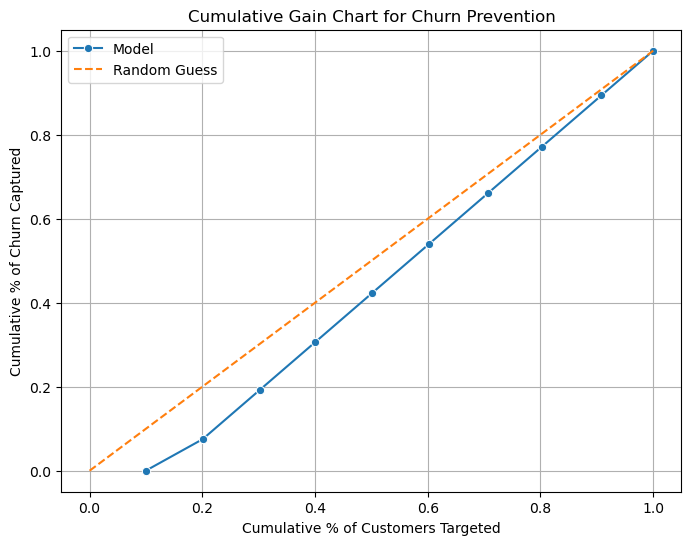

In [364]:
# Compute Cumulative Gain (how much churn we capture by targeting each decile)
decile_summary['cumulative_churn'] = decile_summary['churned_customers'].cumsum() / decile_summary['churned_customers'].sum()
decile_summary['cumulative_customers'] = decile_summary['total_customers'].cumsum() / decile_summary['total_customers'].sum()

# Plot Cumulative Gain Chart
plt.figure(figsize=(8, 6))
sns.lineplot(x=decile_summary['cumulative_customers'], y=decile_summary['cumulative_churn'], marker='o', label='Model')
plt.plot([0, 1], [0, 1], "--", label='Random Guess')
plt.xlabel('Cumulative % of Customers Targeted')
plt.ylabel('Cumulative % of Churn Captured')
plt.title('Cumulative Gain Chart for Churn Prevention')
plt.legend()
plt.grid()
plt.show()

The blue line (`Model`) is below the orange line (`Random Guess`) in the graph though it is very closely similar. This indicates that the model is performing worse than random guessing in predicting churn. It is need to be investigated potential issues such as data imbalance, feature selection, or model architecture. Consider retraining or exploring alternative models.

However, using the prediction itself if not using the random guess, the business iniative effort can start from 10% of the customer and keep re-evaluating the targeting strategy and model.

##  **<font color='blue'>Task 6: Finding Customer Lifetime Value</font>**

### **CLV Calculation**

In [368]:
# Define known values
churn_rate = 0.86432  
gross_margin = 0.5 

# Compute CLV for each customer
churn_data["CLV"] = (churn_data["avg_transaction_value"] * gross_margin) / churn_rate

# Compute overall average CLV
average_CLV = churn_data["CLV"].mean()
print(f"Average Customer Lifetime Value (CLV): {average_CLV:.2f}")

Average Customer Lifetime Value (CLV): 16635.31


### **10.000 New Leads Simulation**

In [370]:
# Given data
new_leads = 10000  
conversion_rate = 0.381529  
churn_rate = 0.864320
avg_CLV = 16635.31  

# Step 1: Calculate converted customers
converted_customers = new_leads * conversion_rate

# Step 2: Calculate churned customers
churned_customers = converted_customers * churn_rate

# Step 3: Calculate retained customers
retained_customers = converted_customers * (1 - churn_rate)

# Step 4: Calculate total revenue over 3 years
total_revenue = retained_customers * avg_CLV

# Display results
print(f"Converted Customers: {converted_customers:.0f}")
print(f"Churned Customers: {churned_customers:.0f}")
print(f"Retained Customers: {retained_customers:.0f}")
print(f"Estimated Total Revenue (3 Years): ${total_revenue:,.2f}")

Converted Customers: 3815
Churned Customers: 3298
Retained Customers: 518
Estimated Total Revenue (3 Years): $8,611,410.41
